## Dataset preparation

In [1]:
import numpy as np
import math
import pandas as pd

import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
import torch.optim as optim

from scipy.integrate import solve_ivp

from torchmetrics import Accuracy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

from lion_pytorch import Lion

from tqdm import tqdm

from copy import deepcopy

import warnings
warnings.filterwarnings("ignore")

In [2]:
def system(t, X):
    x, y = X
    xp = -x-y-x*x
    yp = x-y-y*y
    return xp, yp

## Bisection method to generate near-boundary points
def bisection(a, b, delta=0.04): ## a has label +1 and b has label -1
    distance = np.linalg.norm(np.array([a[0]-b[0], a[1]-b[1]]))
    if distance < delta:
        return (a, b)
    else:
        c = ((a[0]+b[0])/2, (a[1]+b[1])/2)
        if simulation(c[0], c[1]):
            return bisection(c, b, delta)
        else:
            return bisection(a, c, delta)

def euclidean_distance(point1, point2):
    point1, point2 = np.array(point1), np.array(point2)
    return np.sqrt(np.sum((point1 - point2) ** 2))

spiral_sink = (0, 0)

# Check if the trajectory is attracted to the concerned spiral attractor
def is_attracted(x, y):
    return euclidean_distance((x, y), spiral_sink) < 1e-5

## Implement the simulation process and decide if the trajectory is attracted by the Lorenz attractor
def simulation(x0 ,y0):
    tmax, n = 1500, 100000
    soln = solve_ivp(system, (0, tmax), (x0, y0),dense_output=True, rtol=1e-10, atol=1e-10)
    t = np.linspace(0, tmax, n)
    x, y= soln.sol(t)
    return is_attracted(x[n-1], y[n-1])


In [3]:
## Generate 10,000 uniformly sampled points in the square [-2, 2] x [-2, 2]
np.random.seed(0)
X = np.random.uniform(-2, 2, 10000)
Y = np.random.uniform(-2, 2, 10000)

def euclidean_distance(point1, point2):
    point1, point2 = np.array(point1), np.array(point2)
    return np.sqrt(np.sum((point1 - point2) ** 2))
spiral_sink = (0, 0)

# Check if the trajectory is attracted to the concerned spiral attractor
def is_attracted(x, y):
    return euclidean_distance((x, y), spiral_sink) < 1e-5

## Implement the simulation process and decide if the trajectory is attracted by the Lorenz attractor
def simulation(x0 ,y0):
    tmax, n = 1500, 100000
    soln = solve_ivp(system, (0, tmax), (x0, y0),dense_output=True)
    t = np.linspace(0, tmax, n)
    x, y= soln.sol(t)
    return is_attracted(x[n-1], y[n-1])

# Create the dataset
#df = pd.DataFrame(columns=['x0', 'y0', 'attracted'])
#for i in tqdm(range(10000)):  # wrap range with tqdm for progress bar
    #x0, y0 = X[i], Y[i]
    #attracted_result = simulation(x0, y0)
    #attracted_result = 1 if attracted_result else -1  # map True to 1 and False to -1
    #df.loc[i] = [x0, y0, attracted_result]

# Save the DataFrame to a CSV file
#df.to_csv('dataset_arbi2d.csv', index=False)


In [4]:
#df_data = pd.read_csv('dataset_arbi2d_general_10000.csv')


#dist = [0.01, 0.02, 0.03, 0.04, 0.05, 0.1]

#for delta in dist:
    #dataset = []
    #df_data_1 = df_data[df_data['attracted'] == 1].sample(50)
    #df_data_n1 = df_data[df_data['attracted'] == -1].sample(50)
    #for i in tqdm(range(len(df_data_1)), desc="Processing df_1"):
        #for j in range(len(df_data_n1)):
            #a = (df_data_1.iloc[i]['x0'], df_data_1.iloc[i]['y0'])
            #b = (df_data_n1.iloc[j]['x0'], df_data_n1.iloc[j]['y0'])
            #a, b = bisection(a, b, delta=delta)
            #dataset.append([a[0], a[1], 1])
            #dataset.append([b[0], b[1], -1])

    #df = pd.DataFrame(dataset, columns=['x0', 'y0', 'attracted'])
    #df.to_csv('dataset_arbi2d_near_5000_' + str(delta) + '.csv', index=False)


#dataset_near = []
#for i in tqdm(range(len(df_data_1)), desc="Processing df_1"):
    #for j in range(len(df_data_n1)):
        #a = (df_data_1.iloc[i]['x0'], df_data_1.iloc[i]['y0'])
        #b = (df_data_n1.iloc[j]['x0'], df_data_n1.iloc[j]['y0'])
        #a, b = bisection(a, b, delta=delta)
        #dataset_near.append([a[0], a[1], 1])
        #dataset_near.append([b[0], b[1], -1])

#df_near = pd.DataFrame(dataset_near, columns=['x0', 'y0', 'attracted'])
#df_near.to_csv('dataset_arbi2d_new_testing_near_5000_0.04.csv', index=False)

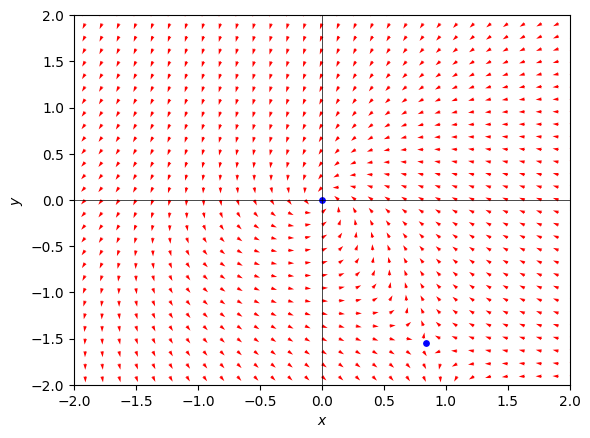

In [5]:
# Define the system of equations
Y, X = np.mgrid[-3:3:45j, -3:3:45j] 
U, V = system(0, (X, Y))

# Normalize arrows
N = np.sqrt(U**2 + V**2)
U = U / N
V = V / N

plt.quiver(X, Y, U, V, color='r')

# Highlight critical points
plt.scatter([0, 0.83928], [0, -1.54368], color='blue', s=15) 

# Add axes
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)

plt.xlim([-2, 2])  # x-axis limits include negative values
plt.ylim([-2, 2])  # y-axis limits include negative values
plt.xlabel('$x$')
plt.ylabel('$y$')

plt.show()

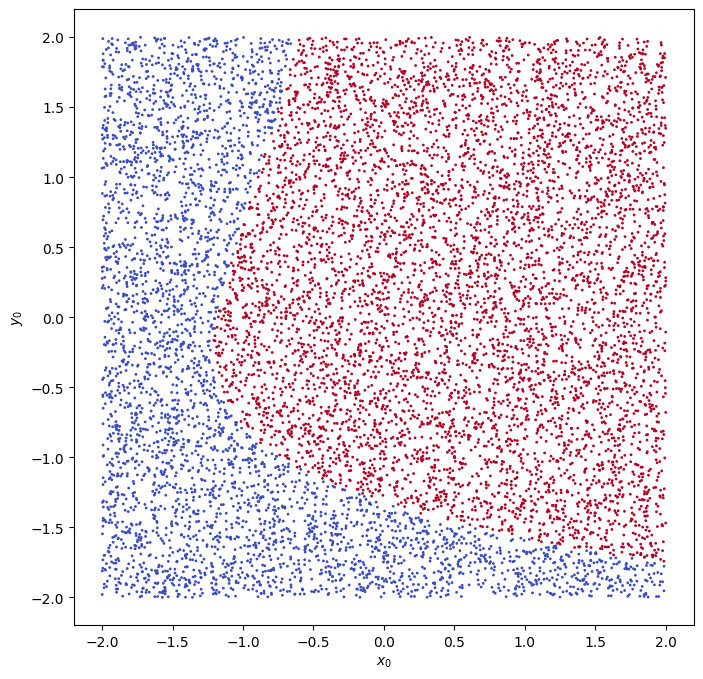

In [6]:
## Plot the sampled datapoints
df = pd.read_csv('dataset_arbi2d_general_10000.csv')
plt.figure(figsize=(8, 8))
plt.scatter(df['x0'], df['y0'], c=df['attracted'], cmap='coolwarm', s=1)
plt.xlabel('$x_0$')
plt.ylabel('$y_0$')
plt.show()

## Baseline training

In [7]:
class SystemDataset(Dataset):
    def __init__(self, csv_file):
        self.data = pd.read_csv(csv_file)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        x = torch.from_numpy(self.data.iloc[idx, 0:2].values).float()
        y = torch.tensor(self.data.iloc[idx, 2]).float()
        return x, y
    


In [8]:
## Define the neural network. The complexity of the network is a hyperparameter.
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 32)
        self.fc2 = nn.Linear(32, 32)
        self.fc3 = nn.Linear(32, 32)
        self.fc4 = nn.Linear(32, 1)

        #self.bn1 = nn.BatchNorm1d(32)
        #self.bn2 = nn.BatchNorm1d(32)
        #self.bn3 = nn.BatchNorm1d(32)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        #x = self.bn1(x)
        x = torch.relu(self.fc2(x))
        #x = self.bn2(x)
        x = torch.relu(self.fc3(x))
        #x = self.bn3(x)
        x = self.fc4(x)
        return x
    

In [9]:
import torch.utils


def train_model_bce(net, dataset_train, dataset_validation1, dataset_validation001, dataset_validation002, dataset_validation003,
                    dataset_validation004, dataset_validation005, dataset_validation010, batchsize, epochs, lr):
    criterion = nn.BCEWithLogitsLoss()
    #optimizer = optim.Adam(net.parameters(), lr=lr)
    optimizer = Lion(net.parameters(), lr=lr)
    dataloader_train = DataLoader(dataset_train, batch_size=batchsize, shuffle=True)
    dataloader_validation1 = DataLoader(dataset_validation1, batch_size=batchsize, shuffle=False)
    dataloader_validation001 = DataLoader(dataset_validation001, batch_size=batchsize, shuffle=False)
    dataloader_validation002 = DataLoader(dataset_validation002, batch_size=batchsize, shuffle=False)
    dataloader_validation003 = DataLoader(dataset_validation003, batch_size=batchsize, shuffle=False)
    dataloader_validation004 = DataLoader(dataset_validation004, batch_size=batchsize, shuffle=False)
    dataloader_validation005 = DataLoader(dataset_validation005, batch_size=batchsize, shuffle=False)
    dataloader_validation010 = DataLoader(dataset_validation010, batch_size=batchsize, shuffle=False)
    
    training_accuracy_over_epochs = []
    validation1_accuracy_over_epochs = []
    validation001_accuracy_over_epochs = []
    validation002_accuracy_over_epochs = []
    validation003_accuracy_over_epochs = []
    validation004_accuracy_over_epochs = []
    validation005_accuracy_over_epochs = []
    validation010_accuracy_over_epochs = []

    training_loss_over_epochs = []
    validation1_loss_over_epochs = []
    validation001_loss_over_epochs = []
    validation002_loss_over_epochs = []
    validation003_loss_over_epochs = []
    validation004_loss_over_epochs = []
    validation005_loss_over_epochs = []
    validation010_loss_over_epochs = []
    
    # Set up the overall progress bar
    overall_progress = tqdm(total=epochs, desc='Overall Training Progress')
    
    for epoch in range(epochs):
        net.train()
        correct_train = 0
        total_train = 0
        avg_loss_train = 0
        for features, labels in dataloader_train:
            labels = ((labels + 1) / 2).float()
            labels = labels.view(-1)
            optimizer.zero_grad()
            outputs = net(features).view(-1)
            predicted = (outputs > 0).float()
            correct_train += (predicted == labels).sum().item()
            total_train += labels.size(0)
            loss = criterion(outputs, labels)
            avg_loss_train += loss.item()
            loss.backward()
            optimizer.step()
                    
        training_accuracy = correct_train / total_train
        training_loss = avg_loss_train / len(dataloader_train)
        training_accuracy_over_epochs.append(training_accuracy)
        training_loss_over_epochs.append(training_loss)

        
        net.eval()
        correct_validation1 = 0
        total_validation1 = 0
        avg_loss_validation1 = 0
        with torch.no_grad():
            for features, labels in dataloader_validation1:
                labels = ((labels + 1) / 2).float()
                labels = labels.view(-1)
                outputs = net(features).view(-1)
                predicted = (outputs > 0).float()
                correct_validation1 += (predicted == labels).sum().item()
                total_validation1 += labels.size(0)
                loss = criterion(outputs, labels)
                avg_loss_validation1 += loss.item()
        
        validation1_accuracy = correct_validation1 / total_validation1
        validation1_accuracy_over_epochs.append(validation1_accuracy)
        validation1_loss = avg_loss_validation1 / len(dataloader_validation1)
        validation1_loss_over_epochs.append(validation1_loss)

        correct_validation001 = 0
        total_validation001 = 0
        avg_loss_validation001 = 0
        with torch.no_grad():
            for features, labels in dataloader_validation001:
                labels = ((labels + 1) / 2).float()
                labels = labels.view(-1)
                outputs = net(features).view(-1)
                predicted = (outputs > 0).float()
                correct_validation001 += (predicted == labels).sum().item()
                total_validation001 += labels.size(0)
                loss = criterion(outputs, labels)
                avg_loss_validation001 += loss.item()
        
        validation001_accuracy = correct_validation001 / total_validation001
        validation001_accuracy_over_epochs.append(validation001_accuracy)
        validation001_loss = avg_loss_validation001 / len(dataloader_validation001)
        validation001_loss_over_epochs.append(validation001_loss)

        correct_validation002 = 0
        total_validation002 = 0
        avg_loss_validation002 = 0
        with torch.no_grad():
            for features, labels in dataloader_validation002:
                labels = ((labels + 1) / 2).float()
                labels = labels.view(-1)
                outputs = net(features).view(-1)
                predicted = (outputs > 0).float()
                correct_validation002 += (predicted == labels).sum().item()
                total_validation002 += labels.size(0)
                loss = criterion(outputs, labels)
                avg_loss_validation002 += loss.item()
        
        validation002_accuracy = correct_validation002 / total_validation002
        validation002_accuracy_over_epochs.append(validation002_accuracy)
        validation002_loss = avg_loss_validation002 / len(dataloader_validation002)
        validation002_loss_over_epochs.append(validation002_loss)

        correct_validation003 = 0
        total_validation003 = 0
        avg_loss_validation003 = 0
        with torch.no_grad():
            for features, labels in dataloader_validation003:
                labels = ((labels + 1) / 2).float()
                labels = labels.view(-1)
                outputs = net(features).view(-1)
                predicted = (outputs > 0).float()
                correct_validation003 += (predicted == labels).sum().item()
                total_validation003 += labels.size(0)
                loss = criterion(outputs, labels)
                avg_loss_validation003 += loss.item()
        
        validation003_accuracy = correct_validation003 / total_validation003
        validation003_accuracy_over_epochs.append(validation003_accuracy)
        validation003_loss = avg_loss_validation003 / len(dataloader_validation003)
        validation003_loss_over_epochs.append(validation003_loss)

        correct_validation004 = 0
        total_validation004 = 0
        avg_loss_validation004 = 0
        with torch.no_grad():
            for features, labels in dataloader_validation004:
                labels = ((labels + 1) / 2).float()
                labels = labels.view(-1)
                outputs = net(features).view(-1)
                predicted = (outputs > 0).float()
                correct_validation004 += (predicted == labels).sum().item()
                total_validation004 += labels.size(0)
                loss = criterion(outputs, labels)
                avg_loss_validation004 += loss.item()
        
        validation004_accuracy = correct_validation004 / total_validation004
        validation004_accuracy_over_epochs.append(validation004_accuracy)
        validation004_loss = avg_loss_validation004 / len(dataloader_validation004)
        validation004_loss_over_epochs.append(validation004_loss)

        correct_validation005 = 0
        total_validation005 = 0
        avg_loss_validation005 = 0
        with torch.no_grad():
            for features, labels in dataloader_validation005:
                labels = ((labels + 1) / 2).float()
                labels = labels.view(-1)
                outputs = net(features).view(-1)
                predicted = (outputs > 0).float()
                correct_validation005 += (predicted == labels).sum().item()
                total_validation005 += labels.size(0)
                loss = criterion(outputs, labels)
                avg_loss_validation005 += loss.item()
        
        validation005_accuracy = correct_validation005 / total_validation005
        validation005_accuracy_over_epochs.append(validation005_accuracy)
        validation005_loss = avg_loss_validation005 / len(dataloader_validation005)
        validation005_loss_over_epochs.append(validation005_loss)

        correct_validation010 = 0
        total_validation010 = 0
        avg_loss_validation010 = 0
        with torch.no_grad():
            for features, labels in dataloader_validation010:
                labels = ((labels + 1) / 2).float()
                labels = labels.view(-1)
                outputs = net(features).view(-1)
                predicted = (outputs > 0).float()
                correct_validation010 += (predicted == labels).sum().item()
                total_validation010 += labels.size(0)
                loss = criterion(outputs, labels)
                avg_loss_validation010 += loss.item()
        
        validation010_accuracy = correct_validation010 / total_validation010
        validation010_accuracy_over_epochs.append(validation010_accuracy)
        validation010_loss = avg_loss_validation010 / len(dataloader_validation010)
        validation010_loss_over_epochs.append(validation010_loss)
        
        # Update the overall progress bar after each epoch
        overall_progress.update(1)
        #overall_progress.set_postfix({'Training Accuracy': training_accuracy, 'Validation1 Accuracy': validation1_accuracy, 'Validation2 Accuracy': validation2_accuracy})
        overall_progress.set_postfix({'Training Accuracy': training_accuracy, 
                                      'Validation1 Accuracy': validation1_accuracy, 
                                      'Validation001 Accuracy': validation001_accuracy, 
                                      'Validation002 Accuracy': validation002_accuracy, 
                                      'Validation003 Accuracy': validation003_accuracy, 
                                      'Validation004 Accuracy': validation004_accuracy, 
                                      'Validation005 Accuracy': validation005_accuracy, 
                                      'Validation010 Accuracy': validation010_accuracy})
    
    overall_progress.close()
    
    # Plot training and validation accuracy over epochs
    plt.figure(figsize=(10, 6))
    plt.plot(training_accuracy_over_epochs, label='Training')
    plt.plot(validation1_accuracy_over_epochs, label='Uniform')
    plt.plot(validation001_accuracy_over_epochs, label='$\delta$=0.01')
    plt.plot(validation002_accuracy_over_epochs, label='$\delta$=0.02')
    plt.plot(validation003_accuracy_over_epochs, label='$\delta$=0.03')
    plt.plot(validation004_accuracy_over_epochs, label='$\delta$=0.04')
    plt.plot(validation005_accuracy_over_epochs, label='$\delta$=0.05')
    plt.plot(validation010_accuracy_over_epochs, label='$\delta$=0.10')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy Over Epochs')
    plt.legend()
    plt.show()

    # Plot training and validation loss over epochs
    plt.figure(figsize=(10, 6))
    plt.plot(training_loss_over_epochs, label='Training')
    plt.plot(validation1_loss_over_epochs, label='Uniform')
    plt.plot(validation001_loss_over_epochs, label='$\delta$=0.01')
    plt.plot(validation002_loss_over_epochs, label='$\delta$=0.02')
    plt.plot(validation003_loss_over_epochs, label='$\delta$=0.03')
    plt.plot(validation004_loss_over_epochs, label='$\delta$=0.04')
    plt.plot(validation005_loss_over_epochs, label='$\delta$=0.05')
    plt.plot(validation010_loss_over_epochs, label='$\delta$=0.10')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss Over Epochs')
    plt.legend()
    plt.show()
    
    test_model(net, dataset_train)
    test_model(net, dataset_validation001)
    test_model(net, dataset_validation002)
    test_model(net, dataset_validation003)
    test_model(net, dataset_validation004)
    test_model(net, dataset_validation005)
    test_model(net, dataset_validation010)

    

def test_model(net, dataset_test):
    net.eval()
    dataloader_test = DataLoader(dataset_test, batch_size=32, shuffle=False)
    features_list = []
    labels_list = []
    probability_list = []
    predictions_list = []
    acc = Accuracy(task = 'binary')

    with torch.no_grad():
        for features, labels in dataloader_test:
            labels = ((labels + 1) / 2).float()
            probability = net(features)
            outputs = (probability > 0).float()
            outputs = outputs.squeeze()

            acc.update(outputs, labels)

            features_list.append(features.numpy())
            labels_list.append(labels.numpy())
            probability_list.append(probability.numpy())
            predictions_list.append(outputs.numpy())
    accuracy = acc.compute()
    print(f'Accuracy: {accuracy}')

    # Concatenate all batches
    features = np.concatenate(features_list, axis=0)
    labels = np.concatenate(labels_list, axis=0)
    probability = np.concatenate(probability_list, axis=0)
    predictions = np.concatenate(predictions_list, axis=0)

    # Create a 2D scatter plot
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Plot the features colored by the predictions
    scatter = ax.scatter(features[:, 0], features[:, 1], c=probability, cmap='coolwarm', vmin=-np.max(np.abs(probability)), vmax=np.max(np.abs(probability)))

    plt.colorbar(scatter)
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])

    plt.show()

    plt.hist(probability, bins=20)
    plt.show()
    return accuracy

In [10]:
'''
dataset_train: uniformly sampled 500 points
dataset_validation_uniform: uniformly sampled 1,000 points
dataset_test_uniform: uniformly sampled 1,000 points
dataset_validation_near: 1,000 points near the boundary
dataset_test_near: 1,000 points near the boundary
Each dataset above are mutually independent
'''
df_uniform = pd.read_csv('dataset_arbi2d_general_10000.csv')
df_uniform_train = df_uniform.sample(n=200)
df_uniform = df_uniform.drop(df_uniform_train.index)
df_uniform_validation = df_uniform.sample(n=1000)
df_uniform = df_uniform.drop(df_uniform_validation.index)
df_uniform_test = df_uniform.sample(n=1000)

df_near_001 = pd.read_csv('dataset_arbi2d_near_5000_0.01.csv')
df_near_001_validation = df_near_001.sample(n=1000)
df_near_001 = df_near_001.drop(df_near_001_validation.index)
df_near_001_test = df_near_001.sample(n=1000)

df_near_002 = pd.read_csv('dataset_arbi2d_near_5000_0.02.csv')
df_near_002_validation = df_near_002.sample(n=1000)
df_near_002 = df_near_002.drop(df_near_002_validation.index)
df_near_002_test = df_near_002.sample(n=1000)

df_near_003 = pd.read_csv('dataset_arbi2d_near_5000_0.03.csv')
df_near_003_validation = df_near_003.sample(n=1000)
df_near_003 = df_near_003.drop(df_near_003_validation.index)
df_near_003_test = df_near_003.sample(n=1000)

df_near_004 = pd.read_csv('dataset_arbi2d_near_5000_0.04.csv')
df_near_004_validation = df_near_004.sample(n=1000)
df_near_004 = df_near_004.drop(df_near_004_validation.index)
df_near_004_test = df_near_004.sample(n=1000)

df_near_005 = pd.read_csv('dataset_arbi2d_near_5000_0.05.csv')
df_near_005_validation = df_near_005.sample(n=1000)
df_near_005 = df_near_005.drop(df_near_005_validation.index)
df_near_005_test = df_near_005.sample(n=1000)

df_near_010 = pd.read_csv('dataset_arbi2d_near_5000_0.1.csv')
df_near_010_validation = df_near_010.sample(n=1000)
df_near_010 = df_near_010.drop(df_near_010_validation.index)
df_near_010_test = df_near_010.sample(n=1000)



dataset_train = SystemDataset('dataset_arbi2d_general_10000.csv')
dataset_train.data = df_uniform_train

dataset_validation_uniform = SystemDataset('dataset_arbi2d_general_10000.csv')
dataset_validation_uniform.data = df_uniform_validation

dataset_test_uniform = SystemDataset('dataset_arbi2d_general_10000.csv')
dataset_test_uniform.data = df_uniform_test

dataset_validation_near_001 = SystemDataset('dataset_arbi2d_general_10000.csv')
dataset_validation_near_001.data = df_near_001_validation
dataset_test_near_001 = SystemDataset('dataset_arbi2d_general_10000.csv')
dataset_test_near_001.data = df_near_001_test

dataset_validation_near_002 = SystemDataset('dataset_arbi2d_general_10000.csv')
dataset_validation_near_002.data = df_near_002_validation
dataset_test_near_002 = SystemDataset('dataset_arbi2d_general_10000.csv')
dataset_test_near_002.data = df_near_002_test

dataset_validation_near_003 = SystemDataset('dataset_arbi2d_general_10000.csv')
dataset_validation_near_003.data = df_near_003_validation
dataset_test_near_003 = SystemDataset('dataset_arbi2d_general_10000.csv')
dataset_test_near_003.data = df_near_003_test

dataset_validation_near_004 = SystemDataset('dataset_arbi2d_general_10000.csv')
dataset_validation_near_004.data = df_near_004_validation
dataset_test_near_004 = SystemDataset('dataset_arbi2d_general_10000.csv')
dataset_test_near_004.data = df_near_004_test

dataset_validation_near_005 = SystemDataset('dataset_arbi2d_general_10000.csv')
dataset_validation_near_005.data = df_near_005_validation
dataset_test_near_005 = SystemDataset('dataset_arbi2d_general_10000.csv')
dataset_test_near_005.data = df_near_005_test

dataset_validation_near_010 = SystemDataset('dataset_arbi2d_general_10000.csv')
dataset_validation_near_010.data = df_near_010_validation
dataset_test_near_010 = SystemDataset('dataset_arbi2d_general_10000.csv')
dataset_test_near_010.data = df_near_010_test


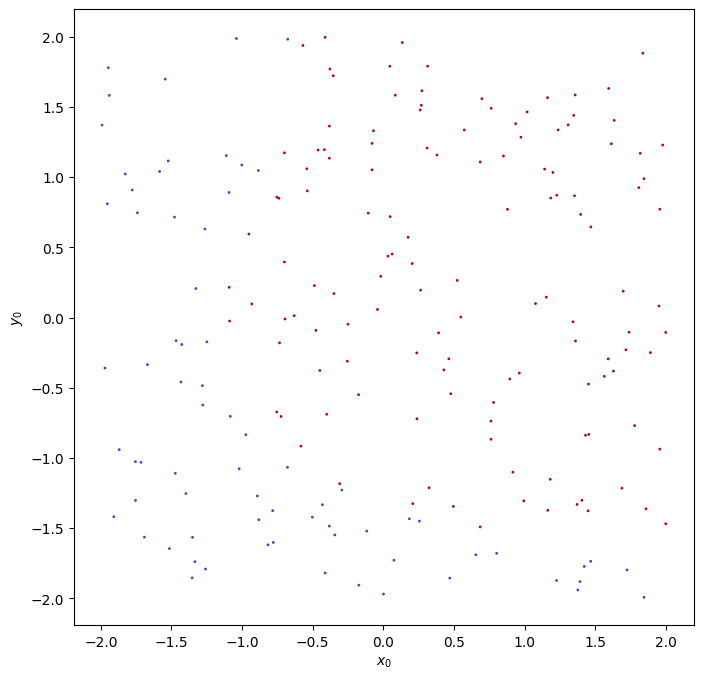

In [11]:
## Plot the sampled datapoints
df = dataset_train.data
plt.figure(figsize=(8, 8))
plt.scatter(df['x0'], df['y0'], c=df['attracted'], cmap='coolwarm', s=1)
plt.xlabel('$x_0$')
plt.ylabel('$y_0$')
plt.show()

Overall Training Progress: 100%|██████████| 1000/1000 [05:09<00:00,  3.23it/s, Training Accuracy=1, Validation1 Accuracy=0.981, Validation001 Accuracy=0.526, Validation002 Accuracy=0.516, Validation003 Accuracy=0.555, Validation004 Accuracy=0.563, Validation005 Accuracy=0.556, Validation010 Accuracy=0.627]   


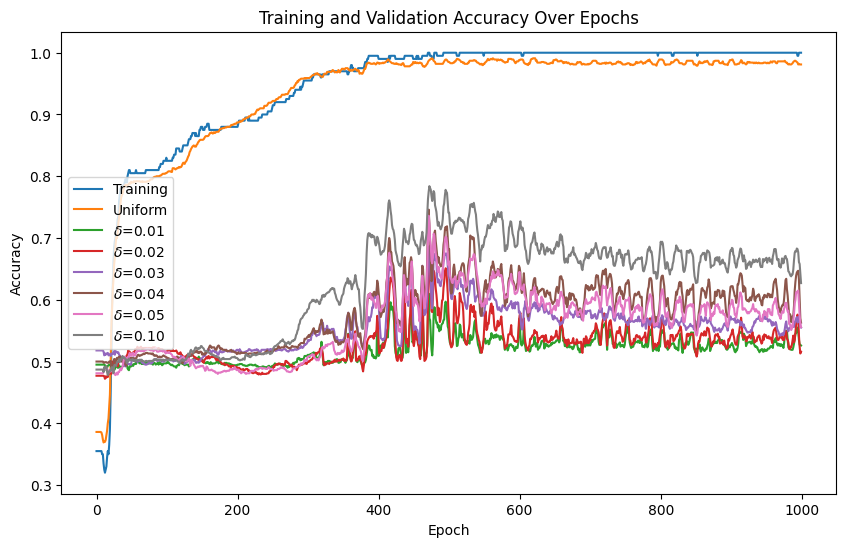

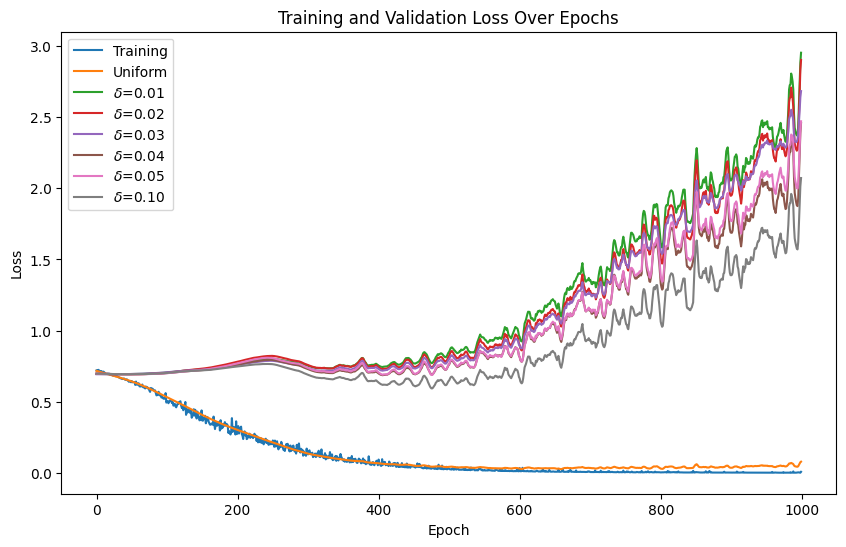

Accuracy: 1.0


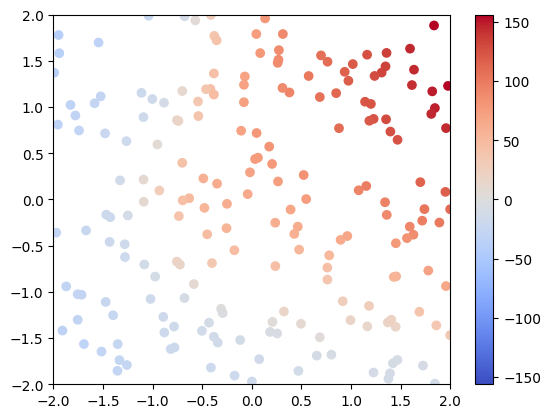

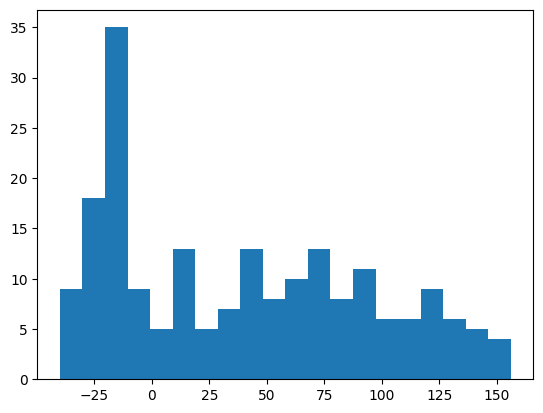

Accuracy: 0.5260000228881836


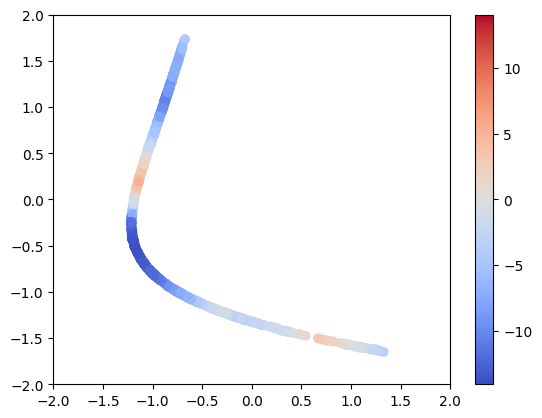

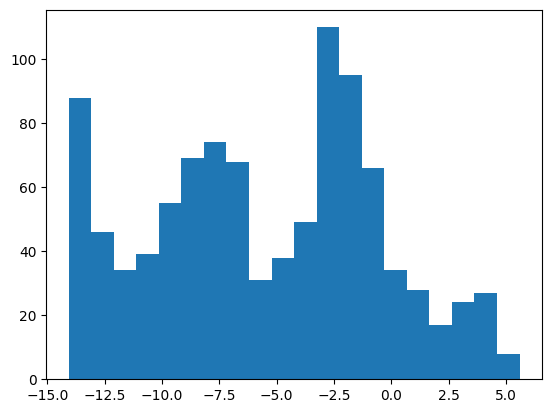

Accuracy: 0.515999972820282


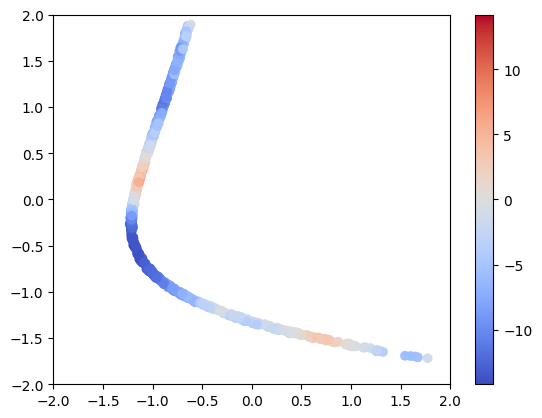

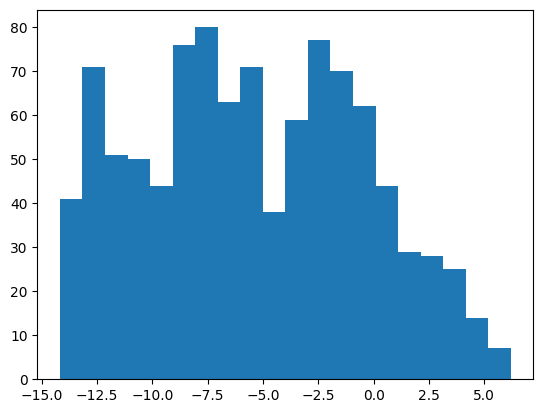

Accuracy: 0.5550000071525574


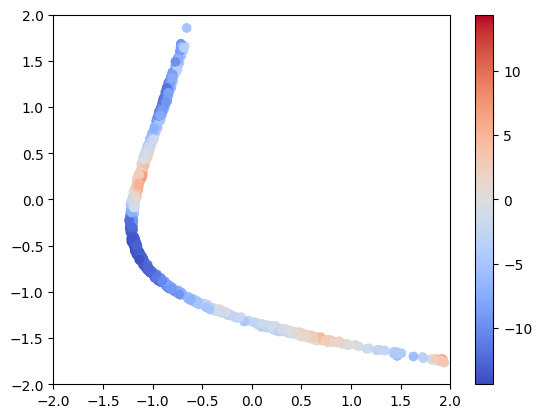

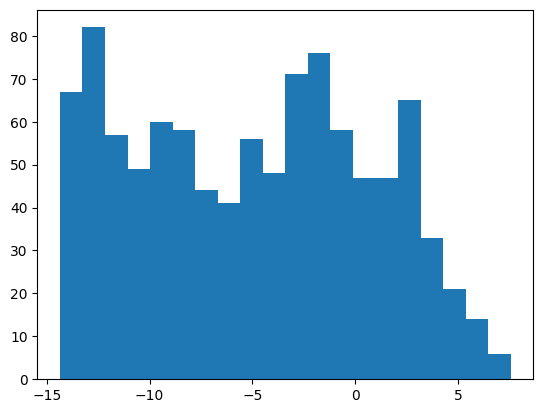

Accuracy: 0.5630000233650208


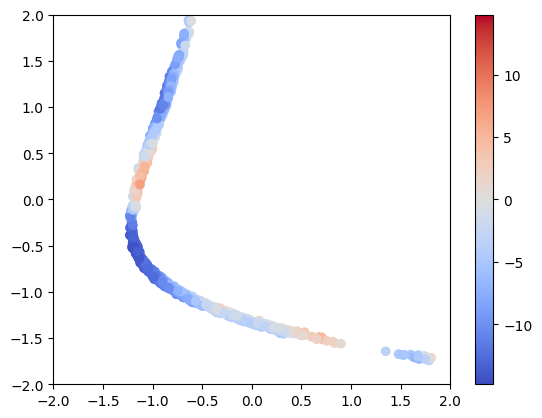

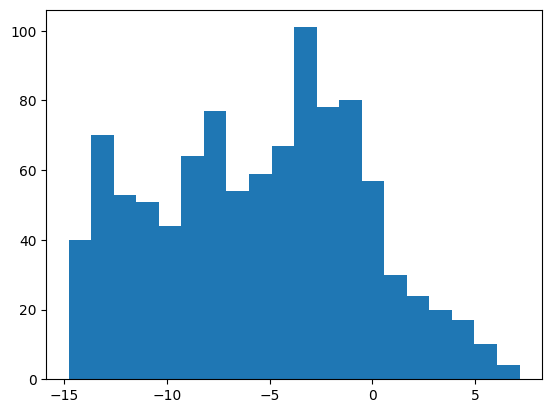

Accuracy: 0.5559999942779541


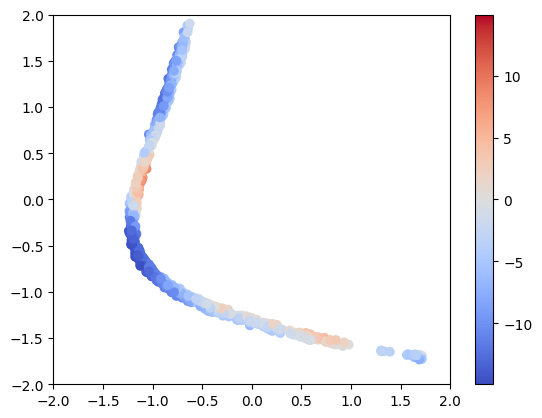

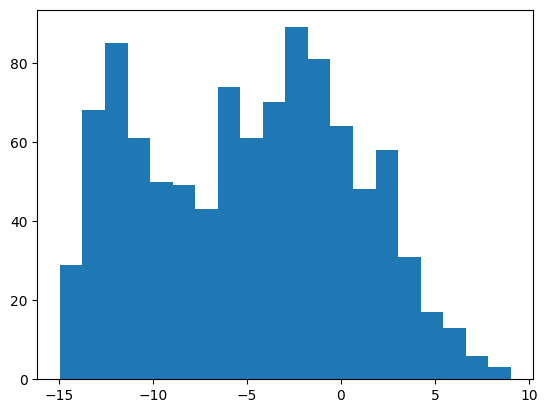

Accuracy: 0.6269999742507935


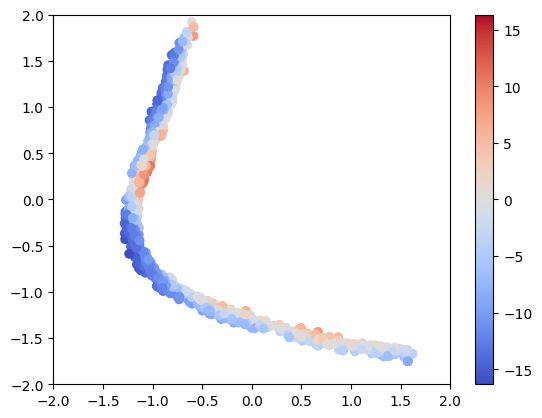

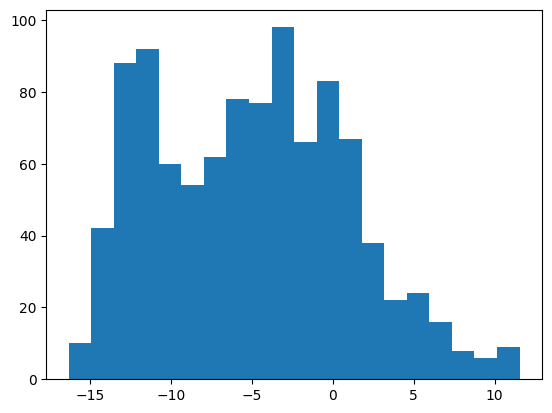

In [12]:
net_1 = Net()
train_model_bce(net_1, dataset_train, dataset_validation_uniform, dataset_validation_near_001, dataset_validation_near_002, dataset_validation_near_003,
                dataset_validation_near_004, dataset_validation_near_005, dataset_validation_near_010, batchsize=64, epochs=1000, lr=0.0001)

Accuracy: 0.9810000061988831


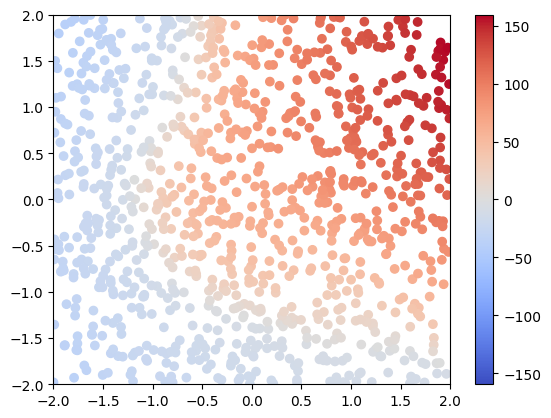

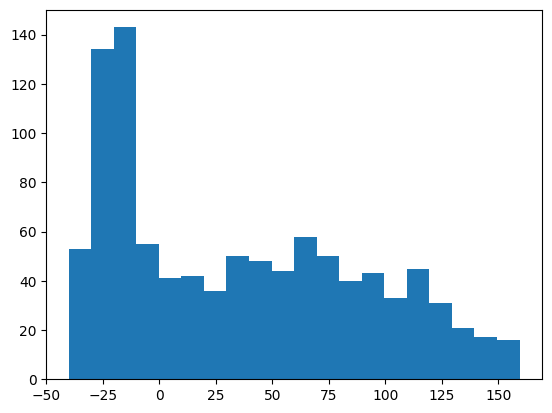

tensor(0.9810)

In [13]:
test_model(net_1, dataset_test_uniform)

Accuracy: 0.5339999794960022


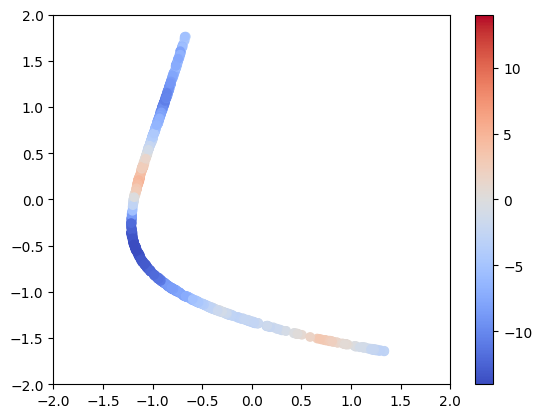

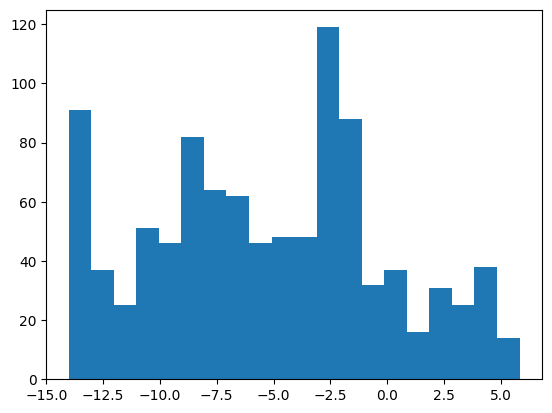

tensor(0.5340)

In [14]:
test_model(net_1, dataset_test_near_001)

Accuracy: 0.5649999976158142


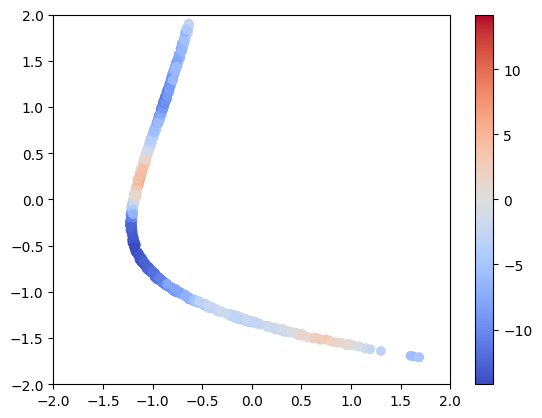

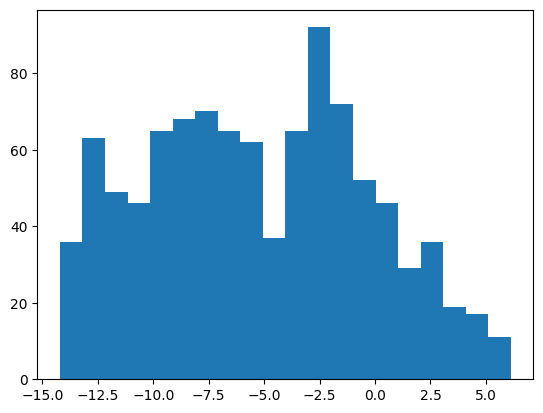

tensor(0.5650)

In [15]:
test_model(net_1, dataset_test_near_002)

Accuracy: 0.550000011920929


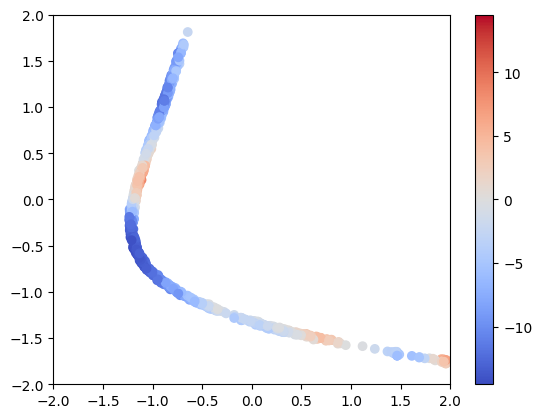

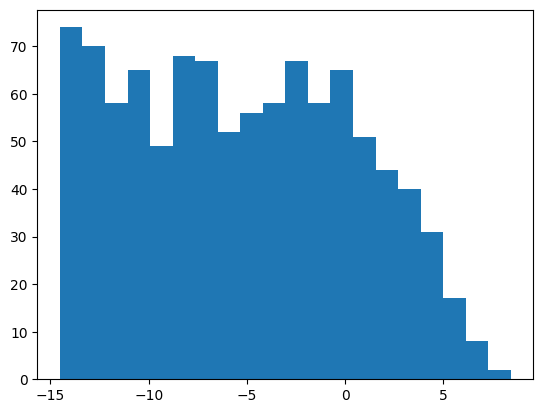

tensor(0.5500)

In [16]:
test_model(net_1, dataset_test_near_003)

Accuracy: 0.5529999732971191


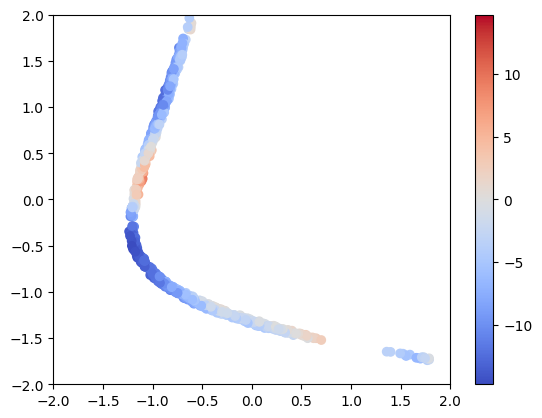

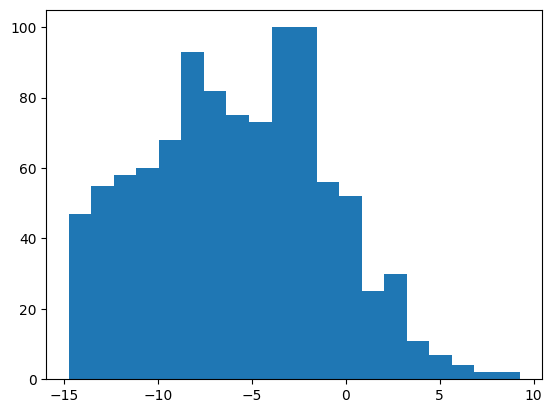

tensor(0.5530)

In [17]:
test_model(net_1, dataset_test_near_004)

Accuracy: 0.5860000252723694


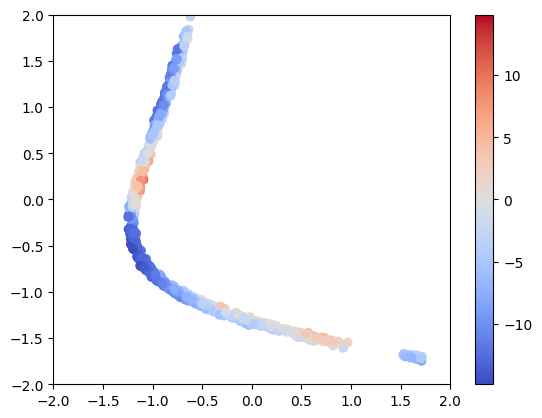

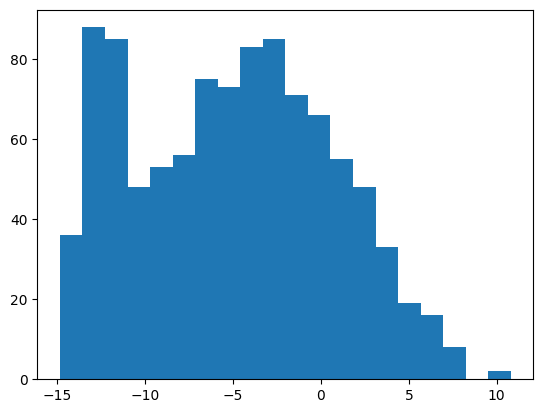

tensor(0.5860)

In [18]:
test_model(net_1, dataset_test_near_005)

Accuracy: 0.6899999976158142


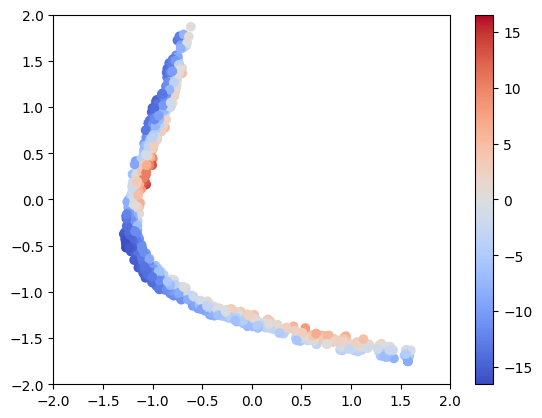

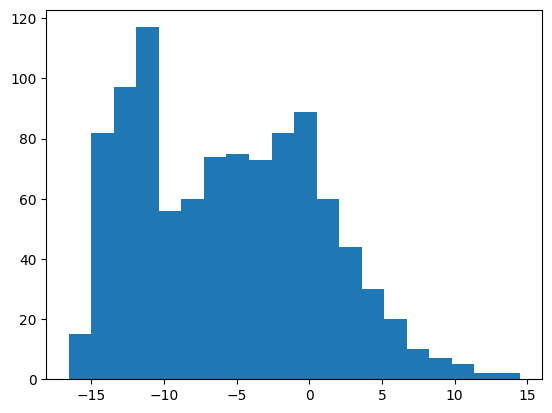

tensor(0.6900)

In [19]:
test_model(net_1, dataset_test_near_010)

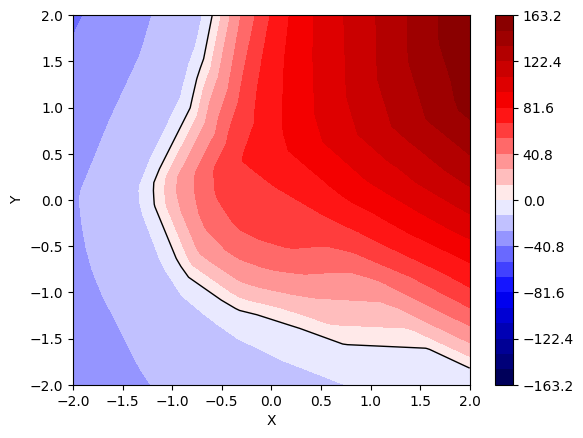

In [20]:
def plot_contour(net):
    x_min, x_max = -2, 2
    y_min, y_max = -2, 2
    resolution = 2000
    x_range = np.linspace(x_min, x_max, resolution)
    y_range = np.linspace(y_min, y_max, resolution)
    xx, yy = np.meshgrid(x_range, y_range)
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    grid_points_tensor = torch.tensor(grid_points, dtype=torch.float)
    
    with torch.no_grad():
        predictions = net(grid_points_tensor).numpy()
    
    predictions_reshaped = predictions.reshape(xx.shape)
    
    # Ensure the color scale is centered around 0
    vmin = -max(abs(predictions_reshaped.min()), abs(predictions_reshaped.max()))
    vmax = max(abs(predictions_reshaped.min()), abs(predictions_reshaped.max()))
    
    plt.contourf(xx, yy, predictions_reshaped, levels=np.linspace(vmin, vmax, 25), cmap='seismic', vmin=vmin, vmax=vmax)
    plt.colorbar()
    
    # Draw the decision boundary (contour line at level 0)
    plt.contour(xx, yy, predictions_reshaped, levels=[0], colors='black', linewidths=1)
    
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

plot_contour(net_1)


## Hinge loss and quadratic hinge loss

In [21]:
class HingeLoss(nn.Module):
    def __init__(self):
        super(HingeLoss, self).__init__()
    
    def forward(self, y_pred, y_true):
        loss = nn.functional.relu(1-y_true * y_pred)
        mean_loss = torch.mean(loss)
        return mean_loss
    
class QuadraticHingeLoss(nn.Module):
    def __init__(self):
        super(QuadraticHingeLoss, self).__init__()

    def forward(self, y_pred, y_true):
        loss = nn.functional.relu(1-y_true * y_pred) ** 2
        mean_loss = torch.mean(loss)
        return mean_loss

In [22]:
def train_model_hinge(net, dataset_train, dataset_validation1, dataset_validation001, dataset_validation002,
                      dataset_validation003, dataset_validation004, dataset_validation005, dataset_validation010, batchsize, epochs, lr):
    criterion = HingeLoss()
    #optimizer = optim.Adam(net.parameters(), lr=lr)
    optimizer = Lion(net.parameters(), lr=lr)
    dataloader_train = DataLoader(dataset_train, batch_size=batchsize, shuffle=True)
    dataloader_validation1 = DataLoader(dataset_validation1, batch_size=batchsize, shuffle=False)
    dataloader_validation001 = DataLoader(dataset_validation001, batch_size=batchsize, shuffle=False)
    dataloader_validation002 = DataLoader(dataset_validation002, batch_size=batchsize, shuffle=False)
    dataloader_validation003 = DataLoader(dataset_validation003, batch_size=batchsize, shuffle=False)
    dataloader_validation004 = DataLoader(dataset_validation004, batch_size=batchsize, shuffle=False)
    dataloader_validation005 = DataLoader(dataset_validation005, batch_size=batchsize, shuffle=False)
    dataloader_validation010 = DataLoader(dataset_validation010, batch_size=batchsize, shuffle=False)

    
    training_accuracy_over_epochs = []
    validation1_accuracy_over_epochs = []
    validation001_accuracy_over_epochs = []
    validation002_accuracy_over_epochs = []
    validation003_accuracy_over_epochs = []
    validation004_accuracy_over_epochs = []
    validation005_accuracy_over_epochs = []
    validation010_accuracy_over_epochs = []
    training_loss_over_epochs = []
    validation1_loss_over_epochs = []
    validation001_loss_over_epochs = []
    validation002_loss_over_epochs = []
    validation003_loss_over_epochs = []
    validation004_loss_over_epochs = []
    validation005_loss_over_epochs = []
    validation010_loss_over_epochs = []
    
    # Set up the overall progress bar
    overall_progress = tqdm(total=epochs, desc='Overall Training Progress')
    
    for epoch in range(epochs):
        net.train()
        correct_train = 0
        total_train = 0
        avg_loss_train = 0
        for features, labels in dataloader_train:
            #labels = ((labels + 1) / 2).float()
            labels = labels.view(-1)
            optimizer.zero_grad()
            outputs = net(features).view(-1)
            predicted = ((outputs > 0).float() * 2) - 1
            correct_train += (predicted == labels).sum().item()
            total_train += labels.size(0)
            loss = criterion(outputs, labels)
            avg_loss_train += loss.item()
            loss.backward()
            optimizer.step()
                    
        training_accuracy = correct_train / total_train
        training_loss = avg_loss_train / len(dataloader_train)
        training_accuracy_over_epochs.append(training_accuracy)
        training_loss_over_epochs.append(training_loss)

        
        net.eval()
        correct_validation1 = 0
        total_validation1 = 0
        avg_loss_validation1 = 0
        with torch.no_grad():
            for features, labels in dataloader_validation1:
                #labels = ((labels + 1) / 2).float()
                labels = labels.view(-1)
                outputs = net(features).view(-1)
                predicted = ((outputs > 0).float() * 2) - 1
                correct_validation1 += (predicted == labels).sum().item()
                total_validation1 += labels.size(0)
                loss = criterion(outputs, labels)
                avg_loss_validation1 += loss.item()
        
        validation1_accuracy = correct_validation1 / total_validation1
        validation1_accuracy_over_epochs.append(validation1_accuracy)
        validation1_loss = avg_loss_validation1 / len(dataloader_validation1)
        validation1_loss_over_epochs.append(validation1_loss)

        correct_validation001 = 0
        total_validation001 = 0
        avg_loss_validation001 = 0
        with torch.no_grad():
            for features, labels in dataloader_validation001:
                #labels = ((labels + 1) / 2).float()
                labels = labels.view(-1)
                outputs = net(features).view(-1)
                predicted = ((outputs > 0).float() * 2) - 1
                correct_validation001 += (predicted == labels).sum().item()
                total_validation001 += labels.size(0)
                loss = criterion(outputs, labels)
                avg_loss_validation001 += loss.item()
        
        validation001_accuracy = correct_validation001 / total_validation001
        validation001_accuracy_over_epochs.append(validation001_accuracy)
        validation001_loss = avg_loss_validation001 / len(dataloader_validation001)
        validation001_loss_over_epochs.append(validation001_loss)

        correct_validation002 = 0
        total_validation002 = 0
        avg_loss_validation002 = 0
        with torch.no_grad():
            for features, labels in dataloader_validation002:
                #labels = ((labels + 1) / 2).float()
                labels = labels.view(-1)
                outputs = net(features).view(-1)
                predicted = ((outputs > 0).float() * 2) - 1
                correct_validation002 += (predicted == labels).sum().item()
                total_validation002 += labels.size(0)
                loss = criterion(outputs, labels)
                avg_loss_validation002 += loss.item()
        
        validation002_accuracy = correct_validation002 / total_validation002
        validation002_accuracy_over_epochs.append(validation002_accuracy)
        validation002_loss = avg_loss_validation002 / len(dataloader_validation002)
        validation002_loss_over_epochs.append(validation002_loss)

        correct_validation003 = 0
        total_validation003 = 0
        avg_loss_validation003 = 0
        with torch.no_grad():
            for features, labels in dataloader_validation003:
                #labels = ((labels + 1) / 2).float()
                labels = labels.view(-1)
                outputs = net(features).view(-1)
                predicted = ((outputs > 0).float() * 2) - 1
                correct_validation003 += (predicted == labels).sum().item()
                total_validation003 += labels.size(0)
                loss = criterion(outputs, labels)
                avg_loss_validation003 += loss.item()
        
        validation003_accuracy = correct_validation003 / total_validation003
        validation003_accuracy_over_epochs.append(validation003_accuracy)
        validation003_loss = avg_loss_validation003 / len(dataloader_validation003)
        validation003_loss_over_epochs.append(validation003_loss)

        correct_validation004 = 0
        total_validation004 = 0
        avg_loss_validation004 = 0
        with torch.no_grad():
            for features, labels in dataloader_validation004:
                #labels = ((labels + 1) / 2).float()
                labels = labels.view(-1)
                outputs = net(features).view(-1)
                predicted = ((outputs > 0).float() * 2) - 1
                correct_validation004 += (predicted == labels).sum().item()
                total_validation004 += labels.size(0)
                loss = criterion(outputs, labels)
                avg_loss_validation004 += loss.item()
        
        validation004_accuracy = correct_validation004 / total_validation004
        validation004_accuracy_over_epochs.append(validation004_accuracy)
        validation004_loss = avg_loss_validation004 / len(dataloader_validation004)
        validation004_loss_over_epochs.append(validation004_loss)

        correct_validation005 = 0
        total_validation005 = 0
        avg_loss_validation005 = 0
        with torch.no_grad():
            for features, labels in dataloader_validation005:
                #labels = ((labels + 1) / 2).float()
                labels = labels.view(-1)
                outputs = net(features).view(-1)
                predicted = ((outputs > 0).float() * 2) - 1
                correct_validation005 += (predicted == labels).sum().item()
                total_validation005 += labels.size(0)
                loss = criterion(outputs, labels)
                avg_loss_validation005 += loss.item()
        
        validation005_accuracy = correct_validation005 / total_validation005
        validation005_accuracy_over_epochs.append(validation005_accuracy)
        validation005_loss = avg_loss_validation005 / len(dataloader_validation005)
        validation005_loss_over_epochs.append(validation005_loss)

        correct_validation010 = 0
        total_validation010 = 0
        avg_loss_validation010 = 0
        with torch.no_grad():
            for features, labels in dataloader_validation010:
                #labels = ((labels + 1) / 2).float()
                labels = labels.view(-1)
                outputs = net(features).view(-1)
                predicted = ((outputs > 0).float() * 2) - 1
                correct_validation010 += (predicted == labels).sum().item()
                total_validation010 += labels.size(0)
                loss = criterion(outputs, labels)
                avg_loss_validation010 += loss.item()
        
        validation010_accuracy = correct_validation010 / total_validation010
        validation010_accuracy_over_epochs.append(validation010_accuracy)
        validation010_loss = avg_loss_validation010 / len(dataloader_validation010)
        validation010_loss_over_epochs.append(validation010_loss)
        
        # Update the overall progress bar after each epoch
        overall_progress.update(1)
        #overall_progress.set_postfix({'Training Accuracy': training_accuracy, 'Validation1 Accuracy': validation1_accuracy, 'Validation2 Accuracy': validation2_accuracy})
        overall_progress.set_postfix({'Training Accuracy': training_accuracy,
                                       'Validation1 Accuracy': validation1_accuracy,
                                        'Validation001 Accuracy': validation001_accuracy, 
                                        'Validation002 Accuracy': validation002_accuracy, 
                                        'Validation003 Accuracy': validation003_accuracy, 
                                        'Validation004 Accuracy': validation004_accuracy, 
                                        'Validation005 Accuracy': validation005_accuracy, 
                                        'Validation010 Accuracy': validation010_accuracy})
    
    overall_progress.close()
    
    # Plot training and validation accuracy over epochs
    plt.figure(figsize=(10, 6))
    plt.plot(training_accuracy_over_epochs, label='Training')
    plt.plot(validation1_accuracy_over_epochs, label='Uniform')
    plt.plot(validation001_accuracy_over_epochs, label='$\delta$=0.01')
    plt.plot(validation002_accuracy_over_epochs, label='$\delta$=0.02')
    plt.plot(validation003_accuracy_over_epochs, label='$\delta$=0.03')
    plt.plot(validation004_accuracy_over_epochs, label='$\delta$=0.04')
    plt.plot(validation005_accuracy_over_epochs, label='$\delta$=0.05')
    plt.plot(validation010_accuracy_over_epochs, label='$\delta$=0.10')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy Over Epochs')
    plt.legend()
    plt.show()

    # Plot training and validation loss over epochs
    plt.figure(figsize=(10, 6))
    plt.plot(training_loss_over_epochs, label='Training')
    plt.plot(validation1_loss_over_epochs, label='Uniform')
    plt.plot(validation001_loss_over_epochs, label='$\delta$=0.01')
    plt.plot(validation002_loss_over_epochs, label='$\delta$=0.02')
    plt.plot(validation003_loss_over_epochs, label='$\delta$=0.03')
    plt.plot(validation004_loss_over_epochs, label='$\delta$=0.04')
    plt.plot(validation005_loss_over_epochs, label='$\delta$=0.05')
    plt.plot(validation010_loss_over_epochs, label='$\delta$=0.10')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss Over Epochs')
    plt.legend()
    plt.show()
    
    test_model(net, dataset_train)
    test_model(net, dataset_validation1)
    test_model(net, dataset_validation001)
    test_model(net, dataset_validation002)
    test_model(net, dataset_validation003)
    test_model(net, dataset_validation004)
    test_model(net, dataset_validation005)
    test_model(net, dataset_validation010)

Overall Training Progress: 100%|██████████| 1000/1000 [04:52<00:00,  3.42it/s, Training Accuracy=1, Validation1 Accuracy=0.982, Validation001 Accuracy=0.548, Validation002 Accuracy=0.553, Validation003 Accuracy=0.577, Validation004 Accuracy=0.638, Validation005 Accuracy=0.611, Validation010 Accuracy=0.664]   


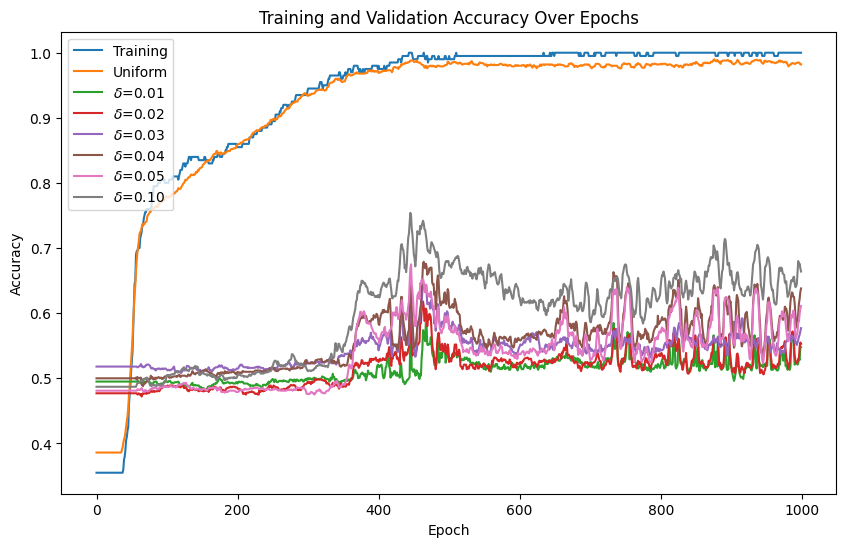

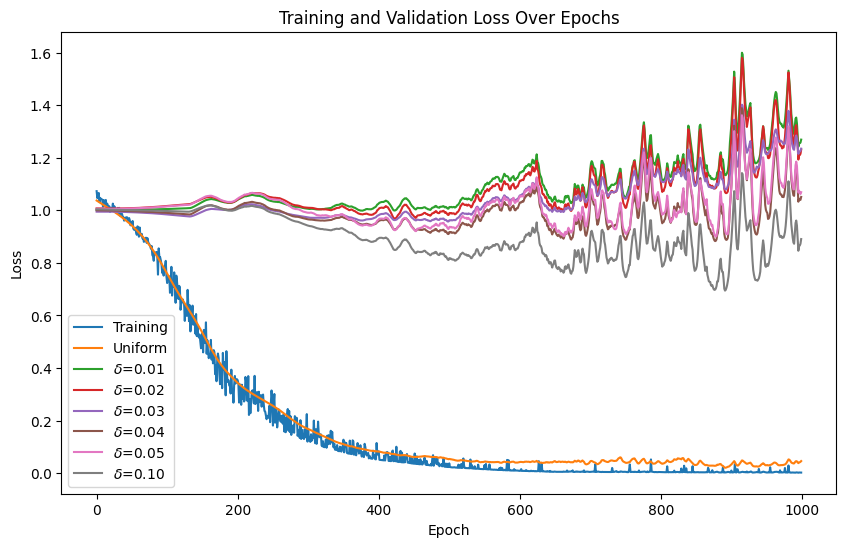

Accuracy: 1.0


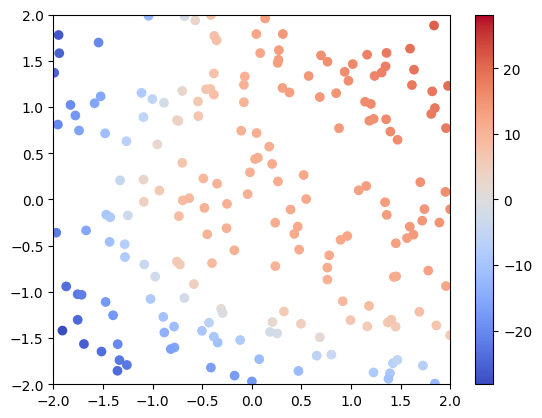

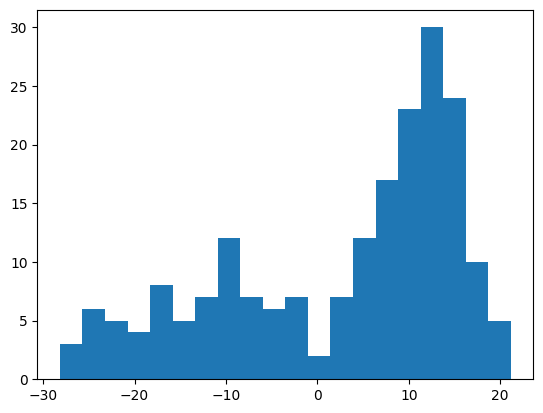

Accuracy: 0.9819999933242798


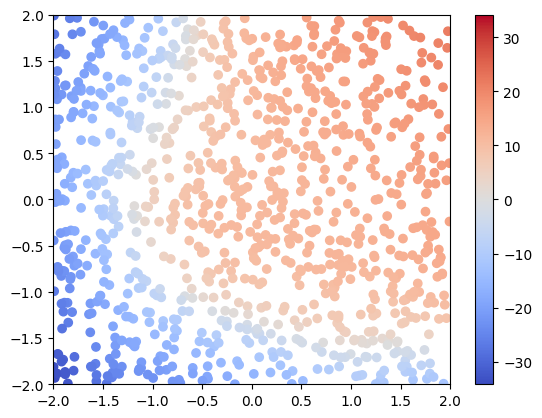

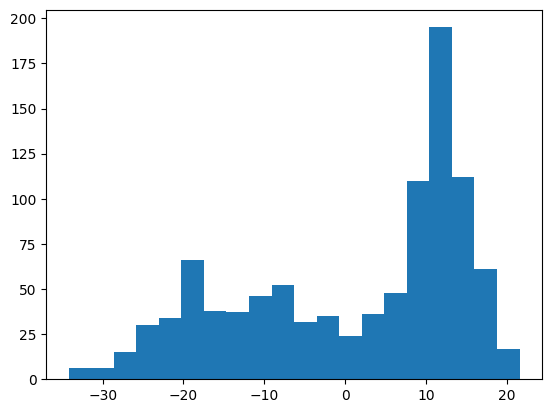

Accuracy: 0.5479999780654907


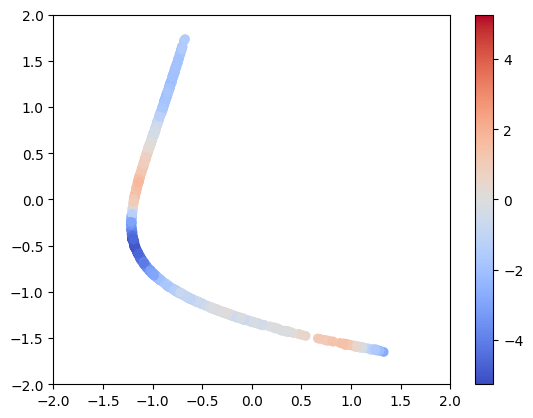

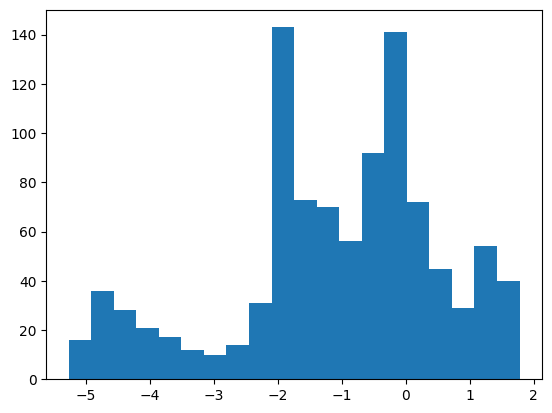

Accuracy: 0.5529999732971191


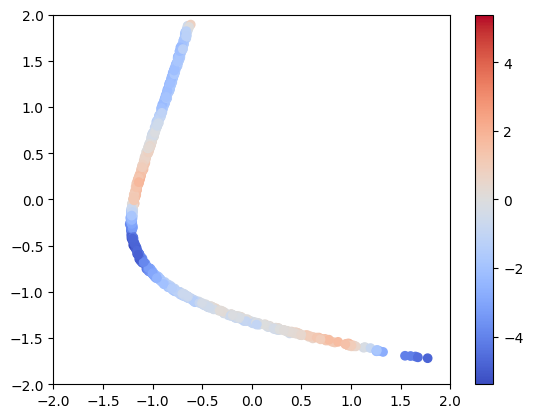

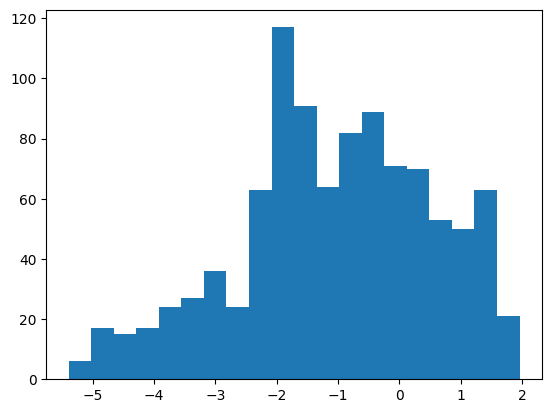

Accuracy: 0.5770000219345093


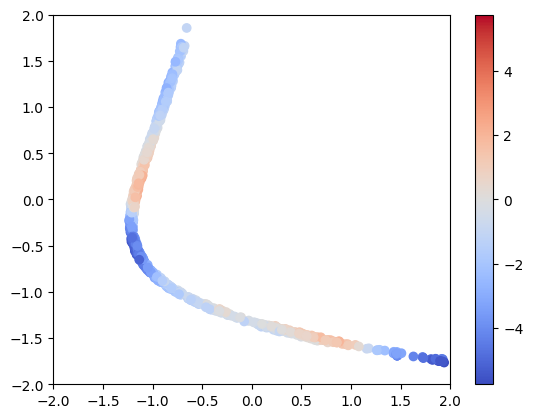

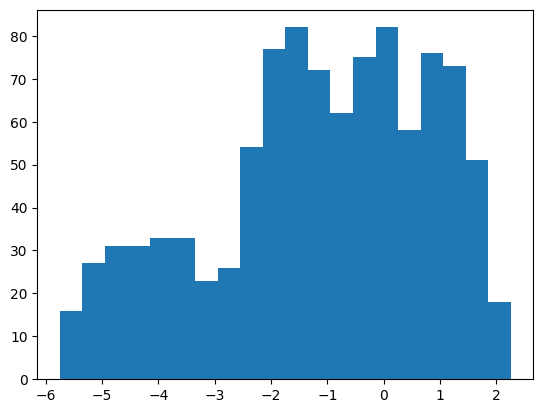

Accuracy: 0.6380000114440918


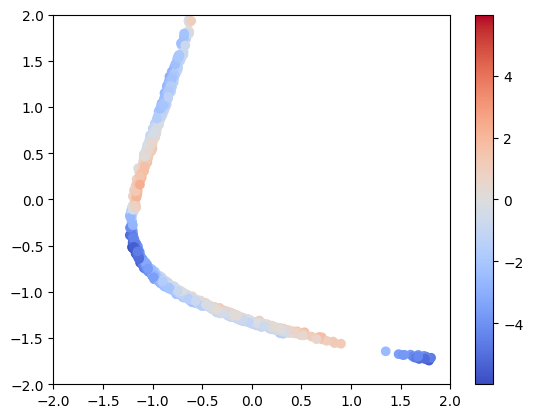

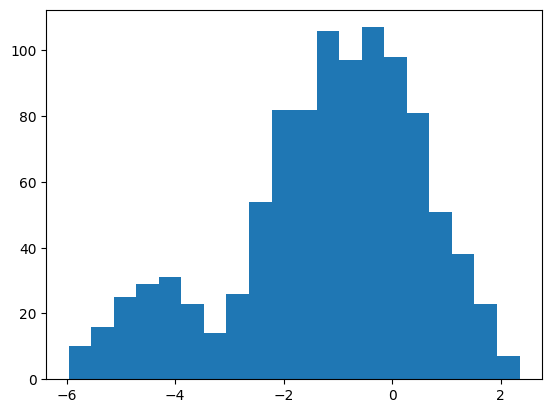

Accuracy: 0.6110000014305115


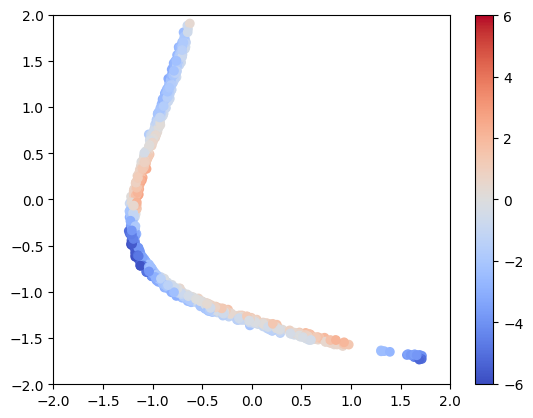

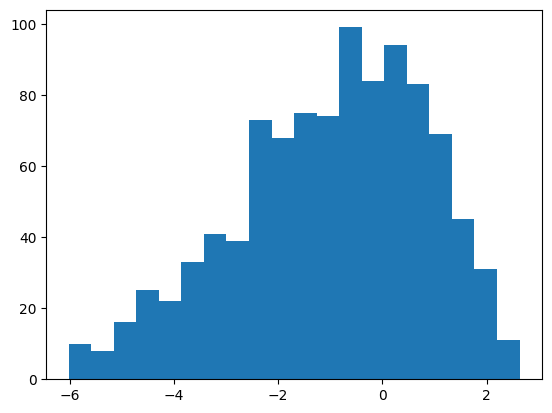

Accuracy: 0.6639999747276306


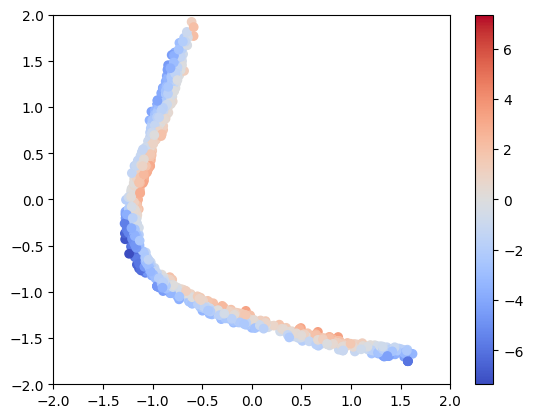

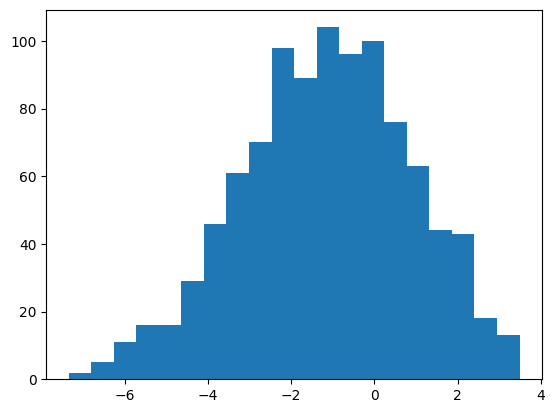

In [23]:
net_hinge = Net()
train_model_hinge(net_hinge, dataset_train, dataset_validation_uniform, dataset_validation_near_001, dataset_validation_near_002, dataset_validation_near_003,
                    dataset_validation_near_004, dataset_validation_near_005, dataset_validation_near_010, batchsize=64, epochs=1000, lr=0.0001)


Accuracy: 0.9860000014305115


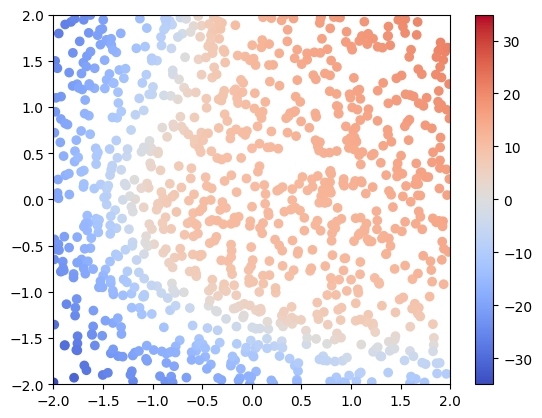

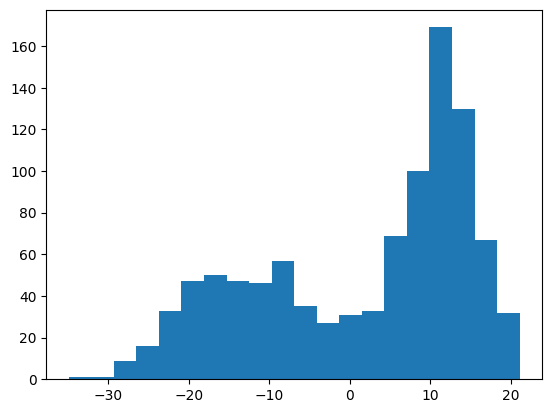

tensor(0.9860)

In [24]:
test_model(net_hinge, dataset_test_uniform)

Accuracy: 0.5519999861717224


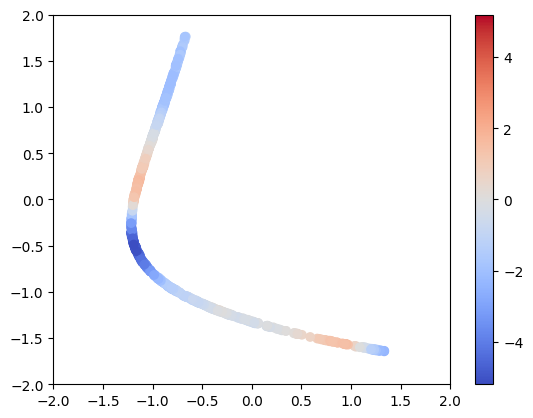

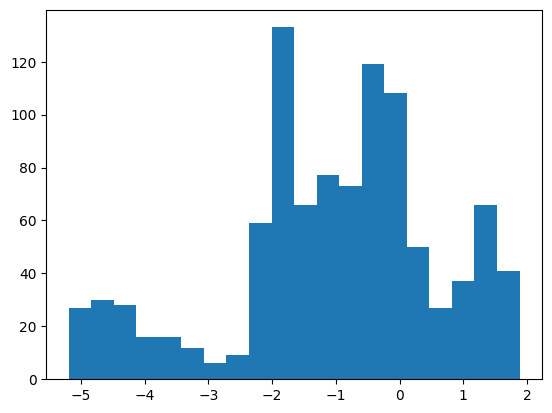

tensor(0.5520)

In [25]:
test_model(net_hinge, dataset_test_near_001)

Accuracy: 0.5619999766349792


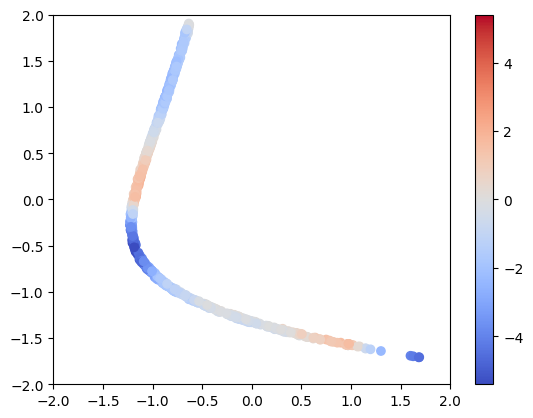

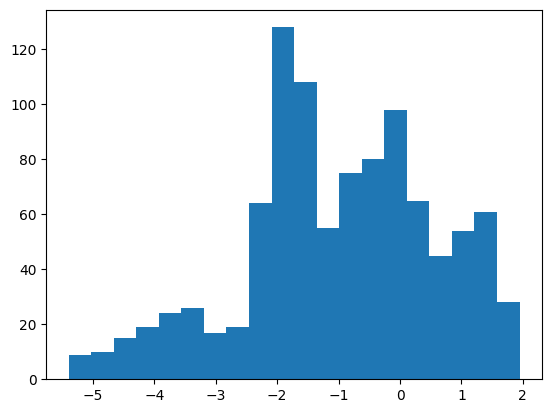

tensor(0.5620)

In [26]:
test_model(net_hinge, dataset_test_near_002)

Accuracy: 0.5820000171661377


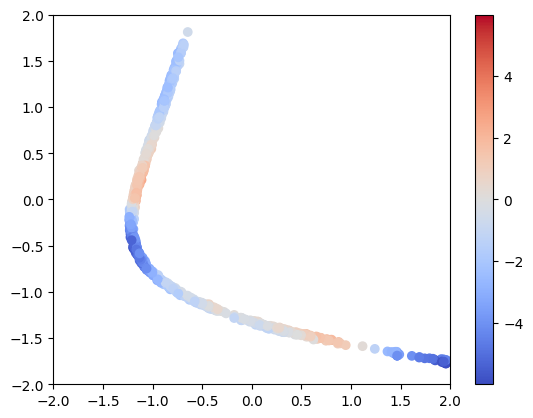

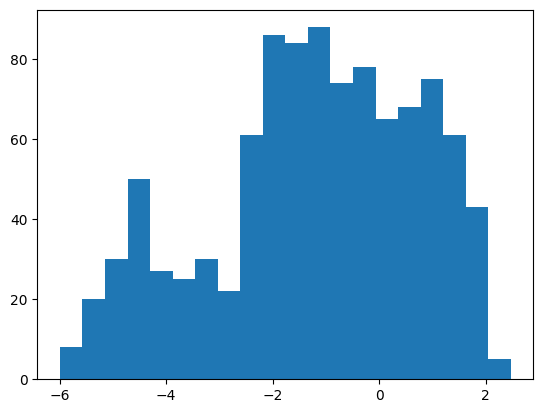

tensor(0.5820)

In [27]:
test_model(net_hinge, dataset_test_near_003)

Accuracy: 0.625


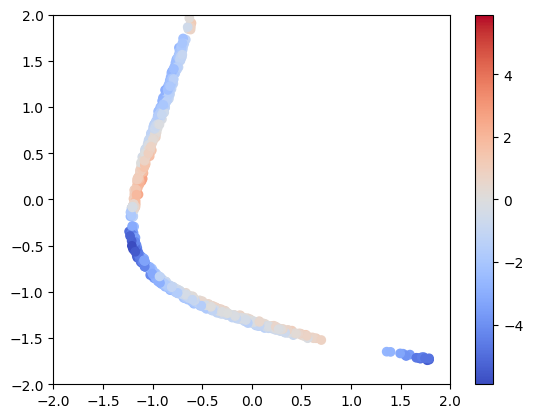

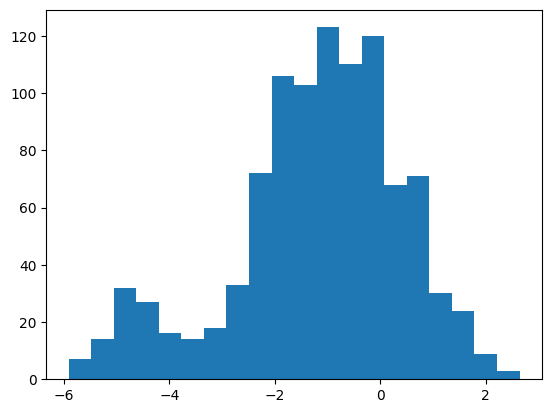

tensor(0.6250)

In [28]:
test_model(net_hinge, dataset_test_near_004)

Accuracy: 0.6430000066757202


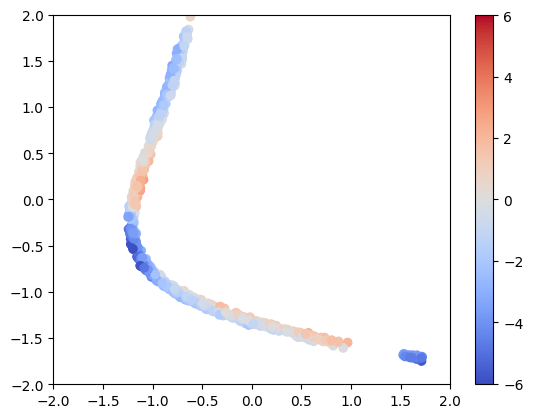

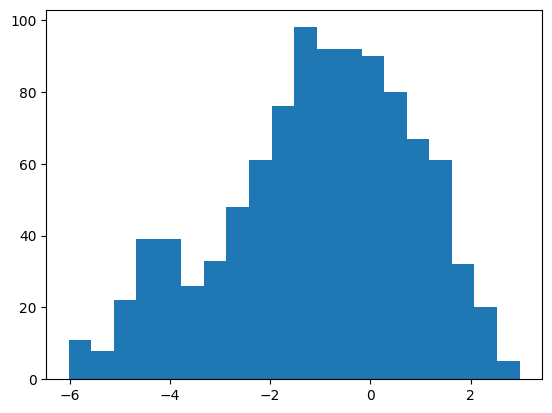

tensor(0.6430)

In [29]:
test_model(net_hinge, dataset_test_near_005)

Accuracy: 0.7350000143051147


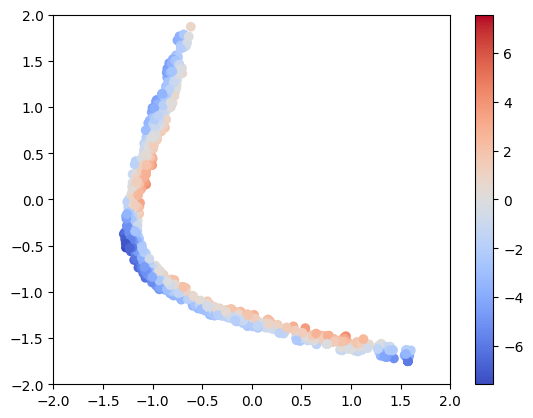

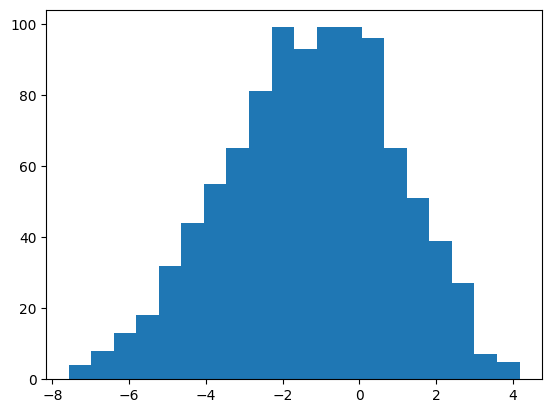

tensor(0.7350)

In [30]:
test_model(net_hinge, dataset_test_near_010)

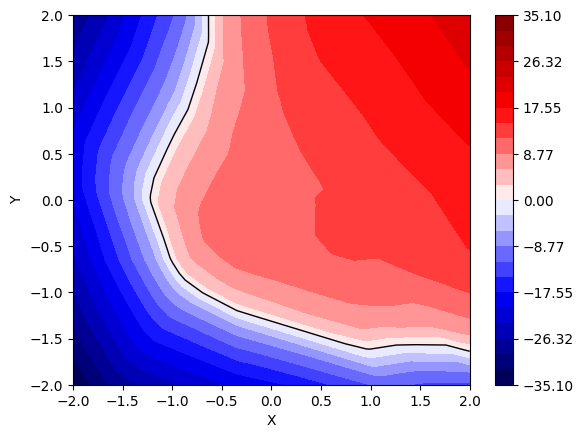

In [31]:
plot_contour(net_hinge)

In [32]:
def train_model_hinge_square(net, dataset_train, dataset_validation1, dataset_validation001, dataset_validation002,
                      dataset_validation003, dataset_validation004, dataset_validation005, dataset_validation010, batchsize, epochs, lr):
    criterion = QuadraticHingeLoss()
    #optimizer = optim.Adam(net.parameters(), lr=lr)
    optimizer = Lion(net.parameters(), lr=lr)
    dataloader_train = DataLoader(dataset_train, batch_size=batchsize, shuffle=True)
    dataloader_validation1 = DataLoader(dataset_validation1, batch_size=batchsize, shuffle=False)
    dataloader_validation001 = DataLoader(dataset_validation001, batch_size=batchsize, shuffle=False)
    dataloader_validation002 = DataLoader(dataset_validation002, batch_size=batchsize, shuffle=False)
    dataloader_validation003 = DataLoader(dataset_validation003, batch_size=batchsize, shuffle=False)
    dataloader_validation004 = DataLoader(dataset_validation004, batch_size=batchsize, shuffle=False)
    dataloader_validation005 = DataLoader(dataset_validation005, batch_size=batchsize, shuffle=False)
    dataloader_validation010 = DataLoader(dataset_validation010, batch_size=batchsize, shuffle=False)

    
    training_accuracy_over_epochs = []
    validation1_accuracy_over_epochs = []
    validation001_accuracy_over_epochs = []
    validation002_accuracy_over_epochs = []
    validation003_accuracy_over_epochs = []
    validation004_accuracy_over_epochs = []
    validation005_accuracy_over_epochs = []
    validation010_accuracy_over_epochs = []
    training_loss_over_epochs = []
    validation1_loss_over_epochs = []
    validation001_loss_over_epochs = []
    validation002_loss_over_epochs = []
    validation003_loss_over_epochs = []
    validation004_loss_over_epochs = []
    validation005_loss_over_epochs = []
    validation010_loss_over_epochs = []
    
    # Set up the overall progress bar
    overall_progress = tqdm(total=epochs, desc='Overall Training Progress')
    
    for epoch in range(epochs):
        net.train()
        correct_train = 0
        total_train = 0
        avg_loss_train = 0
        for features, labels in dataloader_train:
            #labels = ((labels + 1) / 2).float()
            labels = labels.view(-1)
            optimizer.zero_grad()
            outputs = net(features).view(-1)
            predicted = ((outputs > 0).float() * 2) - 1
            correct_train += (predicted == labels).sum().item()
            total_train += labels.size(0)
            loss = criterion(outputs, labels)
            avg_loss_train += loss.item()
            loss.backward()
            optimizer.step()
                    
        training_accuracy = correct_train / total_train
        training_loss = avg_loss_train / len(dataloader_train)
        training_accuracy_over_epochs.append(training_accuracy)
        training_loss_over_epochs.append(training_loss)

        
        net.eval()
        correct_validation1 = 0
        total_validation1 = 0
        avg_loss_validation1 = 0
        with torch.no_grad():
            for features, labels in dataloader_validation1:
                #labels = ((labels + 1) / 2).float()
                labels = labels.view(-1)
                outputs = net(features).view(-1)
                predicted = ((outputs > 0).float() * 2) - 1
                correct_validation1 += (predicted == labels).sum().item()
                total_validation1 += labels.size(0)
                loss = criterion(outputs, labels)
                avg_loss_validation1 += loss.item()
        
        validation1_accuracy = correct_validation1 / total_validation1
        validation1_accuracy_over_epochs.append(validation1_accuracy)
        validation1_loss = avg_loss_validation1 / len(dataloader_validation1)
        validation1_loss_over_epochs.append(validation1_loss)

        correct_validation001 = 0
        total_validation001 = 0
        avg_loss_validation001 = 0
        with torch.no_grad():
            for features, labels in dataloader_validation001:
                #labels = ((labels + 1) / 2).float()
                labels = labels.view(-1)
                outputs = net(features).view(-1)
                predicted = ((outputs > 0).float() * 2) - 1
                correct_validation001 += (predicted == labels).sum().item()
                total_validation001 += labels.size(0)
                loss = criterion(outputs, labels)
                avg_loss_validation001 += loss.item()
        
        validation001_accuracy = correct_validation001 / total_validation001
        validation001_accuracy_over_epochs.append(validation001_accuracy)
        validation001_loss = avg_loss_validation001 / len(dataloader_validation001)
        validation001_loss_over_epochs.append(validation001_loss)

        correct_validation002 = 0
        total_validation002 = 0
        avg_loss_validation002 = 0
        with torch.no_grad():
            for features, labels in dataloader_validation002:
                #labels = ((labels + 1) / 2).float()
                labels = labels.view(-1)
                outputs = net(features).view(-1)
                predicted = ((outputs > 0).float() * 2) - 1
                correct_validation002 += (predicted == labels).sum().item()
                total_validation002 += labels.size(0)
                loss = criterion(outputs, labels)
                avg_loss_validation002 += loss.item()
        
        validation002_accuracy = correct_validation002 / total_validation002
        validation002_accuracy_over_epochs.append(validation002_accuracy)
        validation002_loss = avg_loss_validation002 / len(dataloader_validation002)
        validation002_loss_over_epochs.append(validation002_loss)

        correct_validation003 = 0
        total_validation003 = 0
        avg_loss_validation003 = 0
        with torch.no_grad():
            for features, labels in dataloader_validation003:
                #labels = ((labels + 1) / 2).float()
                labels = labels.view(-1)
                outputs = net(features).view(-1)
                predicted = ((outputs > 0).float() * 2) - 1
                correct_validation003 += (predicted == labels).sum().item()
                total_validation003 += labels.size(0)
                loss = criterion(outputs, labels)
                avg_loss_validation003 += loss.item()
        
        validation003_accuracy = correct_validation003 / total_validation003
        validation003_accuracy_over_epochs.append(validation003_accuracy)
        validation003_loss = avg_loss_validation003 / len(dataloader_validation003)
        validation003_loss_over_epochs.append(validation003_loss)

        correct_validation004 = 0
        total_validation004 = 0
        avg_loss_validation004 = 0
        with torch.no_grad():
            for features, labels in dataloader_validation004:
                #labels = ((labels + 1) / 2).float()
                labels = labels.view(-1)
                outputs = net(features).view(-1)
                predicted = ((outputs > 0).float() * 2) - 1
                correct_validation004 += (predicted == labels).sum().item()
                total_validation004 += labels.size(0)
                loss = criterion(outputs, labels)
                avg_loss_validation004 += loss.item()
        
        validation004_accuracy = correct_validation004 / total_validation004
        validation004_accuracy_over_epochs.append(validation004_accuracy)
        validation004_loss = avg_loss_validation004 / len(dataloader_validation004)
        validation004_loss_over_epochs.append(validation004_loss)

        correct_validation005 = 0
        total_validation005 = 0
        avg_loss_validation005 = 0
        with torch.no_grad():
            for features, labels in dataloader_validation005:
                #labels = ((labels + 1) / 2).float()
                labels = labels.view(-1)
                outputs = net(features).view(-1)
                predicted = ((outputs > 0).float() * 2) - 1
                correct_validation005 += (predicted == labels).sum().item()
                total_validation005 += labels.size(0)
                loss = criterion(outputs, labels)
                avg_loss_validation005 += loss.item()
        
        validation005_accuracy = correct_validation005 / total_validation005
        validation005_accuracy_over_epochs.append(validation005_accuracy)
        validation005_loss = avg_loss_validation005 / len(dataloader_validation005)
        validation005_loss_over_epochs.append(validation005_loss)

        correct_validation010 = 0
        total_validation010 = 0
        avg_loss_validation010 = 0
        with torch.no_grad():
            for features, labels in dataloader_validation010:
                #labels = ((labels + 1) / 2).float()
                labels = labels.view(-1)
                outputs = net(features).view(-1)
                predicted = ((outputs > 0).float() * 2) - 1
                correct_validation010 += (predicted == labels).sum().item()
                total_validation010 += labels.size(0)
                loss = criterion(outputs, labels)
                avg_loss_validation010 += loss.item()
        
        validation010_accuracy = correct_validation010 / total_validation010
        validation010_accuracy_over_epochs.append(validation010_accuracy)
        validation010_loss = avg_loss_validation010 / len(dataloader_validation010)
        validation010_loss_over_epochs.append(validation010_loss)
        
        # Update the overall progress bar after each epoch
        overall_progress.update(1)
        #overall_progress.set_postfix({'Training Accuracy': training_accuracy, 'Validation1 Accuracy': validation1_accuracy, 'Validation2 Accuracy': validation2_accuracy})
        overall_progress.set_postfix({'Training Accuracy': training_accuracy,
                                       'Validation1 Accuracy': validation1_accuracy,
                                        'Validation001 Accuracy': validation001_accuracy, 
                                        'Validation002 Accuracy': validation002_accuracy, 
                                        'Validation003 Accuracy': validation003_accuracy, 
                                        'Validation004 Accuracy': validation004_accuracy, 
                                        'Validation005 Accuracy': validation005_accuracy, 
                                        'Validation010 Accuracy': validation010_accuracy})
    
    overall_progress.close()
    
    # Plot training and validation accuracy over epochs
    plt.figure(figsize=(10, 6))
    plt.plot(training_accuracy_over_epochs, label='Training')
    plt.plot(validation1_accuracy_over_epochs, label='Uniform')
    plt.plot(validation001_accuracy_over_epochs, label='$\delta$=0.01')
    plt.plot(validation002_accuracy_over_epochs, label='$\delta$=0.02')
    plt.plot(validation003_accuracy_over_epochs, label='$\delta$=0.03')
    plt.plot(validation004_accuracy_over_epochs, label='$\delta$=0.04')
    plt.plot(validation005_accuracy_over_epochs, label='$\delta$=0.05')
    plt.plot(validation010_accuracy_over_epochs, label='$\delta$=0.10')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy Over Epochs')
    plt.legend()
    plt.show()

    # Plot training and validation loss over epochs
    plt.figure(figsize=(10, 6))
    plt.plot(training_loss_over_epochs, label='Training')
    plt.plot(validation1_loss_over_epochs, label='Uniform')
    plt.plot(validation001_loss_over_epochs, label='$\delta$=0.01')
    plt.plot(validation002_loss_over_epochs, label='$\delta$=0.02')
    plt.plot(validation003_loss_over_epochs, label='$\delta$=0.03')
    plt.plot(validation004_loss_over_epochs, label='$\delta$=0.04')
    plt.plot(validation005_loss_over_epochs, label='$\delta$=0.05')
    plt.plot(validation010_loss_over_epochs, label='$\delta$=0.10')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss Over Epochs')
    plt.legend()
    plt.show()
    
    test_model(net, dataset_train)
    test_model(net, dataset_validation1)
    test_model(net, dataset_validation001)
    test_model(net, dataset_validation002)
    test_model(net, dataset_validation003)
    test_model(net, dataset_validation004)
    test_model(net, dataset_validation005)
    test_model(net, dataset_validation010)

Overall Training Progress: 100%|██████████| 1000/1000 [04:51<00:00,  3.43it/s, Training Accuracy=1, Validation1 Accuracy=0.988, Validation001 Accuracy=0.519, Validation002 Accuracy=0.538, Validation003 Accuracy=0.556, Validation004 Accuracy=0.61, Validation005 Accuracy=0.58, Validation010 Accuracy=0.663]     


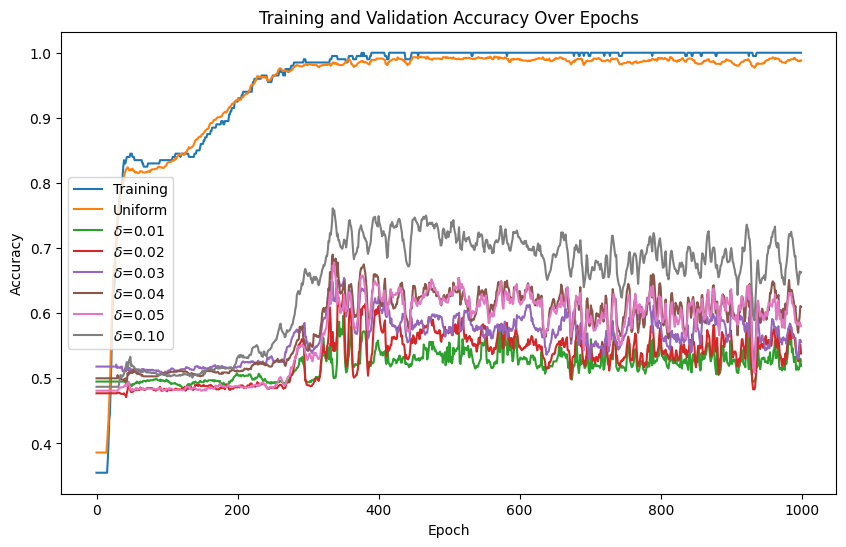

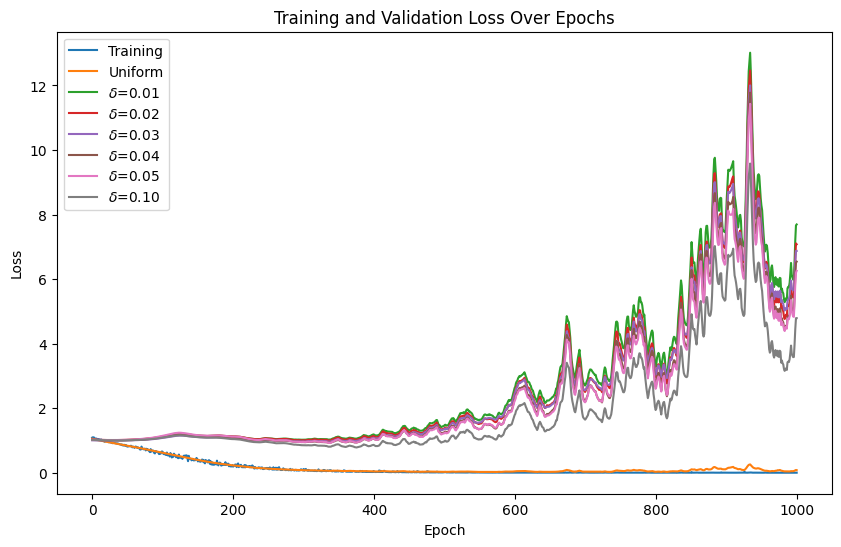

Accuracy: 1.0


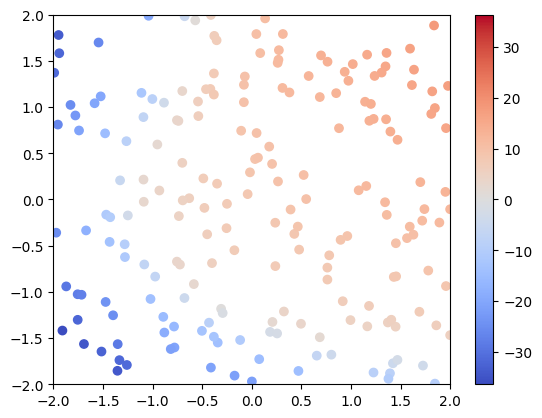

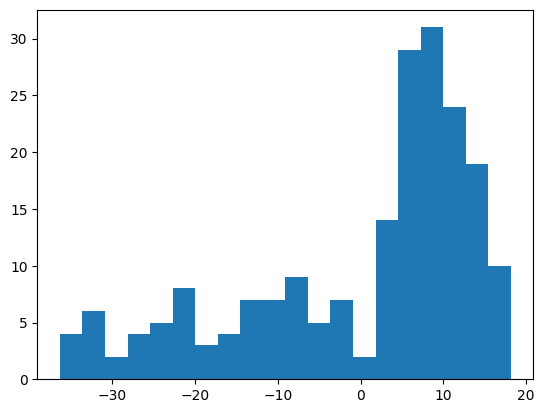

Accuracy: 0.9879999756813049


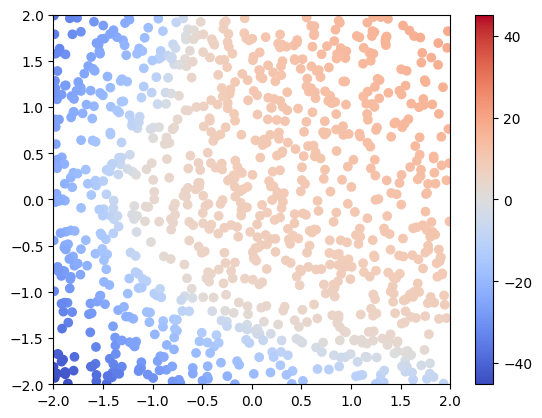

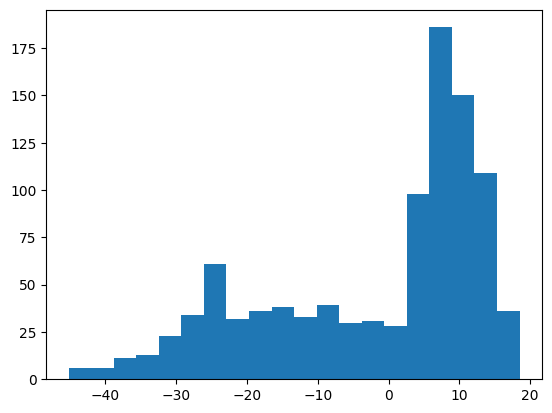

Accuracy: 0.5189999938011169


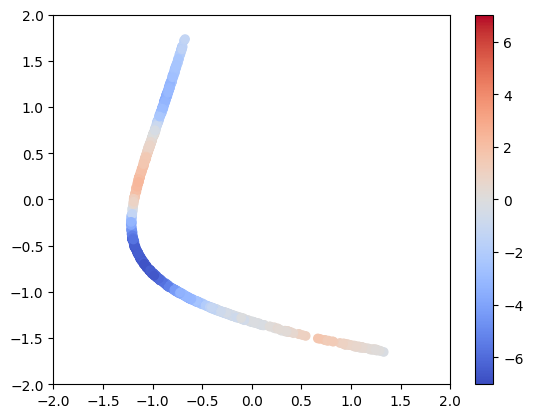

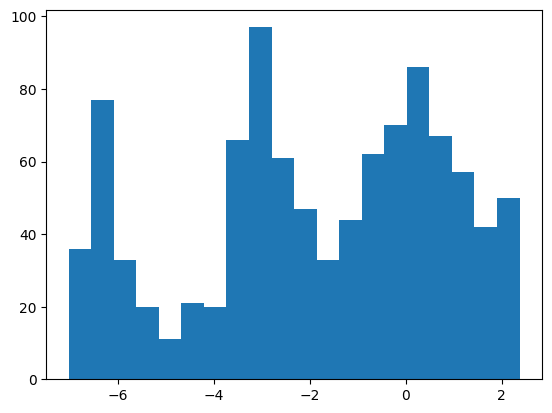

Accuracy: 0.5379999876022339


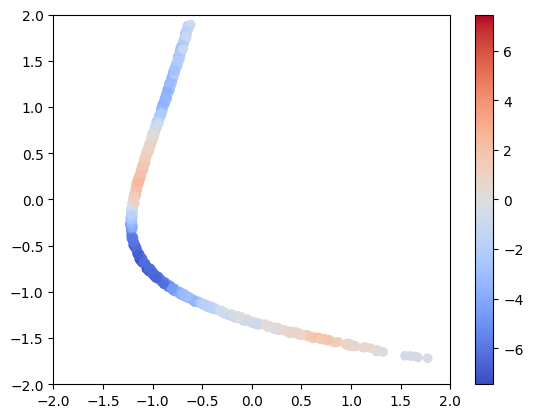

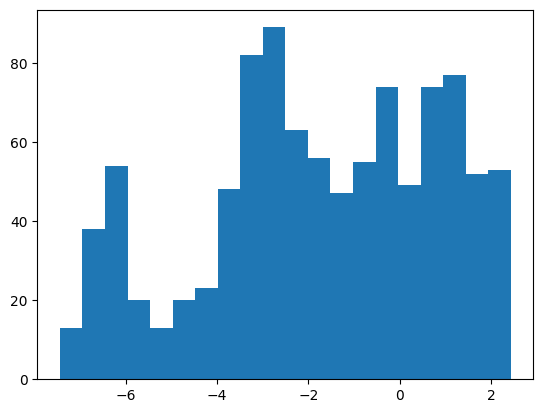

Accuracy: 0.5559999942779541


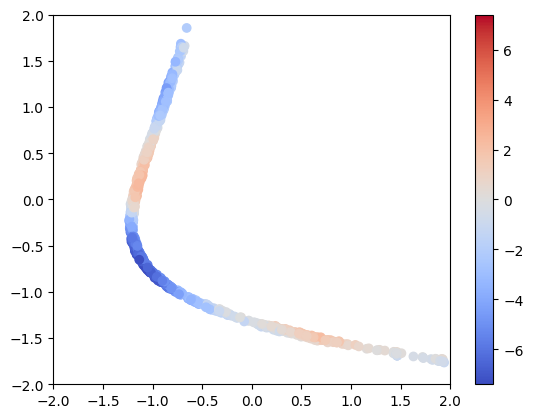

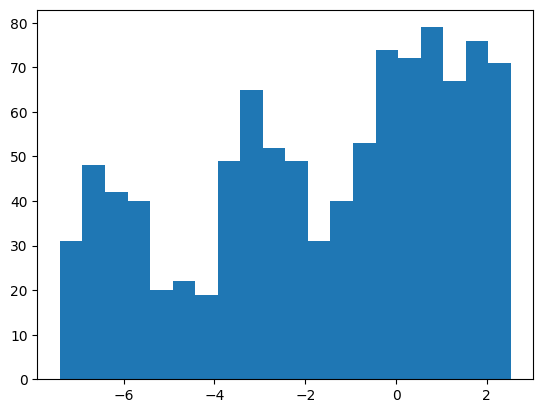

Accuracy: 0.6100000143051147


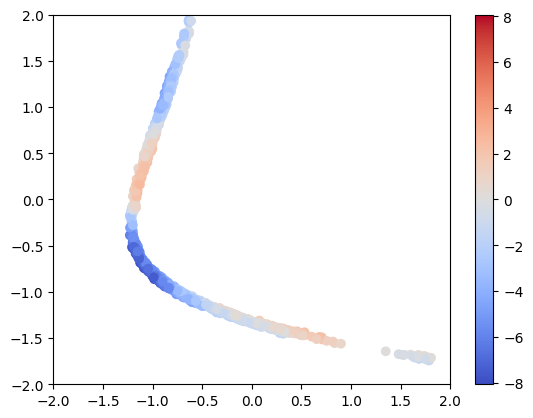

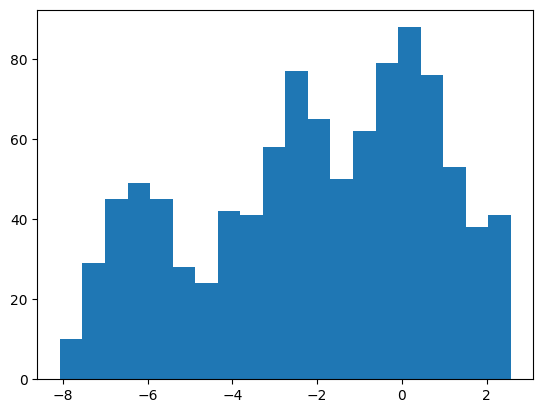

Accuracy: 0.5799999833106995


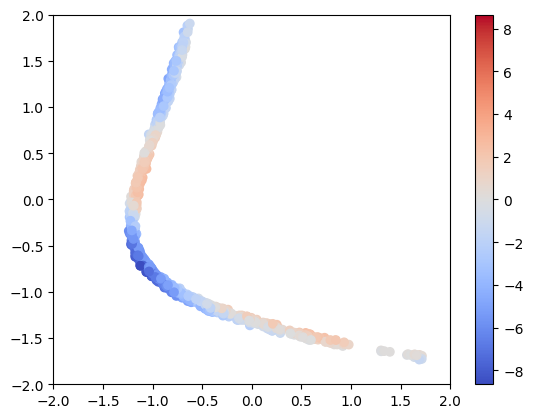

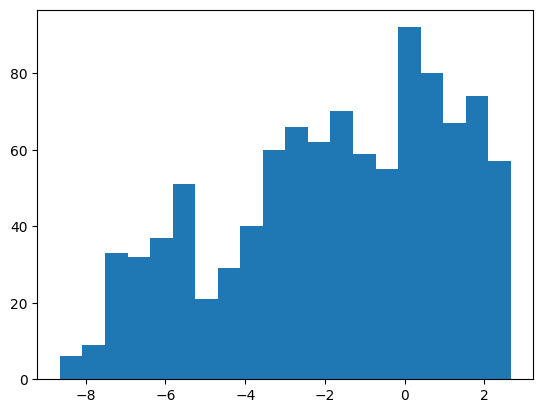

Accuracy: 0.6629999876022339


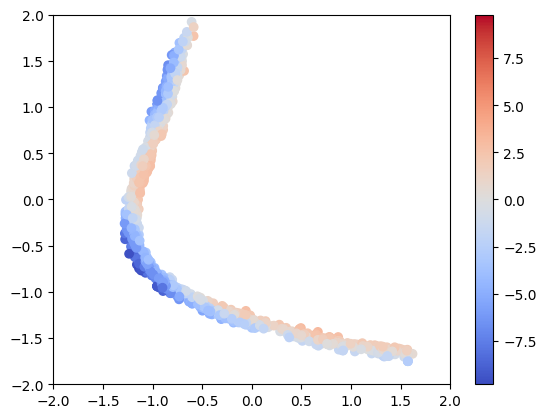

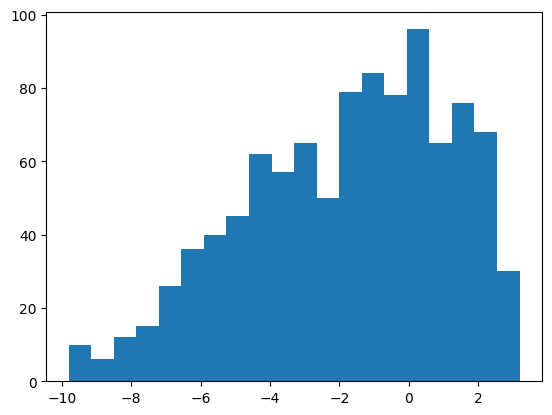

In [33]:
net_hinge_square = Net()
train_model_hinge_square(net_hinge_square, dataset_train, dataset_validation_uniform, dataset_validation_near_001, dataset_validation_near_002, dataset_validation_near_003,
                    dataset_validation_near_004, dataset_validation_near_005, dataset_validation_near_010, batchsize=64, epochs=1000, lr=0.0001)

Accuracy: 0.9860000014305115


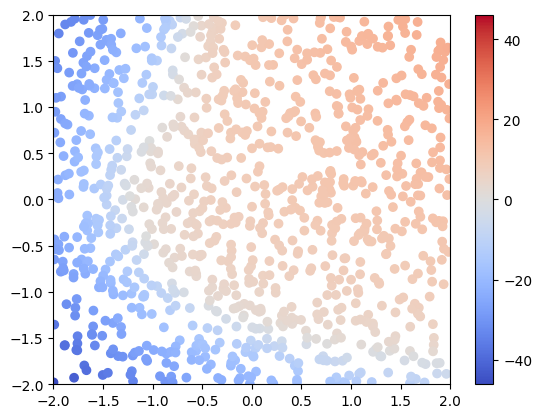

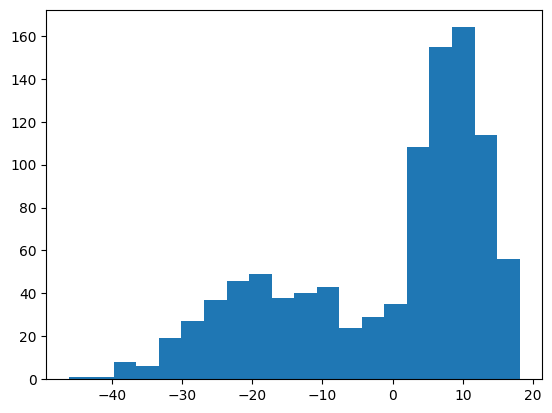

tensor(0.9860)

In [34]:
test_model(net_hinge_square, dataset_test_uniform)

Accuracy: 0.5410000085830688


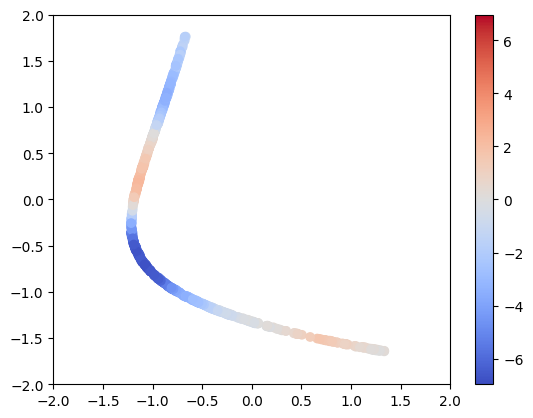

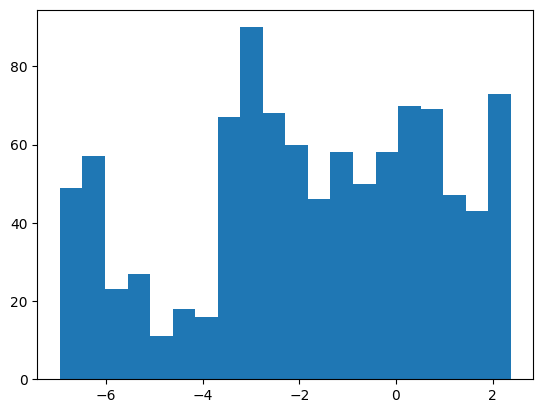

tensor(0.5410)

In [35]:
test_model(net_hinge_square, dataset_test_near_001)

Accuracy: 0.5429999828338623


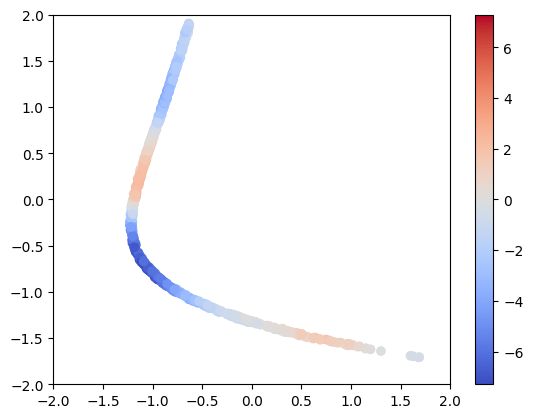

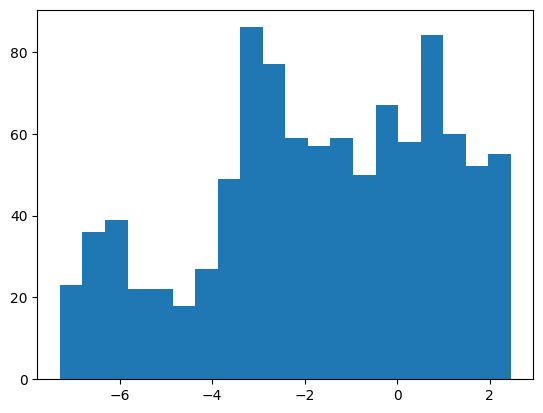

tensor(0.5430)

In [36]:
test_model(net_hinge_square, dataset_test_near_002)

Accuracy: 0.5690000057220459


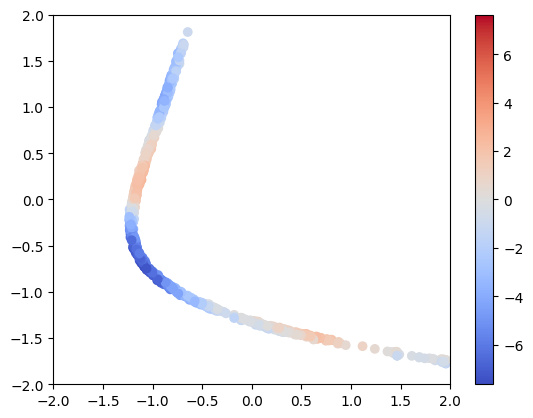

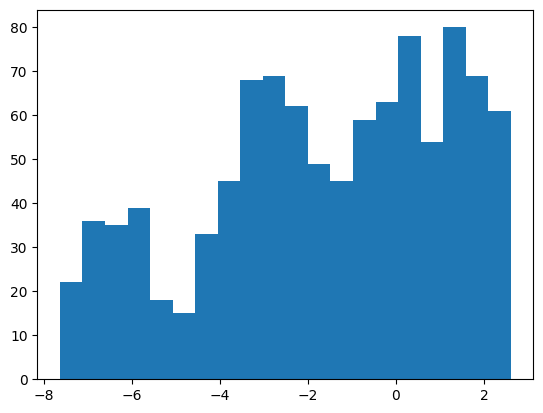

tensor(0.5690)

In [37]:
test_model(net_hinge_square, dataset_test_near_003)

Accuracy: 0.5759999752044678


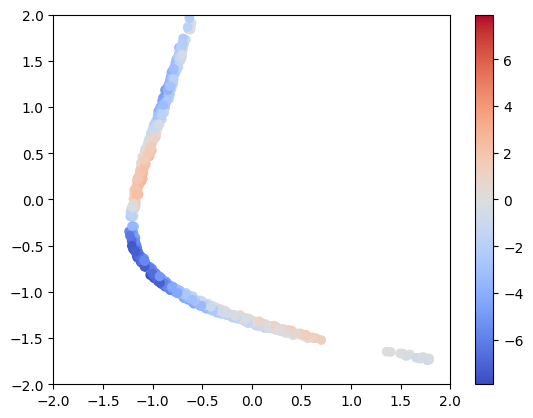

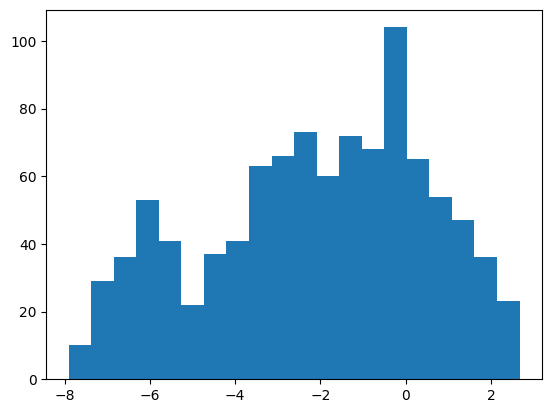

tensor(0.5760)

In [38]:
test_model(net_hinge_square, dataset_test_near_004)

Accuracy: 0.609000027179718


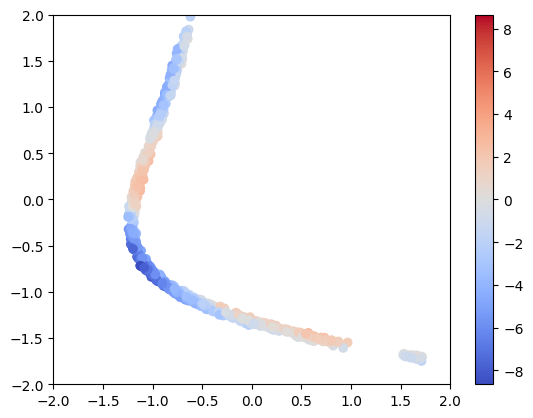

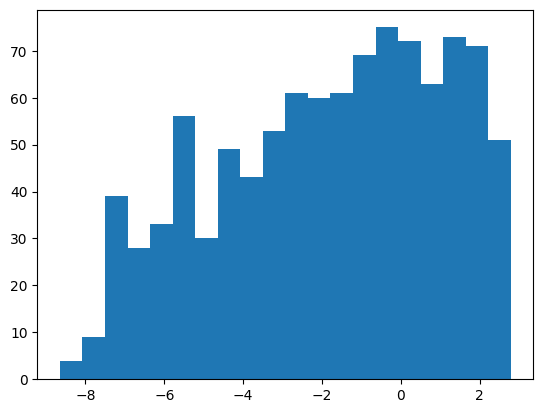

tensor(0.6090)

In [39]:
test_model(net_hinge_square, dataset_test_near_005)

Accuracy: 0.7139999866485596


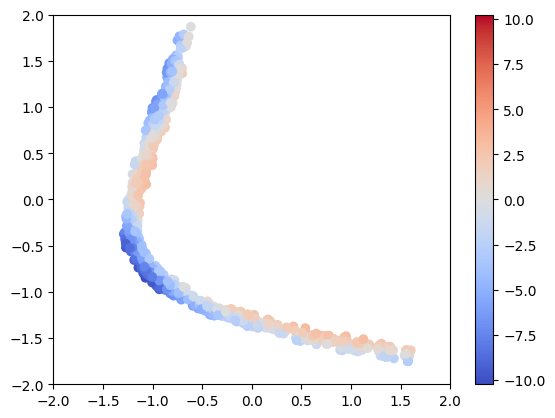

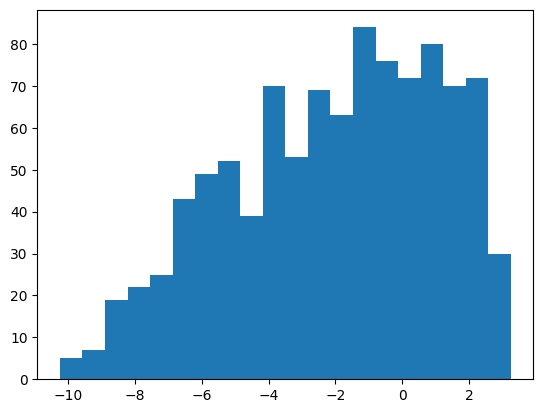

tensor(0.7140)

In [145]:
test_model(net_hinge_square, dataset_test_near_010)

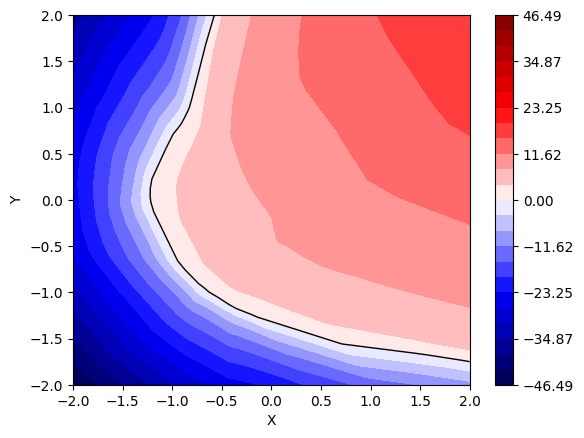

In [144]:
plot_contour(net_hinge_square)

## Dynamical loss

In [156]:
def dynamical_system_vector(point):
    x,y = point[0], point[1]
    xp = -x-y-x*x
    yp = x-y-y*y
    return torch.tensor([xp, yp], dtype=torch.float32)

def custom_loss_function(model, batch_inputs):
    batch_loss = 0.0
    def dirac(value, var=0.1):
        return torch.exp(-(value)**2 / (2 * var**2)) / torch.sqrt(torch.tensor(2 * torch.pi * var**2))
    
    for input_point in batch_inputs:
        prediction = model(input_point.unsqueeze(0))
        grad_output = torch.ones_like(prediction)
        gradient = torch.autograd.grad(prediction, input_point, grad_outputs=grad_output, create_graph=True)[0]
        dynamical_vector = dynamical_system_vector(input_point)

        #gradient_normalized = gradient / (torch.norm(gradient) + 1e-8)
        #dynamical_vector_normalized = dynamical_vector / (torch.norm(dynamical_vector) + 1e-8)

        # Check if the norm of the gradient or dynamical vector is zero
        gradient_norm = torch.norm(gradient)
        dynamical_vector_norm = torch.norm(dynamical_vector)
        
        if gradient_norm == 0 or dynamical_vector_norm == 0:
            gradient_normalized = torch.zeros_like(gradient)
            dynamical_vector_normalized = torch.zeros_like(dynamical_vector)
        else:
            gradient_normalized = gradient / gradient_norm
            dynamical_vector_normalized = dynamical_vector / dynamical_vector_norm


        inner_product = torch.dot(gradient_normalized, dynamical_vector_normalized)
        dirac_value = dirac(prediction)
        gradient_norm = torch.norm(gradient)
        loss = (inner_product ** 2) * gradient_norm * dirac_value
        batch_loss += loss
    
    # Average the loss over the batch
    batch_loss /= len(batch_inputs)
    
    return batch_loss




In [43]:
def train_model_dynamical(net, dataset_train, dataset_validation1, dataset_validation001, dataset_validation002,
                        dataset_validation003, dataset_validation004, 
                        dataset_validation005, dataset_validation010, batchsize, epochs, lr):
    criterion_sqhinge = QuadraticHingeLoss()
    #criterion_sqhinge = nn.BCEWithLogitsLoss()
    optimizer = Lion(net.parameters(), lr=lr)
    dataloader_train = DataLoader(dataset_train, batch_size=batchsize, shuffle=True)
    dataloader_validation1 = DataLoader(dataset_validation1, batch_size=batchsize, shuffle=False)
    dataloader_validation001 = DataLoader(dataset_validation001, batch_size=batchsize, shuffle=False)
    dataloader_validation002 = DataLoader(dataset_validation002, batch_size=batchsize, shuffle=False)
    dataloader_validation003 = DataLoader(dataset_validation003, batch_size=batchsize, shuffle=False)
    dataloader_validation004 = DataLoader(dataset_validation004, batch_size=batchsize, shuffle=False)
    dataloader_validation005 = DataLoader(dataset_validation005, batch_size=batchsize, shuffle=False)
    dataloader_validation010 = DataLoader(dataset_validation010, batch_size=batchsize, shuffle=False)
    
    training_accuracy_over_epochs = []
    validation1_accuracy_over_epochs = []
    validation001_accuracy_over_epochs = []
    validation002_accuracy_over_epochs = []
    validation003_accuracy_over_epochs = []
    validation004_accuracy_over_epochs = []
    validation005_accuracy_over_epochs = []
    validation010_accuracy_over_epochs = []
    training_loss_dynamical_over_epochs = []
    validation1_loss_dynamical_over_epochs = []
    validation001_loss_dynamical_over_epochs = []
    validation002_loss_dynamical_over_epochs = []
    validation003_loss_dynamical_over_epochs = []
    validation004_loss_dynamical_over_epochs = []
    validation005_loss_dynamical_over_epochs = []
    validation010_loss_dynamical_over_epochs = []
    training_loss_hinge_over_epochs = []
    validation1_loss_hinge_over_epochs = []
    validation001_loss_hinge_over_epochs = []
    validation002_loss_hinge_over_epochs = []
    validation003_loss_hinge_over_epochs = []
    validation004_loss_hinge_over_epochs = []
    validation005_loss_hinge_over_epochs = []
    validation010_loss_hinge_over_epochs = []
    
    overall_progress = tqdm(total=epochs, desc='Overall Training Progress')
    
    for epoch in range(epochs):
        net.train()
        correct_train = 0
        total_train = 0
        avg_loss_train_dynamical = 0
        avg_loss_train_hinge = 0
        for features, labels in dataloader_train:
            #labels = ((labels + 1) / 2).float()
            features.requires_grad = True
            labels = labels.view(-1)
            optimizer.zero_grad()
            outputs = net(features).view(-1)
            predicted = ((outputs > 0).float() * 2) - 1
            #predicted = (outputs > 0).float()
            correct_train += (predicted == labels).sum().item()
            total_train += labels.size(0)
            loss_dynamic = custom_loss_function(net, features)
            loss_hinge =  criterion_sqhinge(outputs, labels)
            loss = 0.01*loss_dynamic + 1*loss_hinge # C=constant
            avg_loss_train_dynamical += loss_dynamic.item()
            avg_loss_train_hinge += loss_hinge.item()
            loss.backward()
            optimizer.step()
    
                    
        training_accuracy = correct_train / total_train
        training_loss_dynamical = avg_loss_train_dynamical / len(dataloader_train)
        training_loss_hinge = avg_loss_train_hinge / len(dataloader_train)
        training_accuracy_over_epochs.append(training_accuracy)
        training_loss_dynamical_over_epochs.append(training_loss_dynamical)
        training_loss_hinge_over_epochs.append(training_loss_hinge)


        net.eval()
        correct_validation1 = 0
        total_validation1 = 0
        avg_loss_validation1_dynamical = 0
        avg_loss_validation1_hinge = 0
        for features, labels in dataloader_validation1:
            #labels = ((labels + 1) / 2).float()
            features.requires_grad = True
            labels = labels.view(-1)
            outputs = net(features).view(-1)
            predicted = ((outputs > 0).float() * 2) - 1
            #predicted = (outputs > 0).float()
            correct_validation1 += (predicted == labels).sum().item()
            total_validation1 += labels.size(0)
            loss_dynamic = custom_loss_function(net, features)
            loss_hinge =  criterion_sqhinge(outputs, labels)
            #loss = loss_dynamic + loss_hinge
            avg_loss_validation1_dynamical += loss_dynamic.item()
            avg_loss_validation1_hinge += loss_hinge.item()
        
        validation1_accuracy = correct_validation1 / total_validation1
        validation1_accuracy_over_epochs.append(validation1_accuracy)
        validation1_loss_dynamical = avg_loss_validation1_dynamical / len(dataloader_validation1)
        validation1_loss_dynamical_over_epochs.append(validation1_loss_dynamical)
        validation1_loss_hinge = avg_loss_validation1_hinge / len(dataloader_validation1)
        validation1_loss_hinge_over_epochs.append(validation1_loss_hinge)

        correct_validation001 = 0
        total_validation001 = 0
        avg_loss_validation001_dynamical = 0
        avg_loss_validation001_hinge = 0
        for features, labels in dataloader_validation001:
            #labels = ((labels + 1) / 2).float()
            features.requires_grad = True
            labels = labels.view(-1)
            outputs = net(features).view(-1)
            predicted = ((outputs > 0).float() * 2) - 1
            #predicted = (outputs > 0).float()
            correct_validation001 += (predicted == labels).sum().item()
            total_validation001 += labels.size(0)
            loss_dynamic = custom_loss_function(net, features)
            loss_hinge =  criterion_sqhinge(outputs, labels)
            avg_loss_validation001_dynamical += loss_dynamic.item()
            avg_loss_validation001_hinge += loss_hinge.item()
        
        validation001_accuracy = correct_validation001 / total_validation001
        validation001_accuracy_over_epochs.append(validation001_accuracy)
        validation001_loss_dynamical = avg_loss_validation001_dynamical / len(dataloader_validation001)
        validation001_loss_dynamical_over_epochs.append(validation001_loss_dynamical)
        validation001_loss_hinge = avg_loss_validation001_hinge / len(dataloader_validation001)
        validation001_loss_hinge_over_epochs.append(validation001_loss_hinge)

        correct_validation002 = 0
        total_validation002 = 0
        avg_loss_validation002_dynamical = 0
        avg_loss_validation002_hinge = 0
        for features, labels in dataloader_validation002:
            #labels = ((labels + 1) / 2).float()
            features.requires_grad = True
            labels = labels.view(-1)
            outputs = net(features).view(-1)
            predicted = ((outputs > 0).float() * 2) - 1
            #predicted = (outputs > 0).float()
            correct_validation002 += (predicted == labels).sum().item()
            total_validation002 += labels.size(0)
            loss_dynamic = custom_loss_function(net, features)
            loss_hinge =  criterion_sqhinge(outputs, labels)
            avg_loss_validation002_dynamical += loss_dynamic.item()
            avg_loss_validation002_hinge += loss_hinge.item()
        
        validation002_accuracy = correct_validation002 / total_validation002
        validation002_accuracy_over_epochs.append(validation002_accuracy)
        validation002_loss_dynamical = avg_loss_validation002_dynamical / len(dataloader_validation002)
        validation002_loss_dynamical_over_epochs.append(validation002_loss_dynamical)
        validation002_loss_hinge = avg_loss_validation002_hinge / len(dataloader_validation002)
        validation002_loss_hinge_over_epochs.append(validation002_loss_hinge)

        correct_validation003 = 0
        total_validation003 = 0
        avg_loss_validation003_dynamical = 0
        avg_loss_validation003_hinge = 0
        for features, labels in dataloader_validation003:
            #labels = ((labels + 1) / 2).float()
            features.requires_grad = True
            labels = labels.view(-1)
            outputs = net(features).view(-1)
            predicted = ((outputs > 0).float() * 2) - 1
            #predicted = (outputs > 0).float()
            correct_validation003 += (predicted == labels).sum().item()
            total_validation003 += labels.size(0)
            loss_dynamic = custom_loss_function(net, features)
            loss_hinge =  criterion_sqhinge(outputs, labels)
            avg_loss_validation003_dynamical += loss_dynamic.item()
            avg_loss_validation003_hinge += loss_hinge.item()
        
        validation003_accuracy = correct_validation003 / total_validation003
        validation003_accuracy_over_epochs.append(validation003_accuracy)
        validation003_loss_dynamical = avg_loss_validation003_dynamical / len(dataloader_validation003)
        validation003_loss_dynamical_over_epochs.append(validation003_loss_dynamical)
        validation003_loss_hinge = avg_loss_validation003_hinge / len(dataloader_validation003)
        validation003_loss_hinge_over_epochs.append(validation003_loss_hinge)

        correct_validation004 = 0
        total_validation004 = 0
        avg_loss_validation004_dynamical = 0
        avg_loss_validation004_hinge = 0
        for features, labels in dataloader_validation004:
            #labels = ((labels + 1) / 2).float()
            features.requires_grad = True
            labels = labels.view(-1)
            outputs = net(features).view(-1)
            predicted = ((outputs > 0).float() * 2) - 1
            #predicted = (outputs > 0).float()
            correct_validation004 += (predicted == labels).sum().item()
            total_validation004 += labels.size(0)
            loss_dynamic = custom_loss_function(net, features)
            loss_hinge =  criterion_sqhinge(outputs, labels)
            avg_loss_validation004_dynamical += loss_dynamic.item()
            avg_loss_validation004_hinge += loss_hinge.item()
        
        validation004_accuracy = correct_validation004 / total_validation004
        validation004_accuracy_over_epochs.append(validation004_accuracy)
        validation004_loss_dynamical = avg_loss_validation004_dynamical / len(dataloader_validation004)
        validation004_loss_dynamical_over_epochs.append(validation004_loss_dynamical)
        validation004_loss_hinge = avg_loss_validation004_hinge / len(dataloader_validation004)
        validation004_loss_hinge_over_epochs.append(validation004_loss_hinge)

        correct_validation005 = 0
        total_validation005 = 0
        avg_loss_validation005_dynamical = 0
        avg_loss_validation005_hinge = 0
        for features, labels in dataloader_validation005:
            #labels = ((labels + 1) / 2).float()
            features.requires_grad = True
            labels = labels.view(-1)
            outputs = net(features).view(-1)
            predicted = ((outputs > 0).float() * 2) - 1
            #predicted = (outputs > 0).float()
            correct_validation005 += (predicted == labels).sum().item()
            total_validation005 += labels.size(0)
            loss_dynamic = custom_loss_function(net, features)
            loss_hinge =  criterion_sqhinge(outputs, labels)
            avg_loss_validation005_dynamical += loss_dynamic.item()
            avg_loss_validation005_hinge += loss_hinge.item()
        
        validation005_accuracy = correct_validation005 / total_validation005
        validation005_accuracy_over_epochs.append(validation005_accuracy)
        validation005_loss_dynamical = avg_loss_validation005_dynamical / len(dataloader_validation005)
        validation005_loss_dynamical_over_epochs.append(validation005_loss_dynamical)
        validation005_loss_hinge = avg_loss_validation005_hinge / len(dataloader_validation005)
        validation005_loss_hinge_over_epochs.append(validation005_loss_hinge)

        correct_validation010 = 0
        total_validation010 = 0
        avg_loss_validation010_dynamical = 0
        avg_loss_validation010_hinge = 0
        for features, labels in dataloader_validation010:
            #labels = ((labels + 1) / 2).float()
            features.requires_grad = True
            labels = labels.view(-1)
            outputs = net(features).view(-1)
            predicted = ((outputs > 0).float() * 2) - 1
            #predicted = (outputs > 0).float()
            correct_validation010 += (predicted == labels).sum().item()
            total_validation010 += labels.size(0)
            loss_dynamic = custom_loss_function(net, features)
            loss_hinge =  criterion_sqhinge(outputs, labels)
            avg_loss_validation010_dynamical += loss_dynamic.item()
            avg_loss_validation010_hinge += loss_hinge.item()
        
        validation010_accuracy = correct_validation010 / total_validation010
        validation010_accuracy_over_epochs.append(validation010_accuracy)
        validation010_loss_dynamical = avg_loss_validation010_dynamical / len(dataloader_validation010)
        validation010_loss_dynamical_over_epochs.append(validation010_loss_dynamical)
        validation010_loss_hinge = avg_loss_validation010_hinge / len(dataloader_validation010)
        validation010_loss_hinge_over_epochs.append(validation010_loss_hinge)
        
        overall_progress.update(1)
        #overall_progress.set_postfix({'Training Accuracy': training_accuracy, 'Validation1 Accuracy': validation1_accuracy, 'Validation2 Accuracy': validation2_accuracy})
        overall_progress.set_postfix({'Training Accuracy': training_accuracy,
                                        'Validation1 Accuracy': validation1_accuracy,
                                         'Validation001 Accuracy': validation001_accuracy, 
                                         'Validation002 Accuracy': validation002_accuracy, 
                                         'Validation003 Accuracy': validation003_accuracy, 
                                         'Validation004 Accuracy': validation004_accuracy, 
                                         'Validation005 Accuracy': validation005_accuracy, 
                                         'Validation010 Accuracy': validation010_accuracy})
    
    overall_progress.close()
    
    plt.figure(figsize=(10, 6))
    plt.plot(training_accuracy_over_epochs, label='Training')
    plt.plot(validation1_accuracy_over_epochs, label='Uniform')
    plt.plot(validation001_accuracy_over_epochs, label='$\delta$=0.01')
    plt.plot(validation002_accuracy_over_epochs, label='$\delta$=0.02')
    plt.plot(validation003_accuracy_over_epochs, label='$\delta$=0.03')
    plt.plot(validation004_accuracy_over_epochs, label='$\delta$=0.04')
    plt.plot(validation005_accuracy_over_epochs, label='$\delta$=0.05')
    plt.plot(validation010_accuracy_over_epochs, label='$\delta$=0.10')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy Over Epochs')
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(training_loss_dynamical_over_epochs, label='Training')
    plt.plot(validation1_loss_dynamical_over_epochs, label='Uniform')
    plt.plot(validation001_loss_dynamical_over_epochs, label='$\delta$=0.01')
    plt.plot(validation002_loss_dynamical_over_epochs, label='$\delta$=0.02')
    plt.plot(validation003_loss_dynamical_over_epochs, label='$\delta$=0.03')
    plt.plot(validation004_loss_dynamical_over_epochs, label='$\delta$=0.04')
    plt.plot(validation005_loss_dynamical_over_epochs, label='$\delta$=0.05')
    plt.plot(validation010_loss_dynamical_over_epochs, label='$\delta$=0.10')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Dynamical Loss Over Epochs')
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(training_loss_hinge_over_epochs, label='Training')
    plt.plot(validation1_loss_hinge_over_epochs, label='Uniform')
    plt.plot(validation001_loss_hinge_over_epochs, label='$\delta$=0.01')
    plt.plot(validation002_loss_hinge_over_epochs, label='$\delta$=0.02')
    plt.plot(validation003_loss_hinge_over_epochs, label='$\delta$=0.03')
    plt.plot(validation004_loss_hinge_over_epochs, label='$\delta$=0.04')
    plt.plot(validation005_loss_hinge_over_epochs, label='$\delta$=0.05')
    plt.plot(validation010_loss_hinge_over_epochs, label='$\delta$=0.10')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Square Hinge Loss Over Epochs')
    plt.legend()
    plt.show()
    
    test_model(net, dataset_train)
    test_model(net, dataset_validation1)
    test_model(net, dataset_validation001)
    test_model(net, dataset_validation002)
    test_model(net, dataset_validation003)
    test_model(net, dataset_validation004)
    test_model(net, dataset_validation005)
    test_model(net, dataset_validation010)
    

In [44]:
#net_4 = Net()

#train_model_dynamical(net_4, dataset_train, dataset_validation_uniform, dataset_validation_near_001, dataset_validation_near_002, dataset_validation_near_003,
                    #dataset_validation_near_004, dataset_validation_near_005, dataset_validation_near_010, batchsize=64, epochs=1000, lr=0.0001)

IndentationError: unexpected indent (236687354.py, line 4)

In [ ]:
#test_model(net_4, dataset_test_uniform)

In [ ]:
#test_model(net_4, dataset_test_near_001)

In [ ]:
#test_model(net_4, dataset_test_near_002)

In [ ]:
#test_model(net_4, dataset_test_near_003)

In [ ]:
#test_model(net_4, dataset_test_near_004)

In [ ]:
#test_model(net_4, dataset_test_near_005)

In [ ]:
#test_model(net_4, dataset_test_near_010)

In [ ]:
#plot_contour(net_4)

## Benchmark: Sampling points at decision boundary

In [126]:
from torch.autograd import Variable

def find_decision_boundary_batch(f, initial_points, lr=0.001, threshold=0.0025, max_iter=1000):
    f.eval()
    x = Variable(initial_points.clone(), requires_grad=True)
    optimizer = torch.optim.Adam([x], lr=lr)
    converged = torch.zeros(initial_points.size(0), dtype=torch.bool)
    
    for i in range(max_iter):
        optimizer.zero_grad()
        output = f(x)
        loss = (output) ** 2
        loss = loss.mean(dim=1)  # Assuming f returns a tensor of shape (n_points,)
        loss.backward(torch.ones_like(loss))
        optimizer.step()
        
        # Check convergence for each point
        converged |= (loss < threshold)
        
        # Check if points are within the range [-2, 2] x [-2, 2]
        within_bounds = (x[:, 0] >= -2) & (x[:, 0] <= 2) & (x[:, 1] >= -2) & (x[:, 1] <= 2)
        converged &= within_bounds  # Only consider points within bounds as converged
        
        if converged.all():
            print(f"All converged after {i+1} iterations.")
            break
    
    return x, converged


#def collect_converged_points(f, target_count=20):
    #collected_points = []
    #while len(collected_points) < target_count:
        #n_points_needed = 10000
        #initial_points = (torch.rand(n_points_needed, 2) * 4) - 2  # Generate more points
        #x_star_batch, converged = find_decision_boundary_batch(f, initial_points)
        #converged_points = x_star_batch[converged]
        
        # Generate random shifts
        #shifts = (torch.rand(converged_points.size()) * 0.02) - 0.01  # Shifts in the range [-0.01, 0.01]
        #converged_points_shifted = converged_points + shifts
        
        #collected_points.extend(converged_points_shifted.detach().numpy().tolist())  # Convert to list and append
        
    #return torch.tensor(collected_points[:target_count])  # Return the first 1,000 converged points

# Example usage
#collected_points = collect_converged_points(net_4)
#print(f"Collected {len(collected_points)} converged points.")
#outputs = net_4(collected_points)
# Assuming collected_points and outputs are already defined as shown above
#for point, output in zip(collected_points, outputs):
    #print(f"Point: {point}, Output: {output.item()}")

def collect_converged_points_without_noise(f, target_count=20):
    collected_points = []
    while len(collected_points) < target_count:
        n_points_needed = 100
        initial_points = (torch.rand(n_points_needed, 2) * 4) - 2  # Generate more points
        x_star_batch, converged = find_decision_boundary_batch(f, initial_points)
        converged_points = x_star_batch[converged]
        collected_points.extend(converged_points.detach().numpy().tolist())  # Convert to list and append
        ## randomly shuffle the points
        np.random.shuffle(collected_points)
        ## randomly remove half of the points
        collected_points = collected_points[:int(len(collected_points)/2)]
        
    return torch.tensor(collected_points[:target_count])  

# Example usage
collected_points = collect_converged_points_without_noise(net_hinge_square, target_count=25)
print(f"Collected {len(collected_points)} converged points.")
outputs = net_hinge_square(collected_points)
# Assuming collected_points and outputs are already defined as shown above
for point, output in zip(collected_points, outputs):
    print(f"Point: {point}, Output: {output.item()}")



Collected 25 converged points.
Point: tensor([-0.6916, -0.9394]), Output: -5.4970383644104004e-05
Point: tensor([ 0.5807, -1.5145]), Output: -6.060302257537842e-05
Point: tensor([-0.8903,  0.8589]), Output: -3.56137752532959e-06
Point: tensor([-0.4268, -1.1317]), Output: 2.2798776626586914e-06
Point: tensor([-0.7304,  1.3907]), Output: 1.4647841453552246e-05
Point: tensor([-1.0954,  0.4795]), Output: -5.21540641784668e-07
Point: tensor([ 1.3169, -1.6413]), Output: 2.034008502960205e-05
Point: tensor([-0.7502, -0.8868]), Output: -4.157423973083496e-06
Point: tensor([-0.2486, -1.2196]), Output: 1.1473894119262695e-06
Point: tensor([-1.2067,  0.2078]), Output: -9.451806545257568e-05
Point: tensor([-1.2202,  0.0960]), Output: -0.00010909140110015869
Point: tensor([ 0.4075, -1.4554]), Output: -6.452202796936035e-06
Point: tensor([-0.4991, -1.0810]), Output: -2.3096799850463867e-06
Point: tensor([-1.0747,  0.5278]), Output: -4.5940279960632324e-05
Point: tensor([ 0.5028, -1.4879]), Output: -

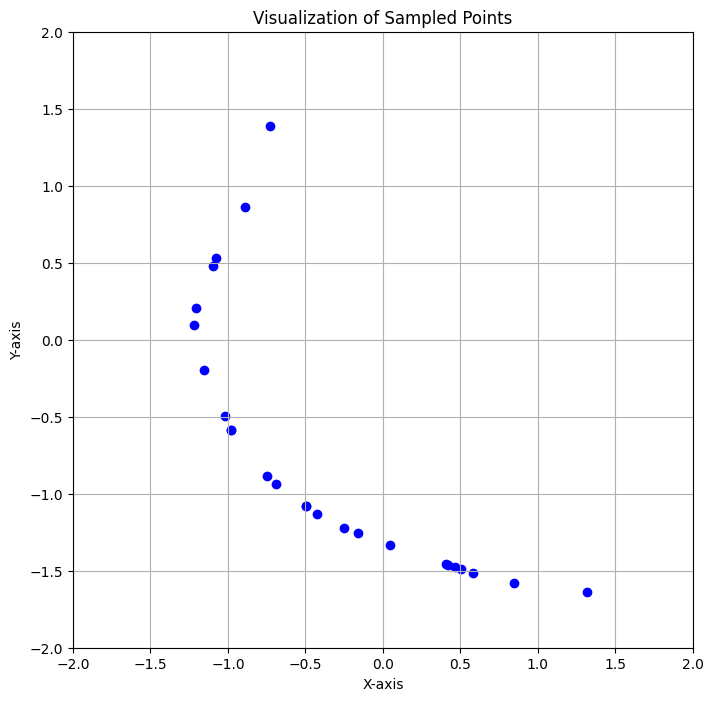

In [127]:
# Assuming collected_points is a tensor of shape (n_points, 2) where n_points >= 1000
x_coords = collected_points[:, 0].numpy()  # Extract x-coordinates
y_coords = collected_points[:, 1].numpy()  # Extract y-coordinates

plt.figure(figsize=(8, 8))  # Set the figure size for better visibility
plt.scatter(x_coords, y_coords, color='blue', label='Converged Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.title('Visualization of Sampled Points')
plt.grid(True)
plt.show()

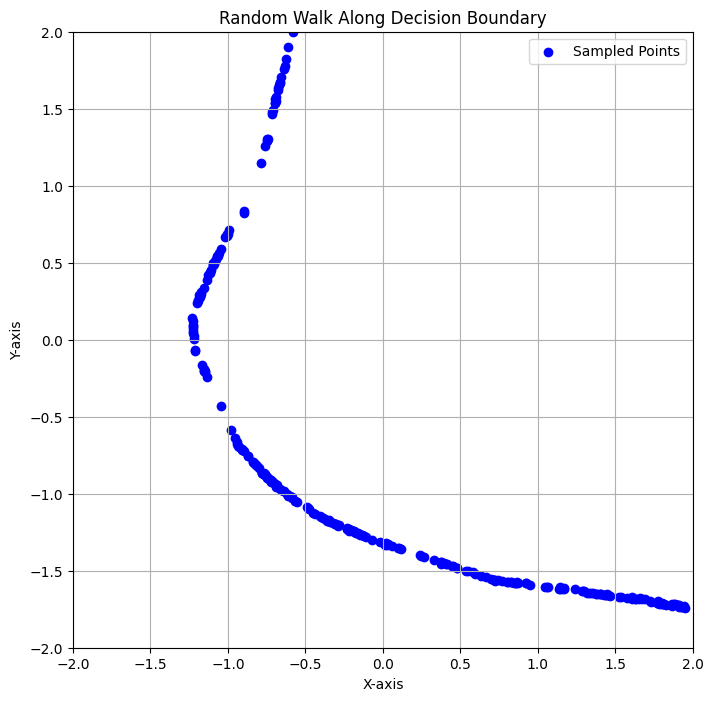

In [157]:
def remove_component_along_direction(a, b):
    projection = (torch.dot(a, b) / torch.dot(b, b)) * b
    return a - projection

def compute_input_gradient(net, input_point):
    input_point = input_point.clone().detach().requires_grad_(True)
    output = net(input_point.unsqueeze(0))
    output.backward()
    gradient = input_point.grad
    return gradient

def random_walk_along_boundary(net, input_tensor, k, learning_rate=0.001, threshold=0.01):
    all_sampled_points = []
    
    for x in input_tensor:
        current_point = x.clone().detach()
        points_collected = [current_point]
        
        while len(points_collected) < k + 1:  # +1 because we start with the initial point
            # Generate random perturbation
            perturbation = torch.randn(2)
            step_size = torch.rand(1).item() * 2
            perturbation = step_size * (perturbation / torch.norm(perturbation))
            
            # Compute gradient vector of f with respect to x
            gradient = compute_input_gradient(net, current_point)
            
            # Compute actual perturbation
            actual_perturbation = remove_component_along_direction(perturbation, gradient)
            
            # Update point to y
            y = current_point + actual_perturbation
            
            #Perform gradient descent to bring y close to decision boundary
            #y = y.clone().detach().requires_grad_(True)
            #optimizer = optim.SGD([y], lr=learning_rate)
            
            #while True:
                #optimizer.zero_grad()
                #output = net(y.unsqueeze(0))
                #loss = torch.abs(output)
                #loss.backward()
                #optimizer.step()
                
                #if loss.item() < threshold:
                    #break
            
            #y = y.clone().detach()
            
            # Check if the point is within the range [-2, 2] x [-2, 2]
            if -2 <= y[0].item() <= 2 and -2 <= y[1].item() <= 2 and -0.5 <= net(y.unsqueeze(0)).item() <= 0.5:
                current_point = y
                points_collected.append(current_point)
            else:
                current_point = x.clone().detach()
        
        all_sampled_points.extend(points_collected)
    
    return torch.stack(all_sampled_points)

# Example usage
# Assuming net is your trained neural network and input_tensor is a tensor of 2D points
input_tensor = collected_points  # Example input tensor
sampled_points = random_walk_along_boundary(net_hinge_square, input_tensor, k=10)

# Visualize the sampled points
x_coords = sampled_points[:, 0].numpy()
y_coords = sampled_points[:, 1].numpy()

plt.figure(figsize=(8, 8))
plt.scatter(x_coords, y_coords, color='blue', label='Sampled Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.title('Random Walk Along Decision Boundary')
plt.grid(True)
plt.legend()
plt.show()

In [48]:
#def random_walk_on_boundary(start_point, system, iterations=9):
    #points_collected = []
    #current_point = start_point
    #for i in range(iterations):
        #new_points = [] 
        #for input_point in current_point:
            #perturbation = system(input_point)
            #coefficient = torch.rand(1).item() / 8
            #perturbation = perturbation * coefficient
            #updated_point = input_point + perturbation
            #new_points.append(updated_point)
        
        #current_point = torch.stack(new_points)
        #points_collected.extend(current_point)  
    #final_points_tensor = torch.stack(points_collected)
    #return final_points_tensor

# Example usage
#collected_data = random_walk_on_boundary(collected_points, dynamical_system_vector, iterations=10)

# Assuming collected_points is a tensor of shape (n_points, 2)
#x_coords = collected_data[:, 0].numpy()  # Extract x-coordinates
#y_coords = collected_data[:, 1].numpy()  # Extract y-coordinates

#plt.figure(figsize=(8, 8))  # Set the figure size for better visibility
#plt.scatter(x_coords, y_coords, color='blue', label='Converged Points')
#plt.xlabel('X-axis')
#plt.ylabel('Y-axis')
#plt.title('Visualization of Sampled Points')
#plt.grid(True)
#plt.show()


## Active learning

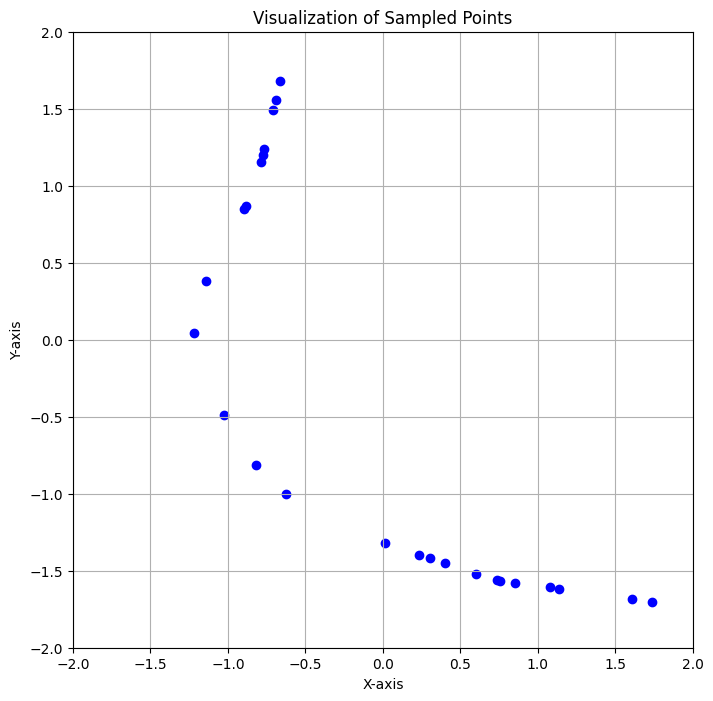

In [158]:
collected_points = collect_converged_points_without_noise(net_hinge_square, target_count=25)
# Assuming collected_points is a tensor of shape (n_points, 2) where n_points >= 1000
x_coords = collected_points[:, 0].numpy()  # Extract x-coordinates
y_coords = collected_points[:, 1].numpy()  # Extract y-coordinates

plt.figure(figsize=(8, 8))  # Set the figure size for better visibility
plt.scatter(x_coords, y_coords, color='blue', label='Converged Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.title('Visualization of Sampled Points')
plt.grid(True)
plt.show()

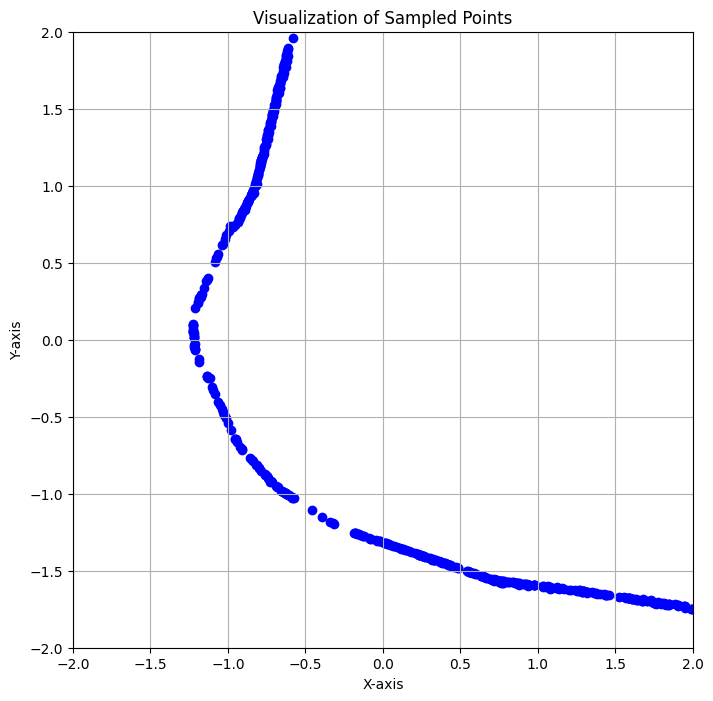

In [159]:
# Example usage
collected_data = random_walk_along_boundary(net_hinge_square, collected_points, k=20)

# Assuming collected_points is a tensor of shape (n_points, 2)
x_coords = collected_data[:, 0].numpy()  # Extract x-coordinates
y_coords = collected_data[:, 1].numpy()  # Extract y-coordinates

plt.figure(figsize=(8, 8))  # Set the figure size for better visibility
plt.scatter(x_coords, y_coords, color='blue', label='Converged Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.title('Visualization of Sampled Points')
plt.grid(True)
plt.show()


In [51]:
def update_data(dataset_train, collected_points):
    x0 = collected_points[:, 0].flatten()
    y0 = collected_points[:, 1].flatten()
    labels = [0 for i in range(len(x0))]
    data = {'x0': x0, 'y0': y0, 'attracted': labels}
    df_new = pd.DataFrame(data)
    dataset_train.data = pd.concat([dataset_train.data, df_new], ignore_index=True)
    return dataset_train

dataset_train_copy = deepcopy(dataset_train)

updated_dataset_train = update_data(dataset_train_copy, collected_data)
check = updated_dataset_train.data


In [52]:
class QuadraticHingeLossAdaptive(nn.Module):
    def __init__(self):
        super(QuadraticHingeLossAdaptive, self).__init__()

    def forward(self, y_pred, y_true):
        loss = nn.functional.relu(1-y_true * y_pred) ** 2
        y_true = torch.abs(y_true)
        loss = loss * y_true
        if y_true.sum() == 0:
            return torch.tensor(0.0)
        mean_loss = loss.sum() / y_true.sum()
        return mean_loss

In [53]:
def train_model_dynamical_adaptive_sub(net, dataset_train, dataset_validation1, dataset_validation001, dataset_validation002,
                        dataset_validation003, dataset_validation004, 
                        dataset_validation005, dataset_validation010, batchsize, epochs, lr):
    criterion_sqhinge = QuadraticHingeLossAdaptive()
    #criterion_sqhinge = nn.BCEWithLogitsLoss()
    optimizer = Lion(net.parameters(), lr=lr)
    dataloader_train = DataLoader(dataset_train, batch_size=batchsize, shuffle=True)
    dataloader_validation1 = DataLoader(dataset_validation1, batch_size=batchsize, shuffle=False)
    dataloader_validation001 = DataLoader(dataset_validation001, batch_size=batchsize, shuffle=False)
    dataloader_validation002 = DataLoader(dataset_validation002, batch_size=batchsize, shuffle=False)
    dataloader_validation003 = DataLoader(dataset_validation003, batch_size=batchsize, shuffle=False)
    dataloader_validation004 = DataLoader(dataset_validation004, batch_size=batchsize, shuffle=False)
    dataloader_validation005 = DataLoader(dataset_validation005, batch_size=batchsize, shuffle=False)
    dataloader_validation010 = DataLoader(dataset_validation010, batch_size=batchsize, shuffle=False)
    
    training_accuracy_over_epochs = []
    validation1_accuracy_over_epochs = []
    validation001_accuracy_over_epochs = []
    validation002_accuracy_over_epochs = []
    validation003_accuracy_over_epochs = []
    validation004_accuracy_over_epochs = []
    validation005_accuracy_over_epochs = []
    validation010_accuracy_over_epochs = []
    training_loss_dynamical_over_epochs = []
    validation1_loss_dynamical_over_epochs = []
    validation001_loss_dynamical_over_epochs = []
    validation002_loss_dynamical_over_epochs = []
    validation003_loss_dynamical_over_epochs = []
    validation004_loss_dynamical_over_epochs = []
    validation005_loss_dynamical_over_epochs = []
    validation010_loss_dynamical_over_epochs = []
    training_loss_hinge_over_epochs = []
    validation1_loss_hinge_over_epochs = []
    validation001_loss_hinge_over_epochs = []
    validation002_loss_hinge_over_epochs = []
    validation003_loss_hinge_over_epochs = []
    validation004_loss_hinge_over_epochs = []
    validation005_loss_hinge_over_epochs = []
    validation010_loss_hinge_over_epochs = []
    
    overall_progress = tqdm(total=epochs, desc='Overall Training Progress')
    
    for epoch in range(epochs):
        net.train()
        correct_train = 0
        total_train = 0
        avg_loss_train_dynamical = 0
        avg_loss_train_hinge = 0
        for features, labels in dataloader_train:
            #labels = ((labels + 1) / 2).float()
            features.requires_grad = True
            labels = labels.view(-1)
            optimizer.zero_grad()
            outputs = net(features).view(-1)
            predicted = ((outputs > 0).float() * 2) - 1 ##scale to -1, 1
            #predicted = (outputs > 0).float()
            labels_nonzero_mask = (labels != 0)
            labels_nonzero = labels[labels_nonzero_mask]
            predicted_nonzero = predicted[labels_nonzero_mask]
            correct_train += (predicted_nonzero == labels_nonzero).sum().item()
            total_train += labels_nonzero.size(0)
            loss_dynamic = custom_loss_function(net, features)
            loss_hinge =  criterion_sqhinge(outputs, labels)
            loss = 0.01*loss_dynamic + 10*loss_hinge # C=constant
            avg_loss_train_dynamical += loss_dynamic.item()
            avg_loss_train_hinge += loss_hinge.item()
            loss.backward()
            optimizer.step()
    
                    
        training_accuracy = correct_train / total_train
        training_loss_dynamical = avg_loss_train_dynamical / len(dataloader_train)
        training_loss_hinge = avg_loss_train_hinge / len(dataloader_train)
        training_accuracy_over_epochs.append(training_accuracy)
        training_loss_dynamical_over_epochs.append(training_loss_dynamical)
        training_loss_hinge_over_epochs.append(training_loss_hinge)


        net.eval()
        correct_validation1 = 0
        total_validation1 = 0
        avg_loss_validation1_dynamical = 0
        avg_loss_validation1_hinge = 0
        for features, labels in dataloader_validation1:
            #labels = ((labels + 1) / 2).float()
            features.requires_grad = True
            labels = labels.view(-1)
            outputs = net(features).view(-1)
            predicted = ((outputs > 0).float() * 2) - 1
            #predicted = (outputs > 0).float()
            correct_validation1 += (predicted == labels).sum().item()
            total_validation1 += labels.size(0)
            loss_dynamic = custom_loss_function(net, features)
            loss_hinge =  criterion_sqhinge(outputs, labels)
            #loss = loss_dynamic + loss_hinge
            avg_loss_validation1_dynamical += loss_dynamic.item()
            avg_loss_validation1_hinge += loss_hinge.item()
        
        validation1_accuracy = correct_validation1 / total_validation1
        validation1_accuracy_over_epochs.append(validation1_accuracy)
        validation1_loss_dynamical = avg_loss_validation1_dynamical / len(dataloader_validation1)
        validation1_loss_dynamical_over_epochs.append(validation1_loss_dynamical)
        validation1_loss_hinge = avg_loss_validation1_hinge / len(dataloader_validation1)
        validation1_loss_hinge_over_epochs.append(validation1_loss_hinge)

        correct_validation001 = 0
        total_validation001 = 0
        avg_loss_validation001_dynamical = 0
        avg_loss_validation001_hinge = 0
        for features, labels in dataloader_validation001:
            #labels = ((labels + 1) / 2).float()
            features.requires_grad = True
            labels = labels.view(-1)
            outputs = net(features).view(-1)
            predicted = ((outputs > 0).float() * 2) - 1
            #predicted = (outputs > 0).float()
            correct_validation001 += (predicted == labels).sum().item()
            total_validation001 += labels.size(0)
            loss_dynamic = custom_loss_function(net, features)
            loss_hinge =  criterion_sqhinge(outputs, labels)
            avg_loss_validation001_dynamical += loss_dynamic.item()
            avg_loss_validation001_hinge += loss_hinge.item()
        
        validation001_accuracy = correct_validation001 / total_validation001
        validation001_accuracy_over_epochs.append(validation001_accuracy)
        validation001_loss_dynamical = avg_loss_validation001_dynamical / len(dataloader_validation001)
        validation001_loss_dynamical_over_epochs.append(validation001_loss_dynamical)
        validation001_loss_hinge = avg_loss_validation001_hinge / len(dataloader_validation001)
        validation001_loss_hinge_over_epochs.append(validation001_loss_hinge)

        correct_validation002 = 0
        total_validation002 = 0
        avg_loss_validation002_dynamical = 0
        avg_loss_validation002_hinge = 0
        for features, labels in dataloader_validation002:
            #labels = ((labels + 1) / 2).float()
            features.requires_grad = True
            labels = labels.view(-1)
            outputs = net(features).view(-1)
            predicted = ((outputs > 0).float() * 2) - 1
            #predicted = (outputs > 0).float()
            correct_validation002 += (predicted == labels).sum().item()
            total_validation002 += labels.size(0)
            loss_dynamic = custom_loss_function(net, features)
            loss_hinge =  criterion_sqhinge(outputs, labels)
            avg_loss_validation002_dynamical += loss_dynamic.item()
            avg_loss_validation002_hinge += loss_hinge.item()
        
        validation002_accuracy = correct_validation002 / total_validation002
        validation002_accuracy_over_epochs.append(validation002_accuracy)
        validation002_loss_dynamical = avg_loss_validation002_dynamical / len(dataloader_validation002)
        validation002_loss_dynamical_over_epochs.append(validation002_loss_dynamical)
        validation002_loss_hinge = avg_loss_validation002_hinge / len(dataloader_validation002)
        validation002_loss_hinge_over_epochs.append(validation002_loss_hinge)

        correct_validation003 = 0
        total_validation003 = 0
        avg_loss_validation003_dynamical = 0
        avg_loss_validation003_hinge = 0
        for features, labels in dataloader_validation003:
            #labels = ((labels + 1) / 2).float()
            features.requires_grad = True
            labels = labels.view(-1)
            outputs = net(features).view(-1)
            predicted = ((outputs > 0).float() * 2) - 1
            #predicted = (outputs > 0).float()
            correct_validation003 += (predicted == labels).sum().item()
            total_validation003 += labels.size(0)
            loss_dynamic = custom_loss_function(net, features)
            loss_hinge =  criterion_sqhinge(outputs, labels)
            avg_loss_validation003_dynamical += loss_dynamic.item()
            avg_loss_validation003_hinge += loss_hinge.item()
        
        validation003_accuracy = correct_validation003 / total_validation003
        validation003_accuracy_over_epochs.append(validation003_accuracy)
        validation003_loss_dynamical = avg_loss_validation003_dynamical / len(dataloader_validation003)
        validation003_loss_dynamical_over_epochs.append(validation003_loss_dynamical)
        validation003_loss_hinge = avg_loss_validation003_hinge / len(dataloader_validation003)
        validation003_loss_hinge_over_epochs.append(validation003_loss_hinge)

        correct_validation004 = 0
        total_validation004 = 0
        avg_loss_validation004_dynamical = 0
        avg_loss_validation004_hinge = 0
        for features, labels in dataloader_validation004:
            #labels = ((labels + 1) / 2).float()
            features.requires_grad = True
            labels = labels.view(-1)
            outputs = net(features).view(-1)
            predicted = ((outputs > 0).float() * 2) - 1
            #predicted = (outputs > 0).float()
            correct_validation004 += (predicted == labels).sum().item()
            total_validation004 += labels.size(0)
            loss_dynamic = custom_loss_function(net, features)
            loss_hinge =  criterion_sqhinge(outputs, labels)
            avg_loss_validation004_dynamical += loss_dynamic.item()
            avg_loss_validation004_hinge += loss_hinge.item()
        
        validation004_accuracy = correct_validation004 / total_validation004
        validation004_accuracy_over_epochs.append(validation004_accuracy)
        validation004_loss_dynamical = avg_loss_validation004_dynamical / len(dataloader_validation004)
        validation004_loss_dynamical_over_epochs.append(validation004_loss_dynamical)
        validation004_loss_hinge = avg_loss_validation004_hinge / len(dataloader_validation004)
        validation004_loss_hinge_over_epochs.append(validation004_loss_hinge)

        correct_validation005 = 0
        total_validation005 = 0
        avg_loss_validation005_dynamical = 0
        avg_loss_validation005_hinge = 0
        for features, labels in dataloader_validation005:
            #labels = ((labels + 1) / 2).float()
            features.requires_grad = True
            labels = labels.view(-1)
            outputs = net(features).view(-1)
            predicted = ((outputs > 0).float() * 2) - 1
            #predicted = (outputs > 0).float()
            correct_validation005 += (predicted == labels).sum().item()
            total_validation005 += labels.size(0)
            loss_dynamic = custom_loss_function(net, features)
            loss_hinge =  criterion_sqhinge(outputs, labels)
            avg_loss_validation005_dynamical += loss_dynamic.item()
            avg_loss_validation005_hinge += loss_hinge.item()
        
        validation005_accuracy = correct_validation005 / total_validation005
        validation005_accuracy_over_epochs.append(validation005_accuracy)
        validation005_loss_dynamical = avg_loss_validation005_dynamical / len(dataloader_validation005)
        validation005_loss_dynamical_over_epochs.append(validation005_loss_dynamical)
        validation005_loss_hinge = avg_loss_validation005_hinge / len(dataloader_validation005)
        validation005_loss_hinge_over_epochs.append(validation005_loss_hinge)

        correct_validation010 = 0
        total_validation010 = 0
        avg_loss_validation010_dynamical = 0
        avg_loss_validation010_hinge = 0
        for features, labels in dataloader_validation010:
            #labels = ((labels + 1) / 2).float()
            features.requires_grad = True
            labels = labels.view(-1)
            outputs = net(features).view(-1)
            predicted = ((outputs > 0).float() * 2) - 1
            #predicted = (outputs > 0).float()
            correct_validation010 += (predicted == labels).sum().item()
            total_validation010 += labels.size(0)
            loss_dynamic = custom_loss_function(net, features)
            loss_hinge =  criterion_sqhinge(outputs, labels)
            avg_loss_validation010_dynamical += loss_dynamic.item()
            avg_loss_validation010_hinge += loss_hinge.item()
        
        validation010_accuracy = correct_validation010 / total_validation010
        validation010_accuracy_over_epochs.append(validation010_accuracy)
        validation010_loss_dynamical = avg_loss_validation010_dynamical / len(dataloader_validation010)
        validation010_loss_dynamical_over_epochs.append(validation010_loss_dynamical)
        validation010_loss_hinge = avg_loss_validation010_hinge / len(dataloader_validation010)
        validation010_loss_hinge_over_epochs.append(validation010_loss_hinge)
        
        overall_progress.update(1)
        #overall_progress.set_postfix({'Training Accuracy': training_accuracy, 'Validation1 Accuracy': validation1_accuracy, 'Validation2 Accuracy': validation2_accuracy})
        overall_progress.set_postfix({'Training Accuracy': training_accuracy,
                                        'Validation1 Accuracy': validation1_accuracy,
                                         'Validation001 Accuracy': validation001_accuracy, 
                                         'Validation002 Accuracy': validation002_accuracy, 
                                         'Validation003 Accuracy': validation003_accuracy, 
                                         'Validation004 Accuracy': validation004_accuracy, 
                                         'Validation005 Accuracy': validation005_accuracy, 
                                         'Validation010 Accuracy': validation010_accuracy})
    
    overall_progress.close()
    
    plt.figure(figsize=(10, 6))
    plt.plot(training_accuracy_over_epochs, label='Training')
    plt.plot(validation1_accuracy_over_epochs, label='Uniform')
    plt.plot(validation001_accuracy_over_epochs, label='$\delta$=0.01')
    plt.plot(validation002_accuracy_over_epochs, label='$\delta$=0.02')
    plt.plot(validation003_accuracy_over_epochs, label='$\delta$=0.03')
    plt.plot(validation004_accuracy_over_epochs, label='$\delta$=0.04')
    plt.plot(validation005_accuracy_over_epochs, label='$\delta$=0.05')
    plt.plot(validation010_accuracy_over_epochs, label='$\delta$=0.10')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy Over Epochs')
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(training_loss_dynamical_over_epochs, label='Training')
    plt.plot(validation1_loss_dynamical_over_epochs, label='Uniform')
    plt.plot(validation001_loss_dynamical_over_epochs, label='$\delta$=0.01')
    plt.plot(validation002_loss_dynamical_over_epochs, label='$\delta$=0.02')
    plt.plot(validation003_loss_dynamical_over_epochs, label='$\delta$=0.03')
    plt.plot(validation004_loss_dynamical_over_epochs, label='$\delta$=0.04')
    plt.plot(validation005_loss_dynamical_over_epochs, label='$\delta$=0.05')
    plt.plot(validation010_loss_dynamical_over_epochs, label='$\delta$=0.10')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Dynamical Loss Over Epochs')
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(training_loss_hinge_over_epochs, label='Training')
    plt.plot(validation1_loss_hinge_over_epochs, label='Uniform')
    plt.plot(validation001_loss_hinge_over_epochs, label='$\delta$=0.01')
    plt.plot(validation002_loss_hinge_over_epochs, label='$\delta$=0.02')
    plt.plot(validation003_loss_hinge_over_epochs, label='$\delta$=0.03')
    plt.plot(validation004_loss_hinge_over_epochs, label='$\delta$=0.04')
    plt.plot(validation005_loss_hinge_over_epochs, label='$\delta$=0.05')
    plt.plot(validation010_loss_hinge_over_epochs, label='$\delta$=0.10')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Square Hinge Loss Over Epochs')
    plt.legend()
    plt.show()
    
    #test_model(net, dataset_train)
    test_model(net, dataset_validation1)
    test_model(net, dataset_validation001)
    test_model(net, dataset_validation002)
    test_model(net, dataset_validation003)
    test_model(net, dataset_validation004)
    test_model(net, dataset_validation005)
    test_model(net, dataset_validation010)

    plot_contour(net)
    

In [148]:
def train_model_dynamical_adaptive(net, dataset_train, dataset_validation1, dataset_validation001, dataset_validation002,
                        dataset_validation003, dataset_validation004, 
                        dataset_validation005, dataset_validation010, batchsize=64, epochs=1000, lr=0.0001, iterations=20):
    C = 1
    for i in range(iterations):
        print(f"Iteration {i+1}")
        collected_points = collect_converged_points_without_noise(net, target_count=25)
        collected_data = random_walk_along_boundary(net, collected_points, k=5)
        dataset_train = update_data(dataset_train, collected_data)
        train_model_dynamical_adaptive_sub(net, dataset_train, dataset_validation1, dataset_validation001, dataset_validation002,
                        dataset_validation003, dataset_validation004, 
                        dataset_validation005, dataset_validation010, batchsize=len(dataset_train), epochs=epochs, lr=C*lr)
        #C = C * 0.6
    

Iteration 1


Overall Training Progress: 100%|██████████| 50/50 [01:09<00:00,  1.39s/it, Training Accuracy=1, Validation1 Accuracy=0.985, Validation001 Accuracy=0.536, Validation002 Accuracy=0.531, Validation003 Accuracy=0.551, Validation004 Accuracy=0.584, Validation005 Accuracy=0.562, Validation010 Accuracy=0.647]


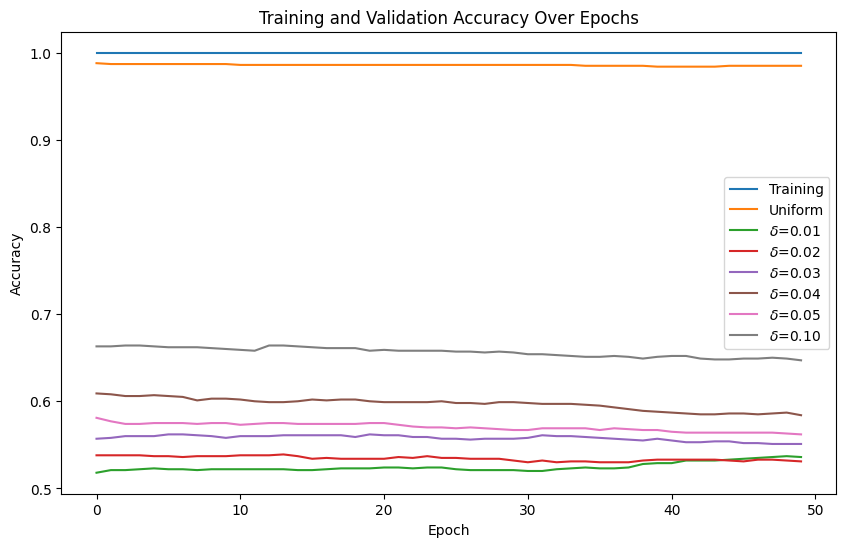

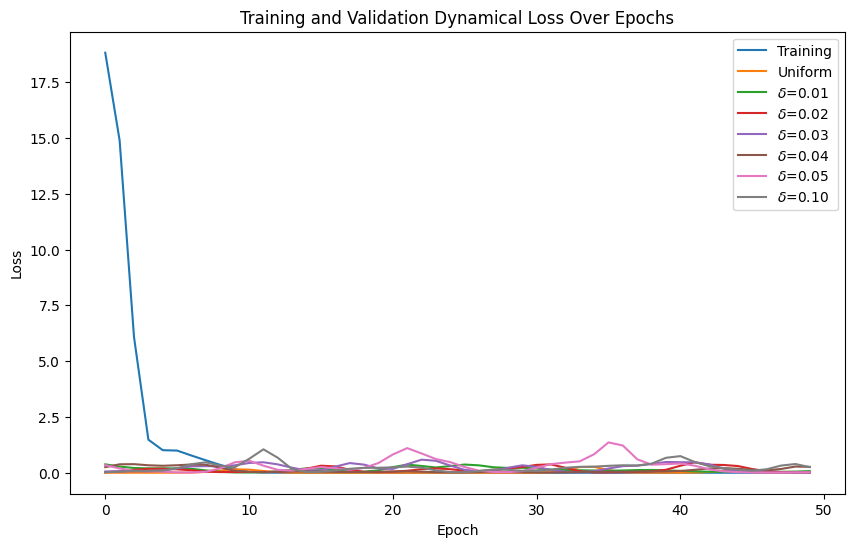

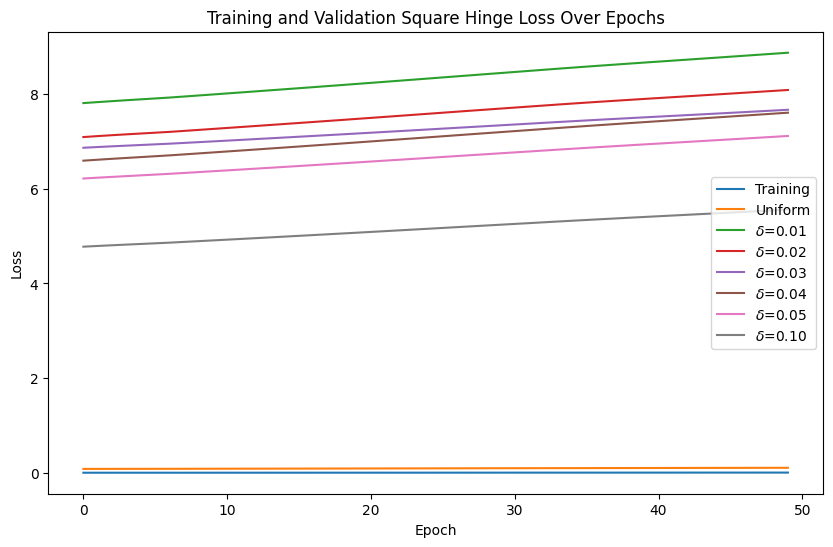

Accuracy: 0.9850000143051147


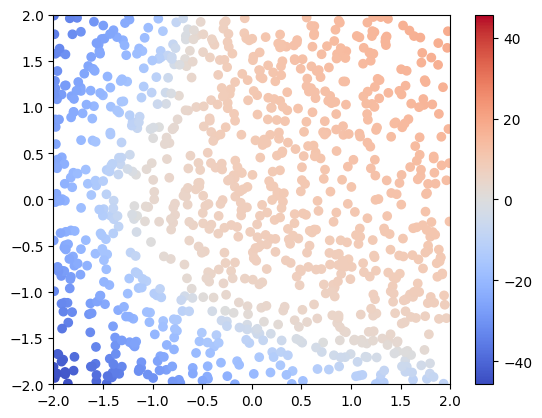

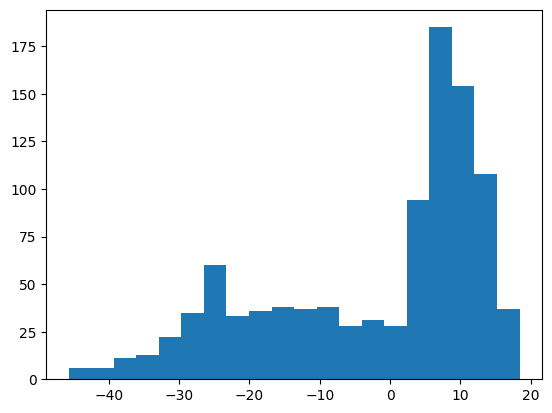

Accuracy: 0.5360000133514404


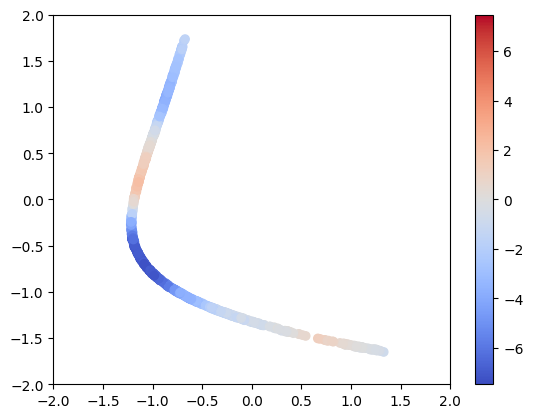

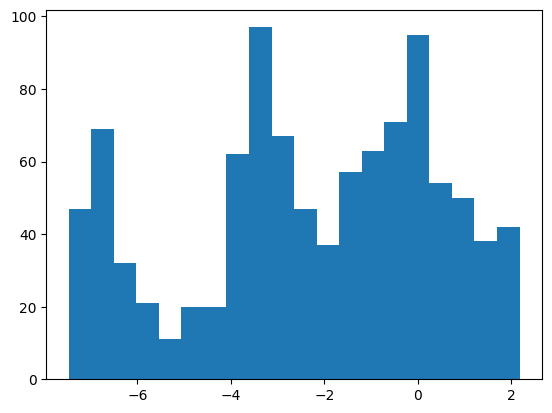

Accuracy: 0.531000018119812


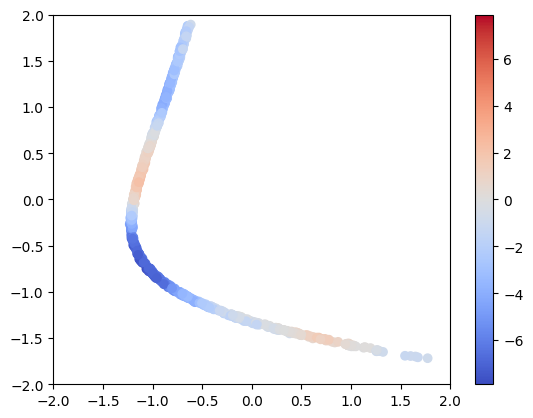

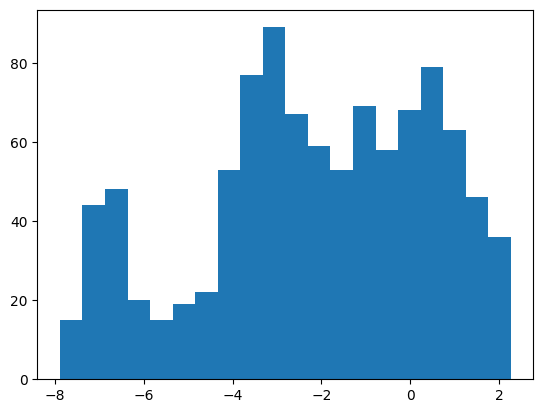

Accuracy: 0.5509999990463257


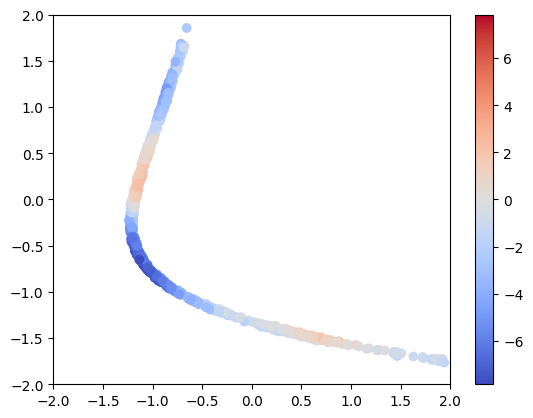

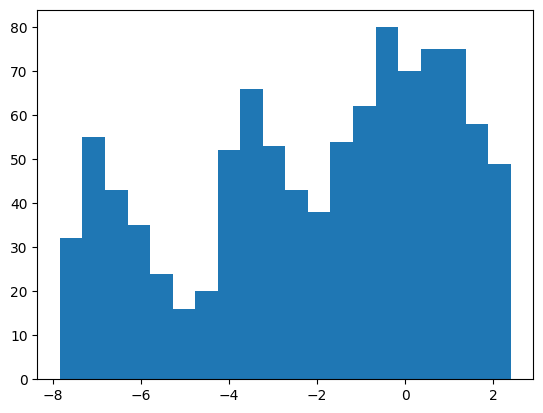

Accuracy: 0.5839999914169312


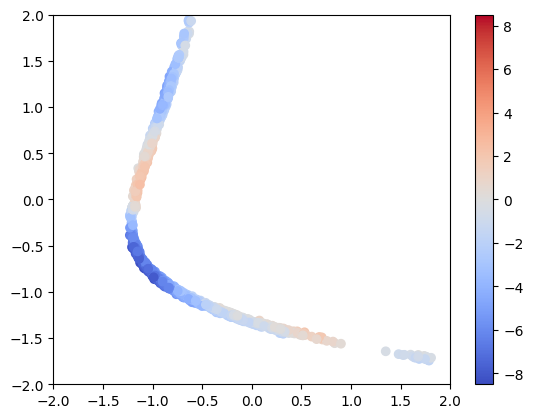

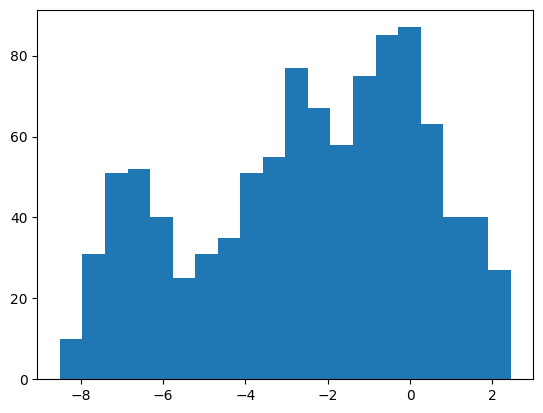

Accuracy: 0.5619999766349792


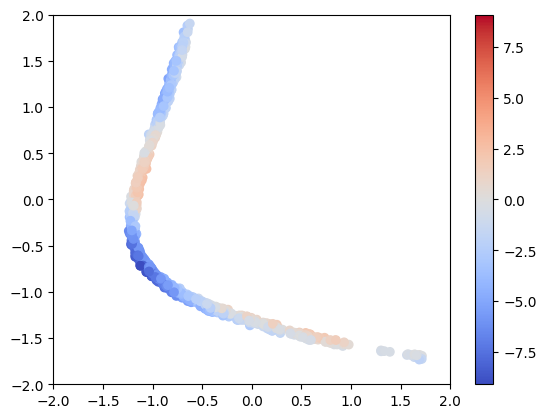

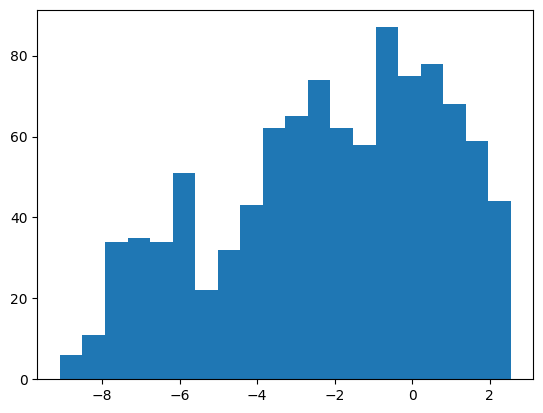

Accuracy: 0.6470000147819519


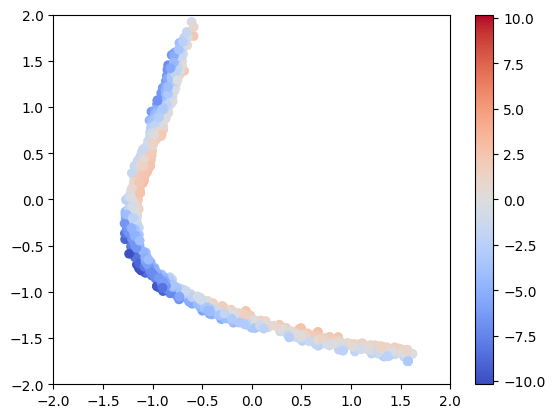

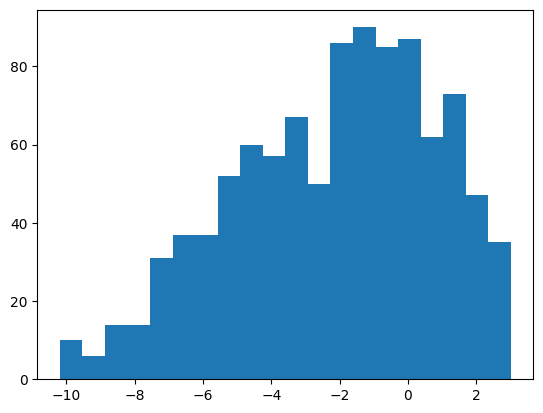

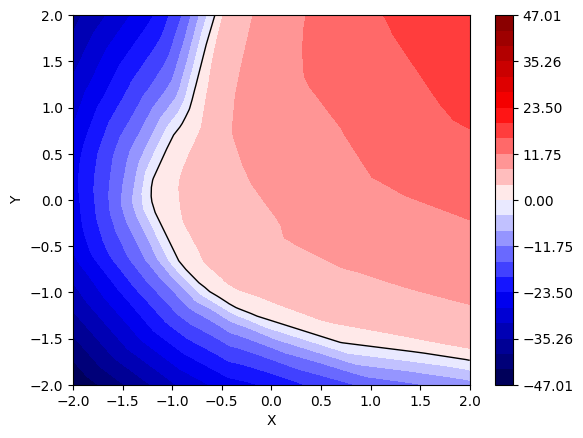

Iteration 2


Overall Training Progress: 100%|██████████| 50/50 [01:11<00:00,  1.44s/it, Training Accuracy=0.995, Validation1 Accuracy=0.984, Validation001 Accuracy=0.536, Validation002 Accuracy=0.531, Validation003 Accuracy=0.559, Validation004 Accuracy=0.574, Validation005 Accuracy=0.563, Validation010 Accuracy=0.65] 


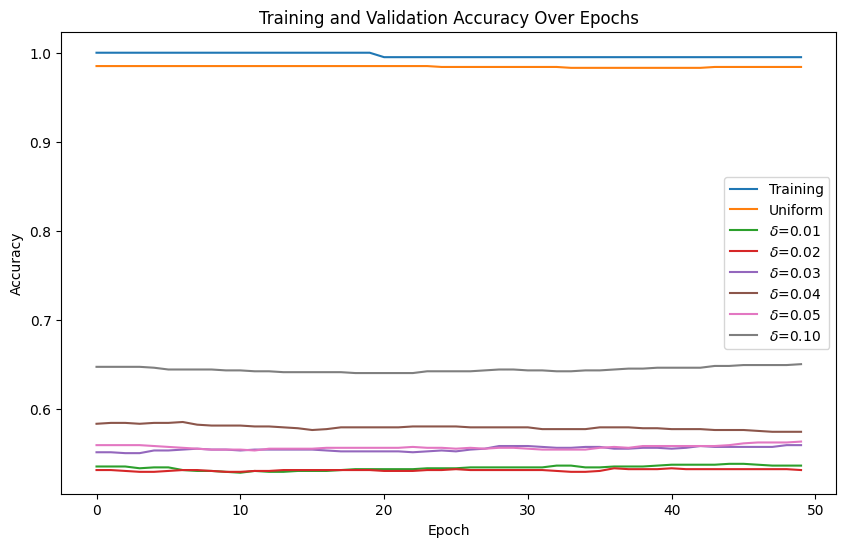

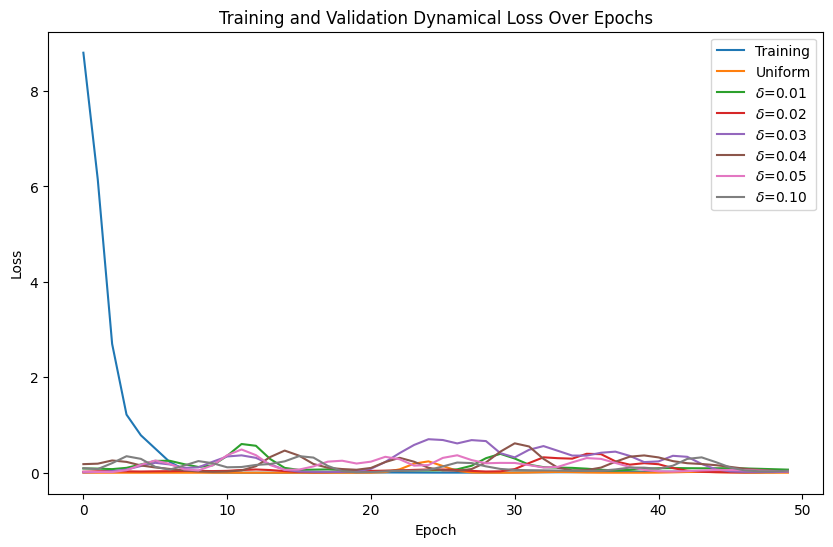

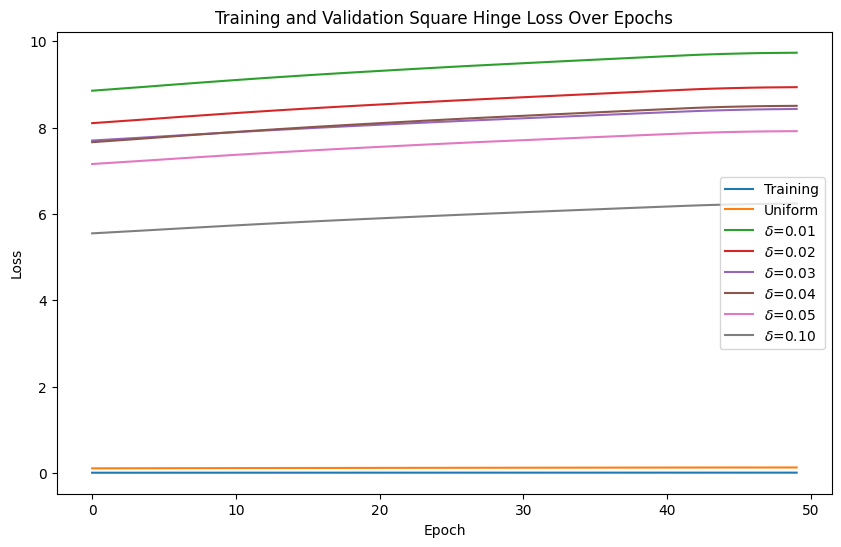

Accuracy: 0.984000027179718


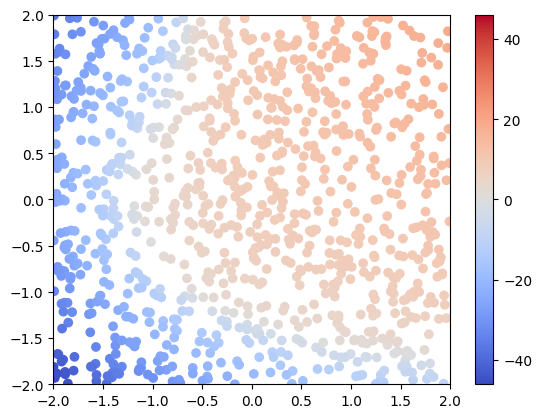

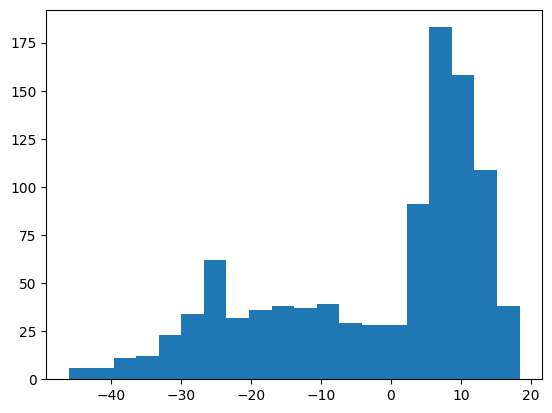

Accuracy: 0.5360000133514404


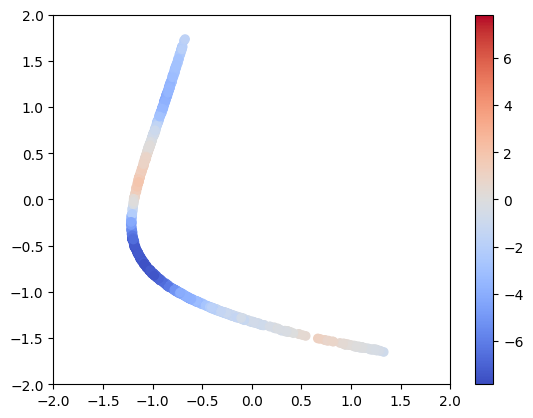

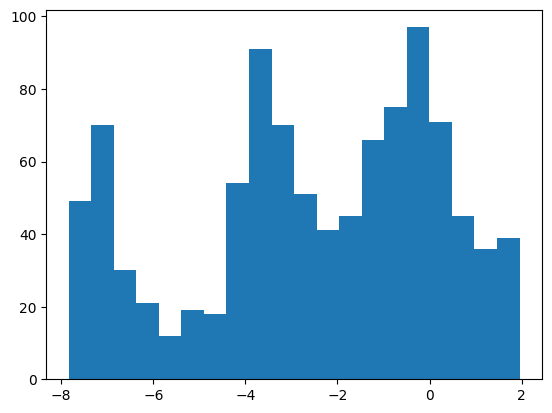

Accuracy: 0.531000018119812


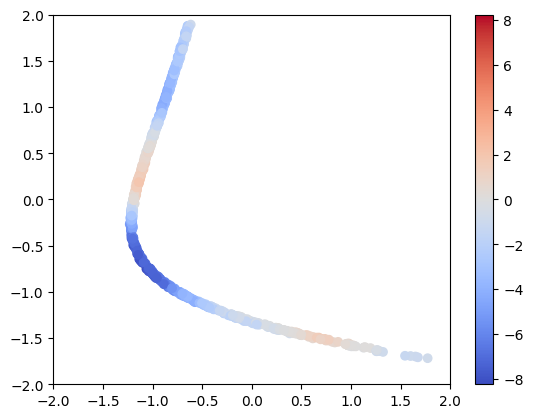

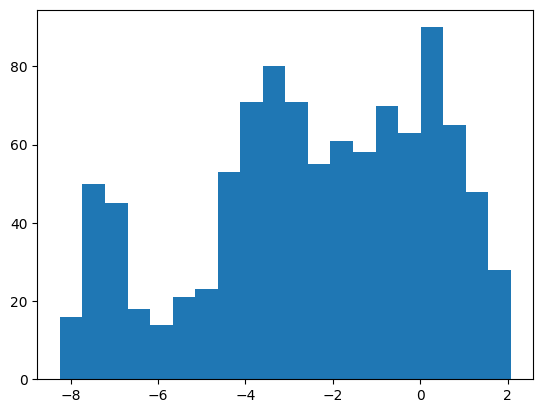

Accuracy: 0.5590000152587891


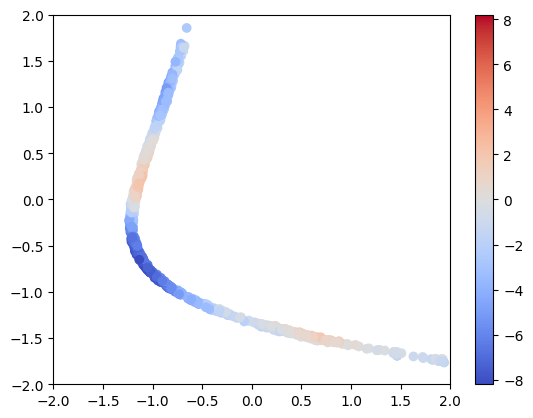

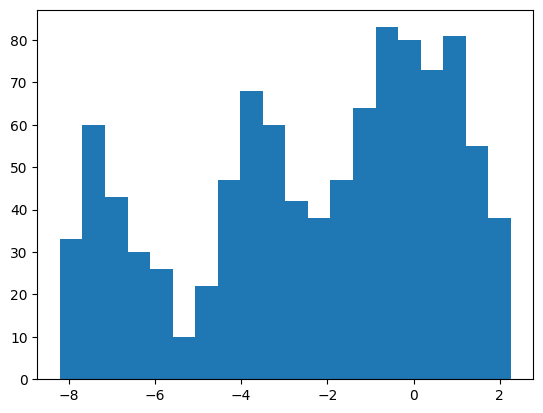

Accuracy: 0.5740000009536743


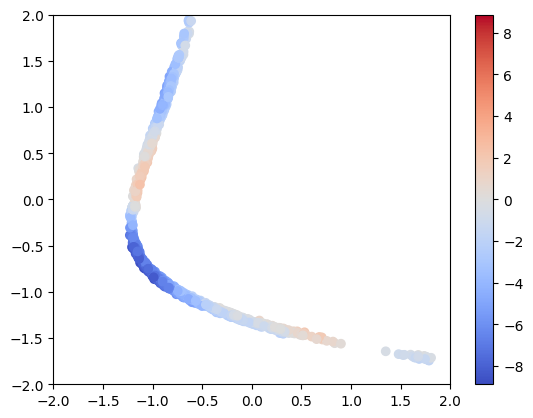

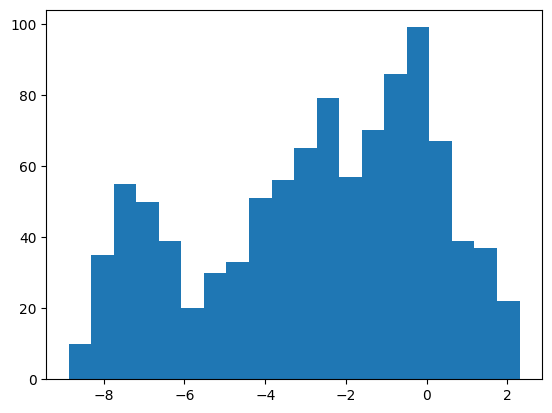

Accuracy: 0.5630000233650208


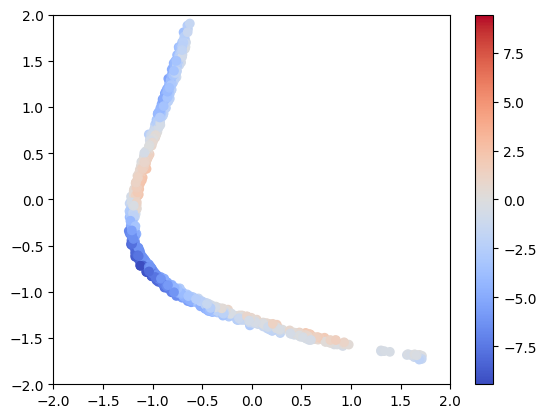

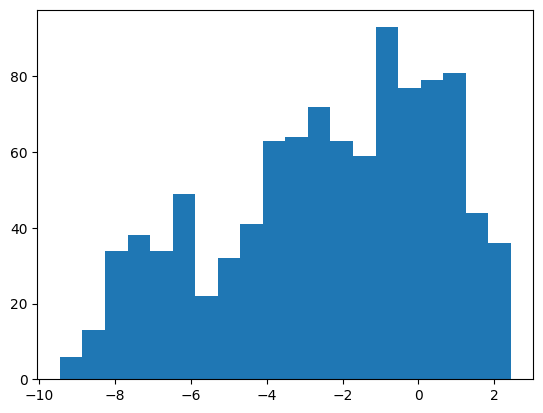

Accuracy: 0.6499999761581421


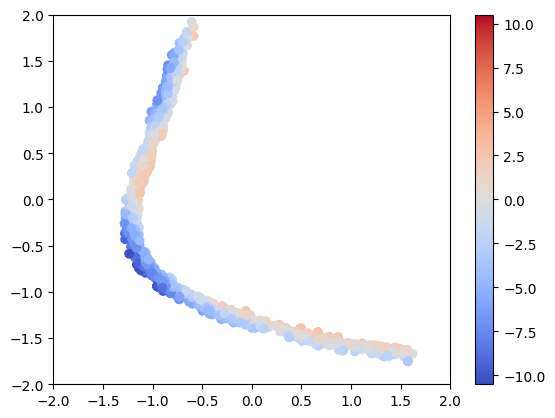

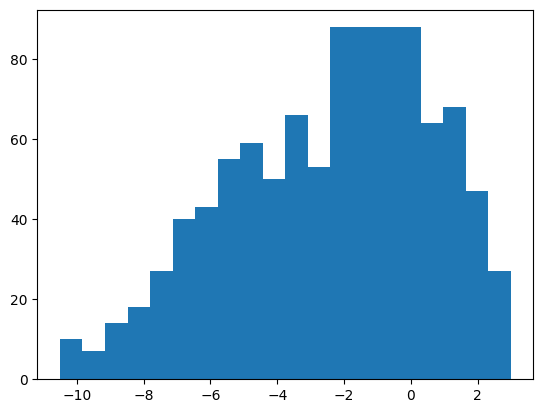

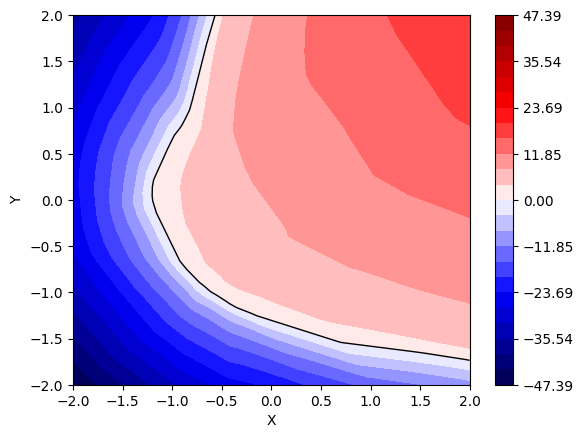

Iteration 3


Overall Training Progress: 100%|██████████| 50/50 [01:15<00:00,  1.51s/it, Training Accuracy=1, Validation1 Accuracy=0.985, Validation001 Accuracy=0.535, Validation002 Accuracy=0.53, Validation003 Accuracy=0.553, Validation004 Accuracy=0.587, Validation005 Accuracy=0.558, Validation010 Accuracy=0.649]   


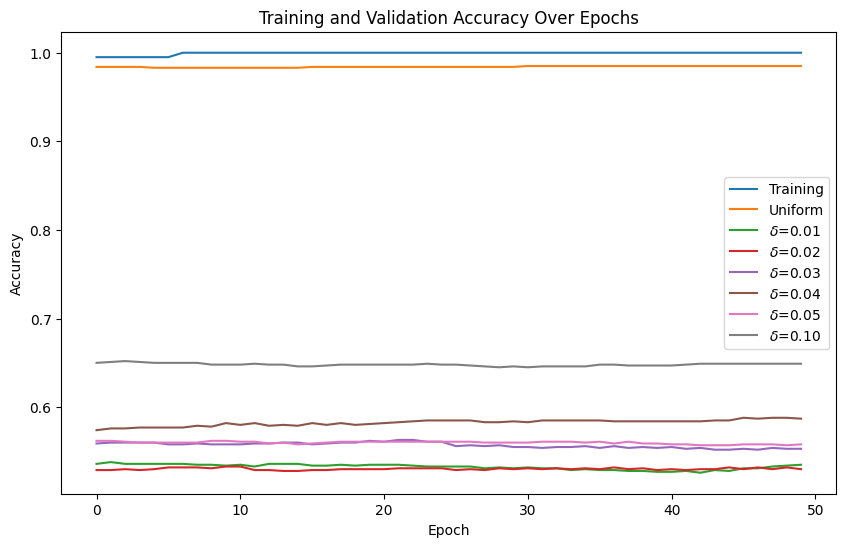

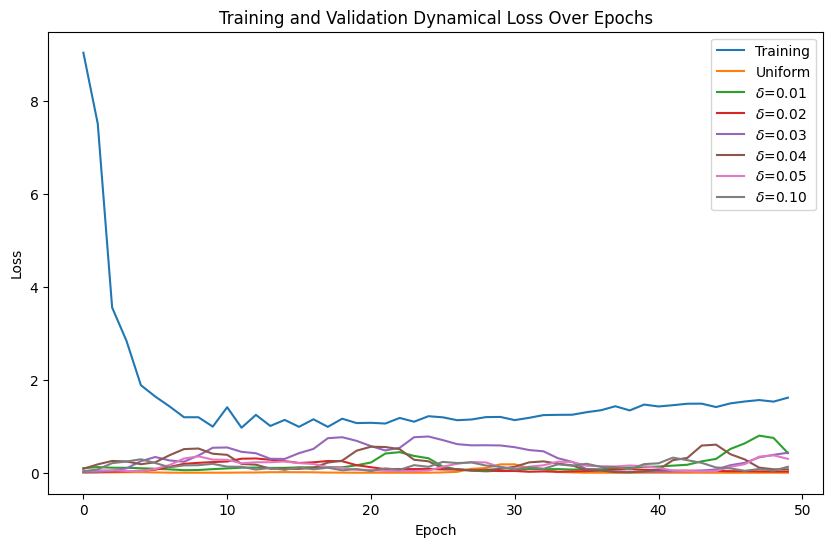

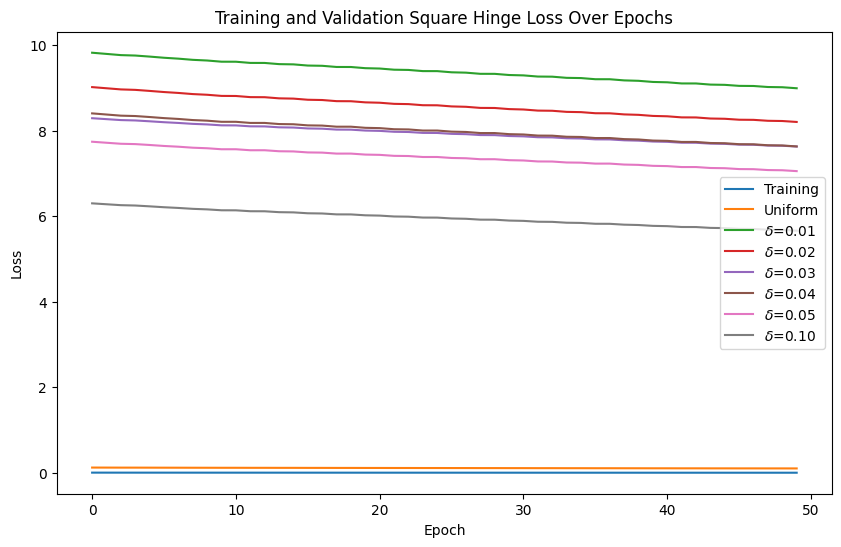

Accuracy: 0.9850000143051147


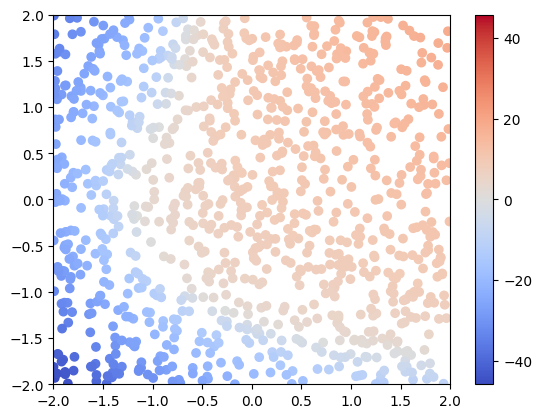

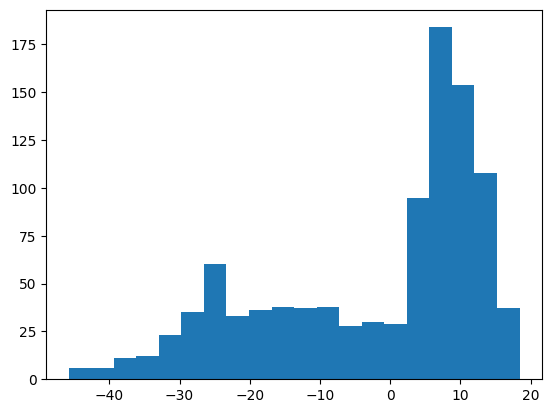

Accuracy: 0.5350000262260437


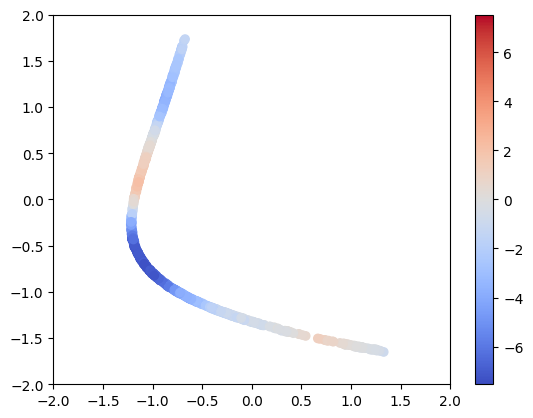

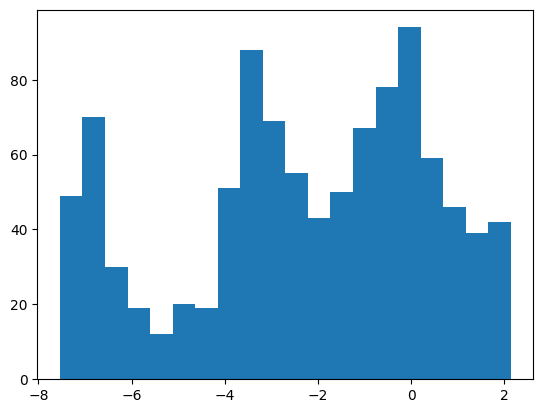

Accuracy: 0.5299999713897705


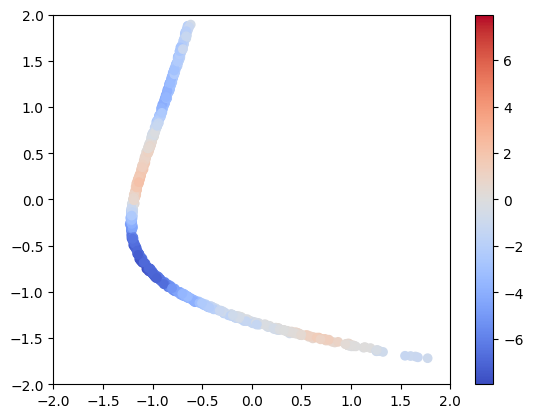

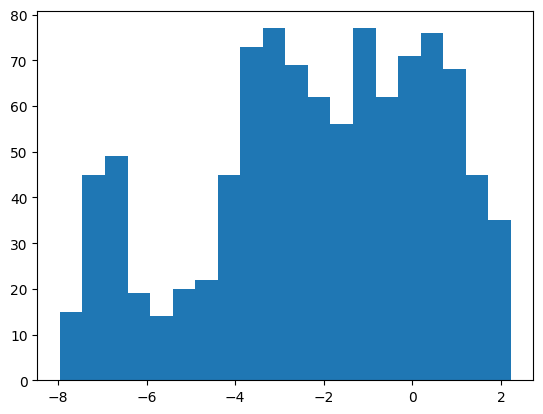

Accuracy: 0.5529999732971191


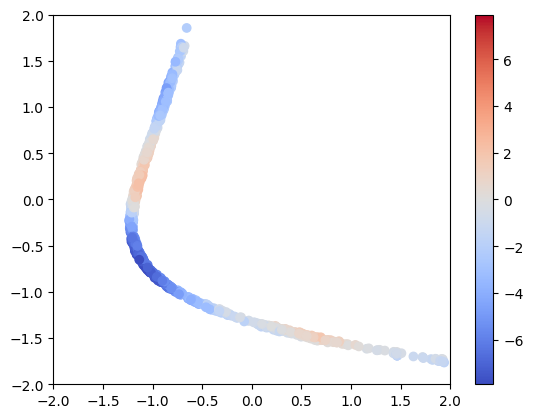

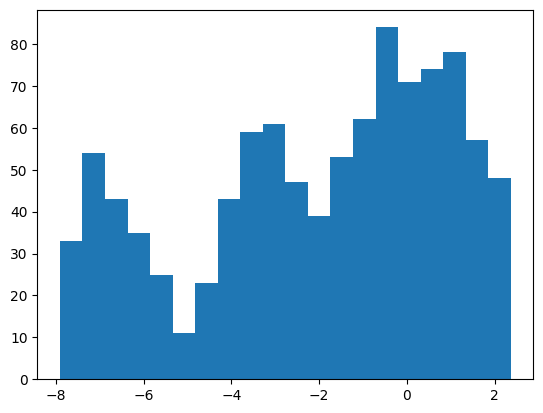

Accuracy: 0.5870000123977661


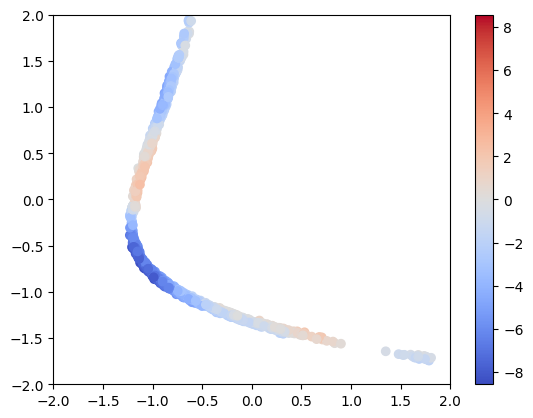

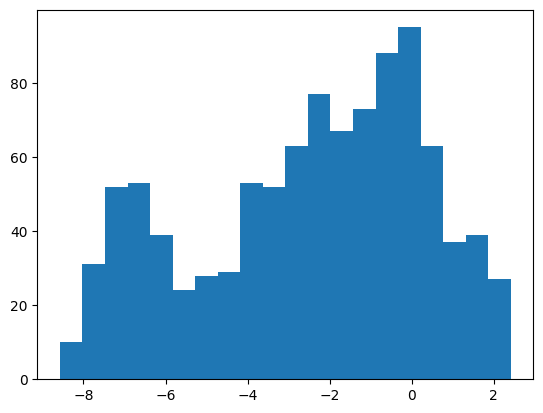

Accuracy: 0.5580000281333923


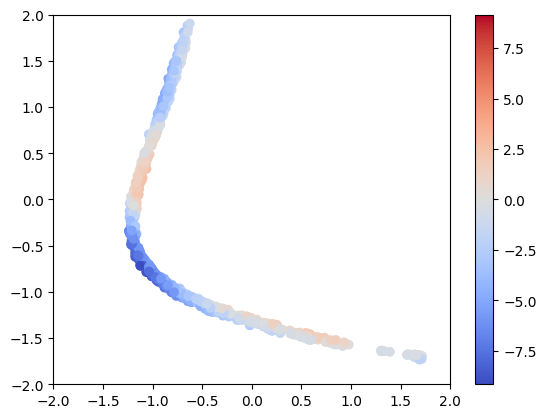

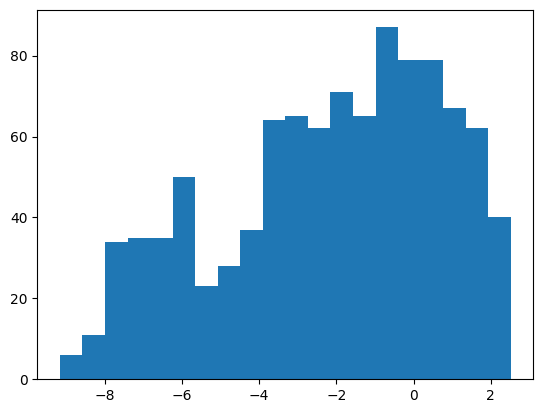

Accuracy: 0.6489999890327454


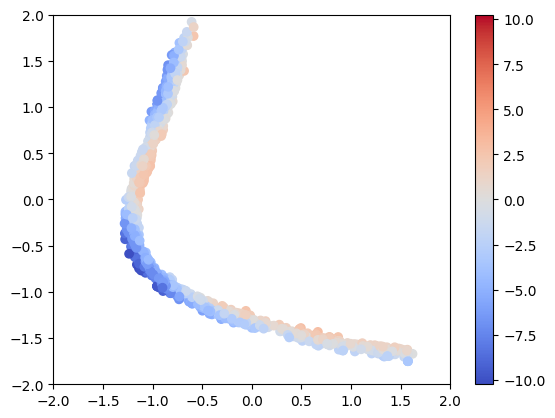

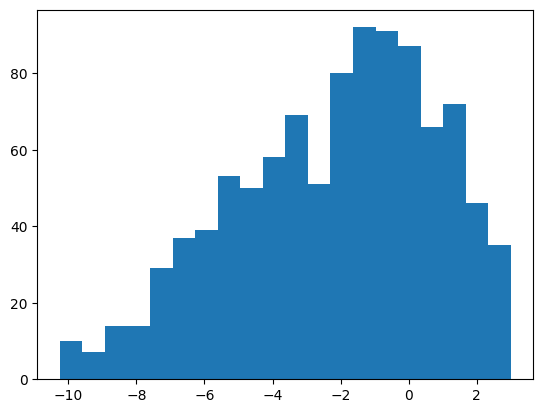

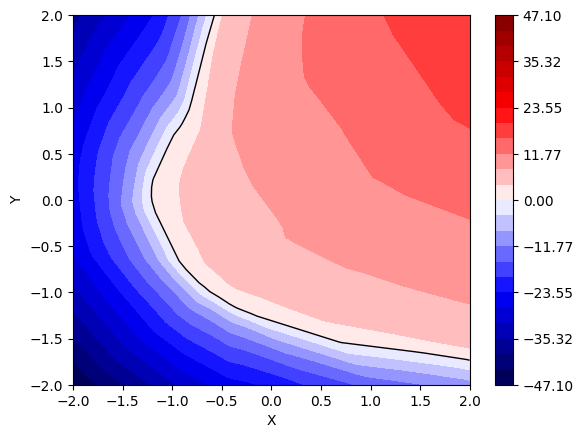

Iteration 4


Overall Training Progress: 100%|██████████| 50/50 [01:19<00:00,  1.59s/it, Training Accuracy=1, Validation1 Accuracy=0.982, Validation001 Accuracy=0.532, Validation002 Accuracy=0.532, Validation003 Accuracy=0.56, Validation004 Accuracy=0.577, Validation005 Accuracy=0.562, Validation010 Accuracy=0.643]     


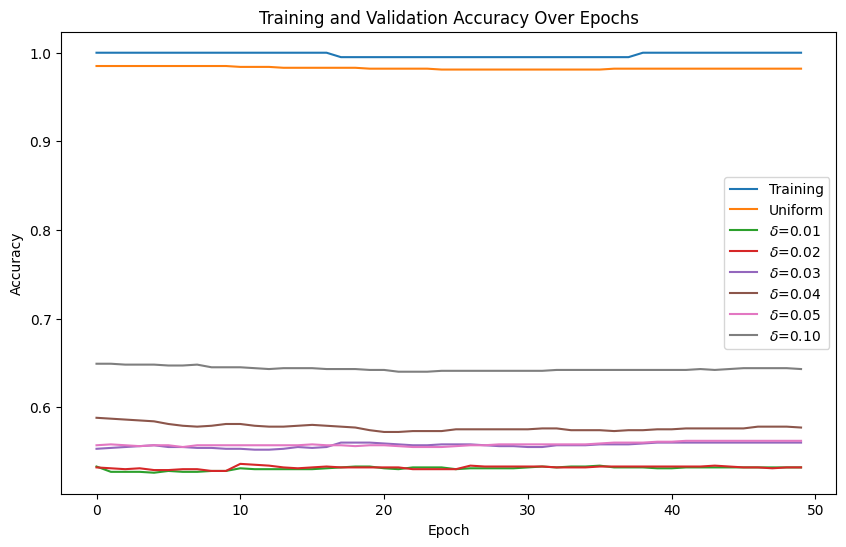

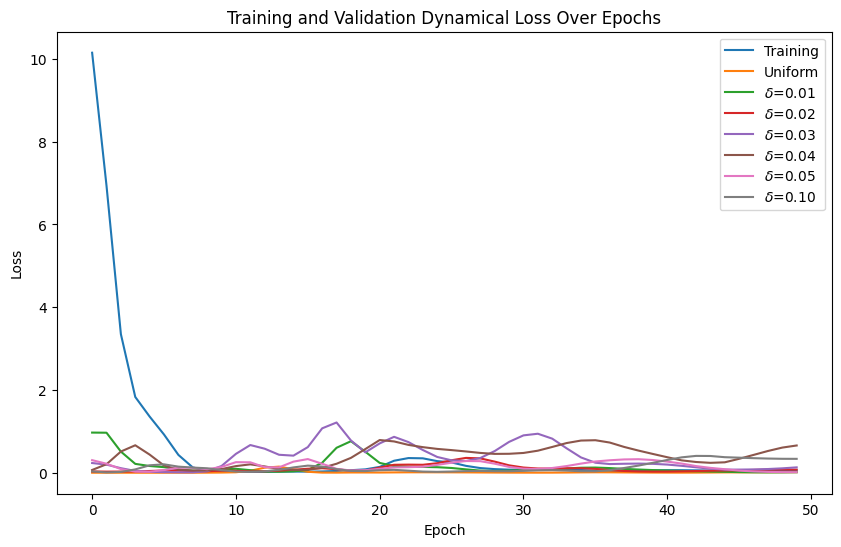

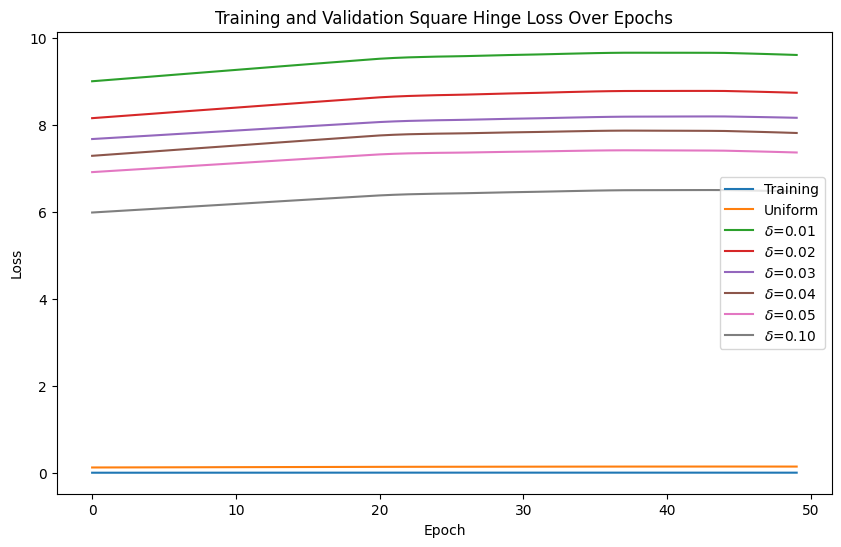

Accuracy: 0.9819999933242798


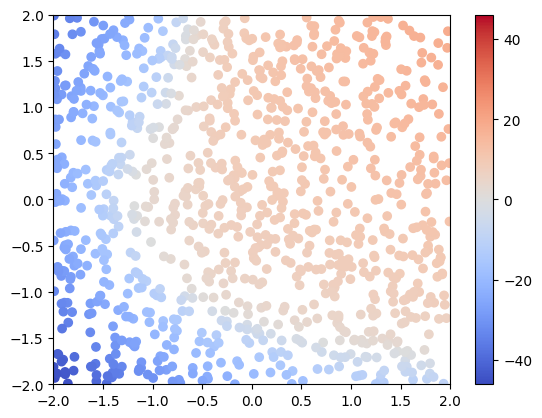

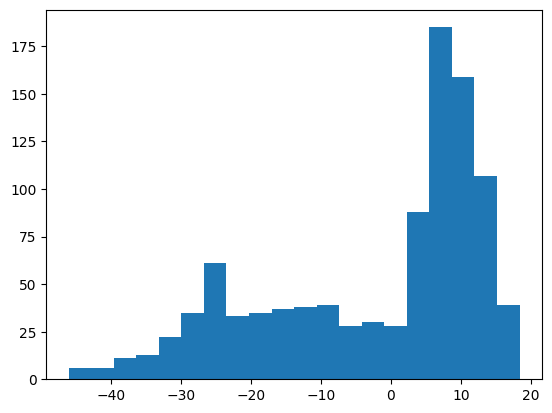

Accuracy: 0.5320000052452087


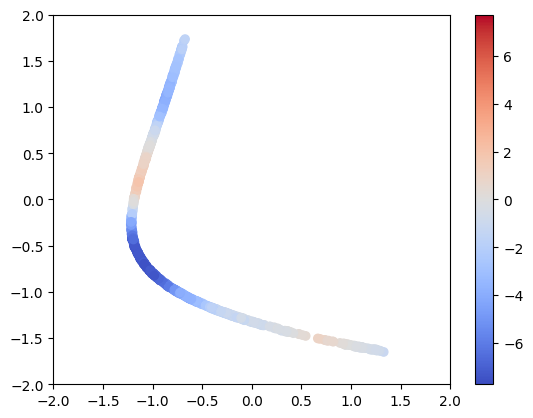

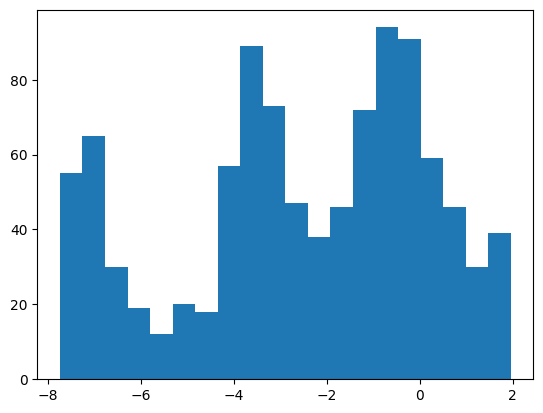

Accuracy: 0.5320000052452087


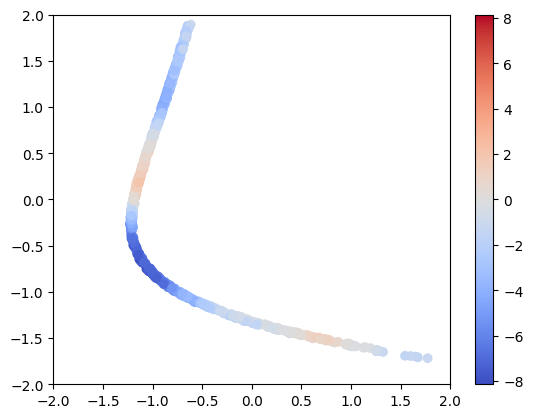

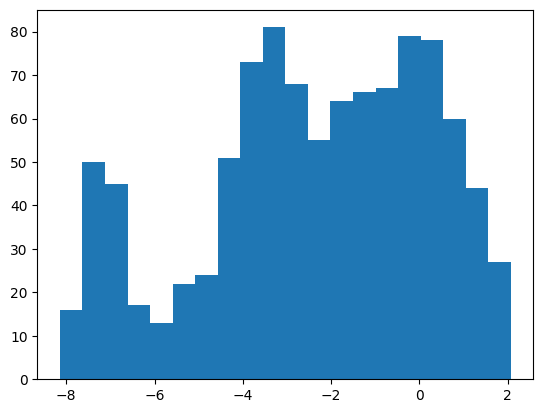

Accuracy: 0.5600000023841858


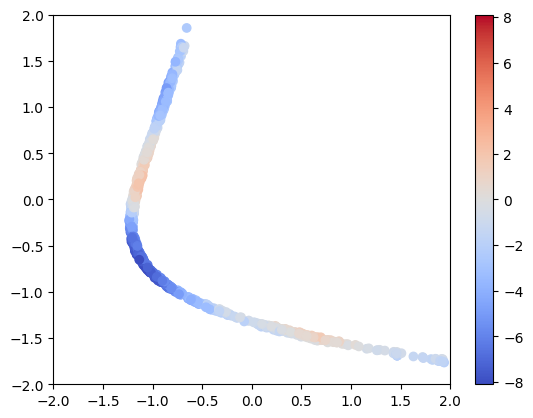

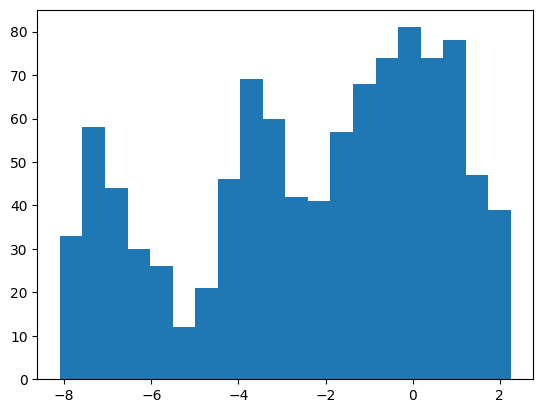

Accuracy: 0.5770000219345093


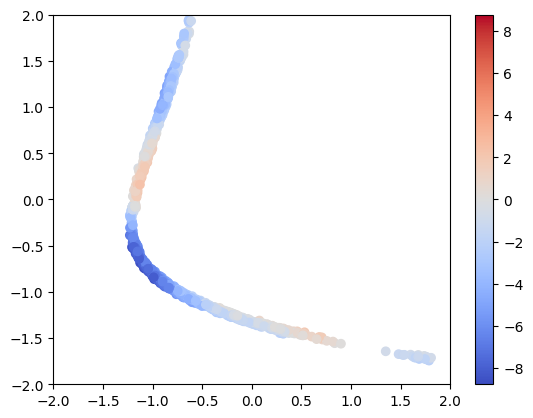

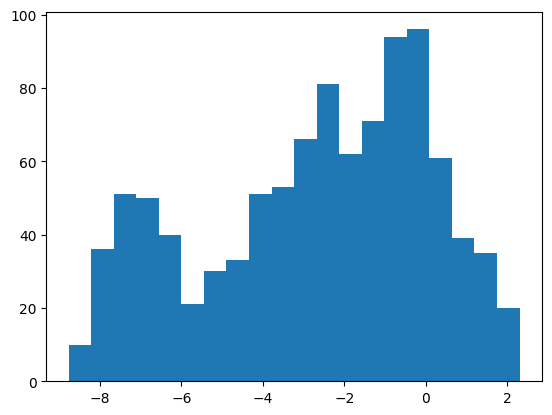

Accuracy: 0.5619999766349792


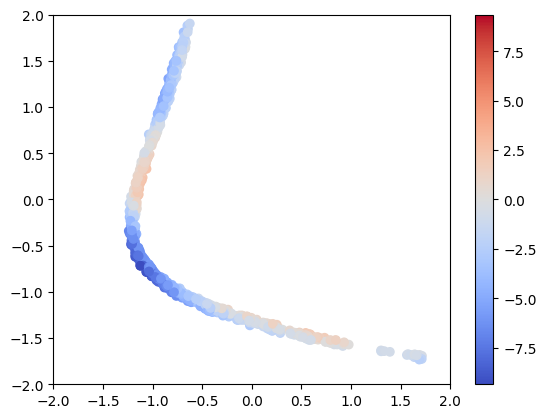

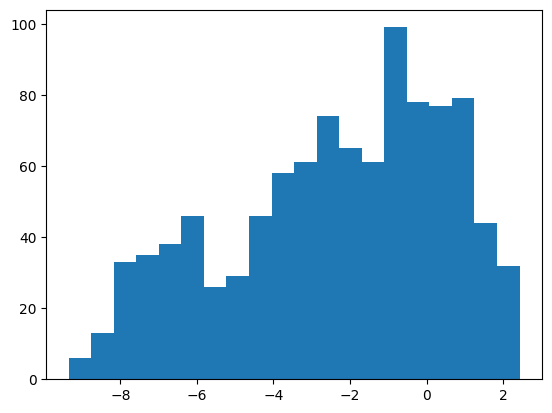

Accuracy: 0.6430000066757202


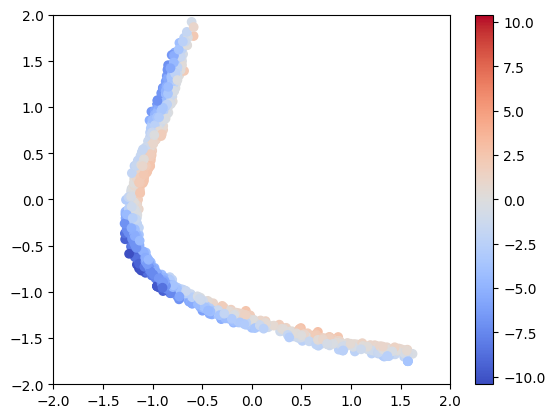

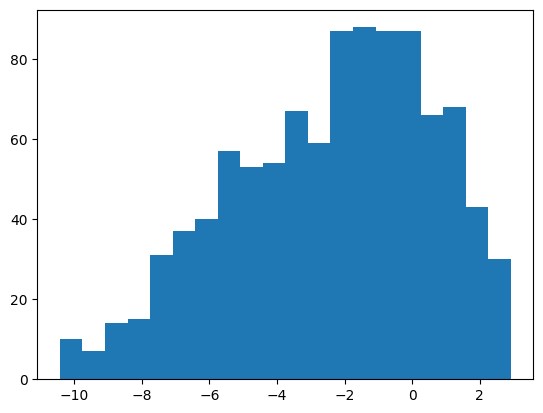

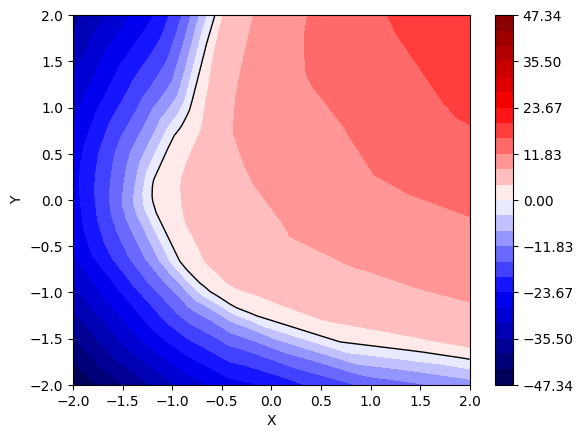

Iteration 5


Overall Training Progress: 100%|██████████| 50/50 [01:20<00:00,  1.62s/it, Training Accuracy=1, Validation1 Accuracy=0.981, Validation001 Accuracy=0.529, Validation002 Accuracy=0.533, Validation003 Accuracy=0.561, Validation004 Accuracy=0.582, Validation005 Accuracy=0.564, Validation010 Accuracy=0.645]


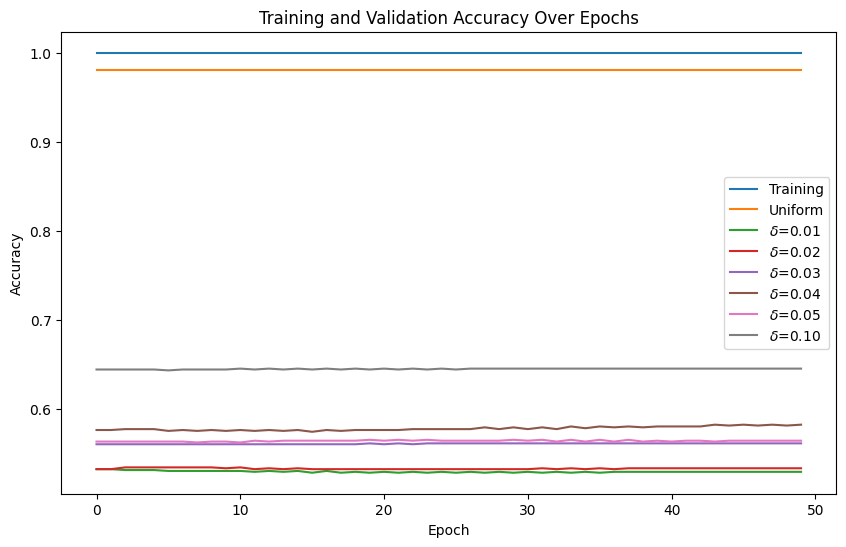

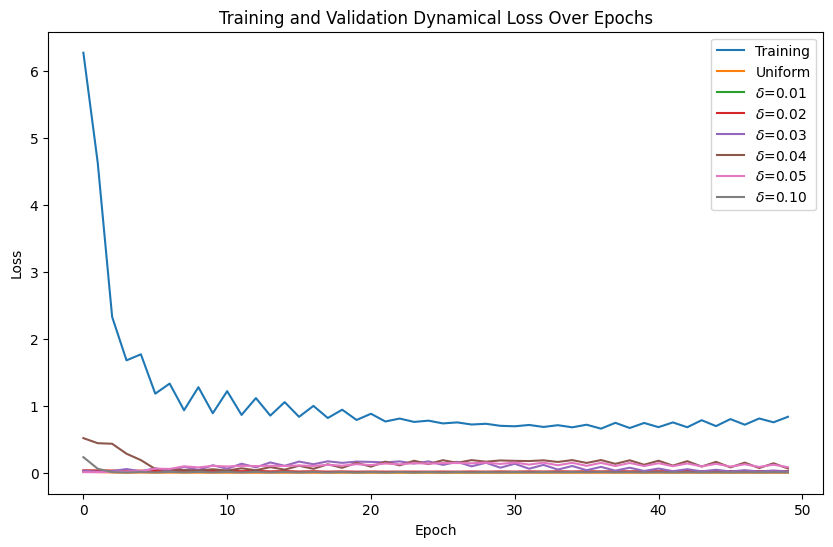

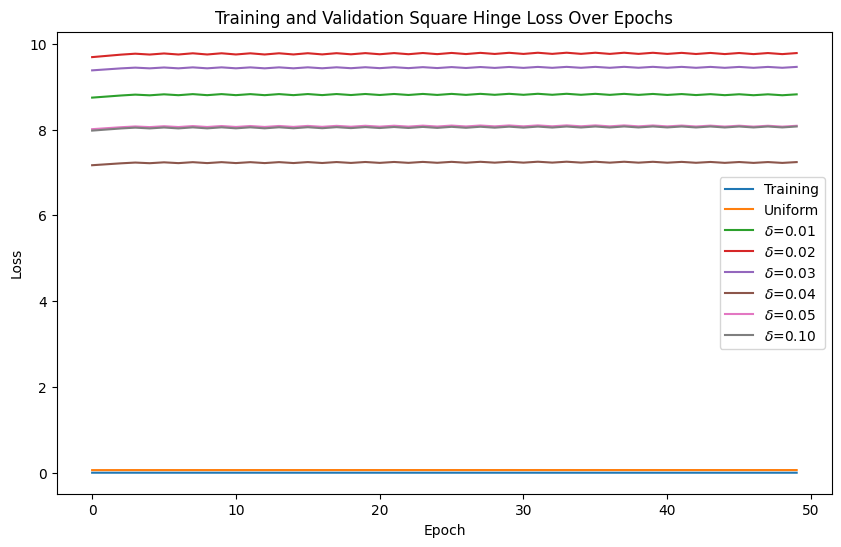

Accuracy: 0.9810000061988831


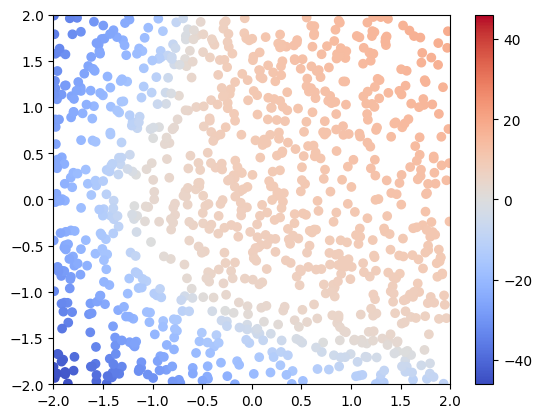

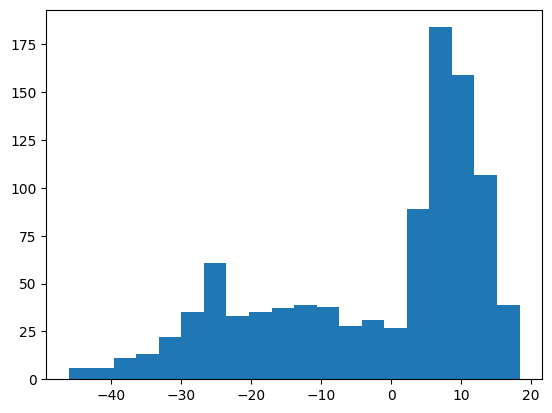

Accuracy: 0.5289999842643738


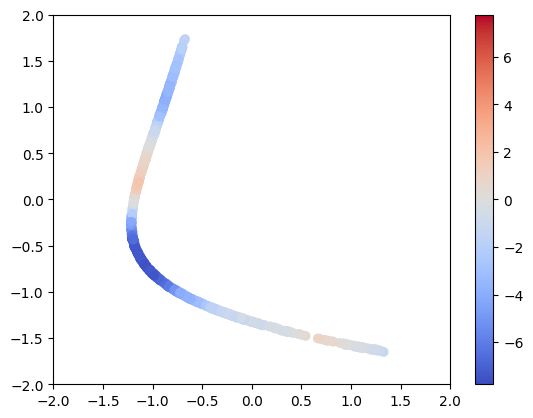

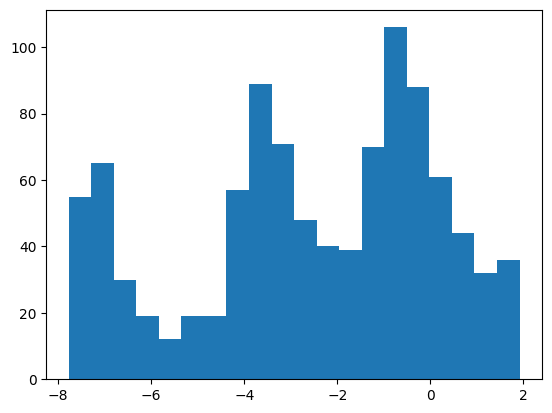

Accuracy: 0.5329999923706055


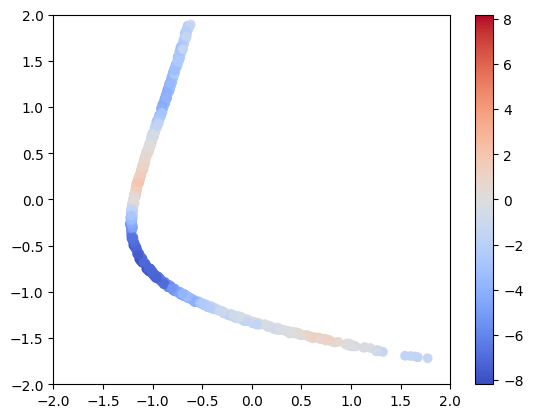

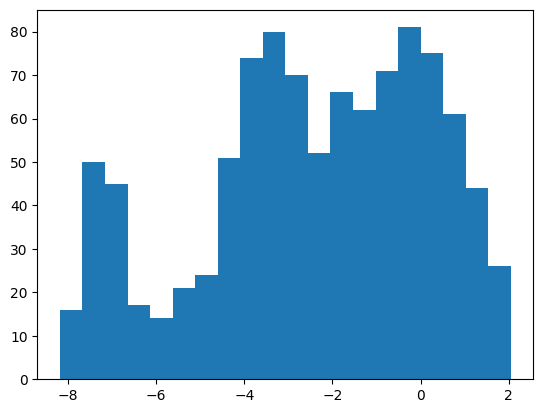

Accuracy: 0.5609999895095825


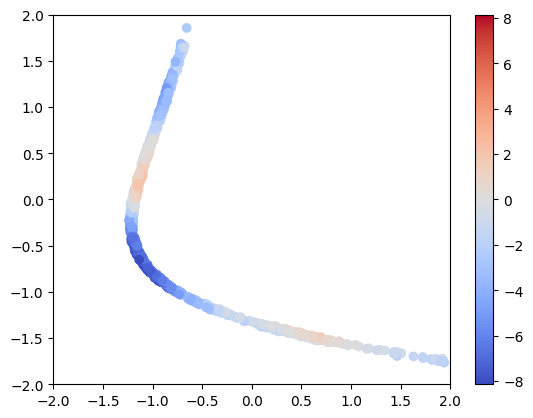

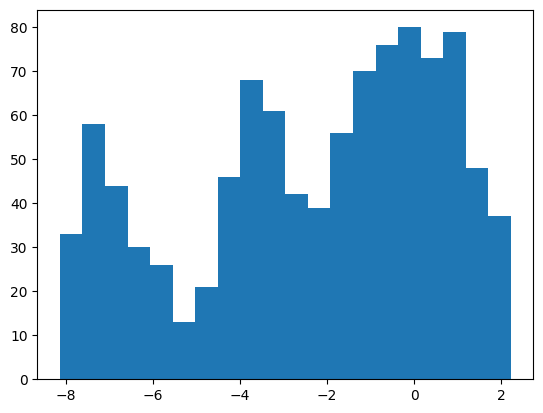

Accuracy: 0.5820000171661377


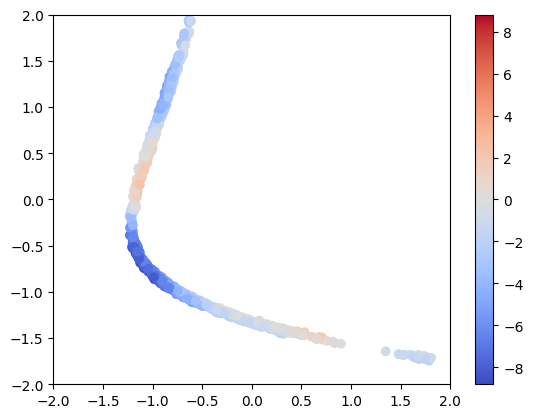

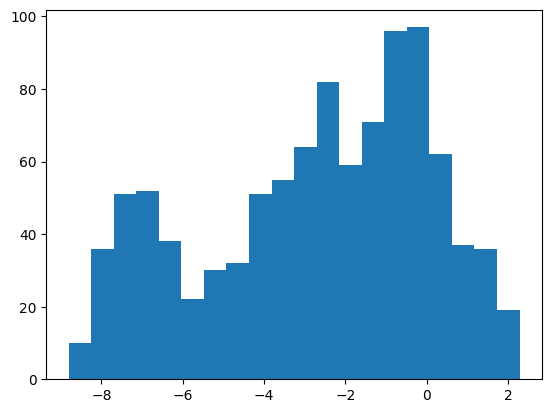

Accuracy: 0.5640000104904175


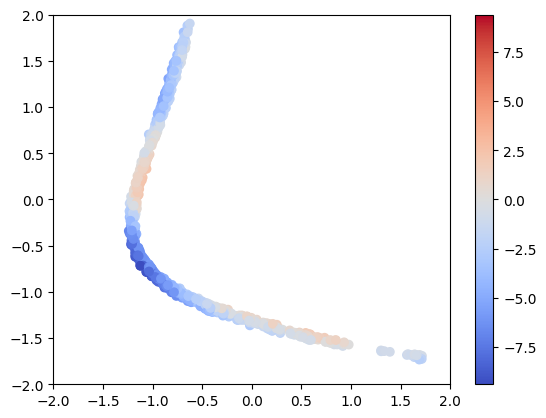

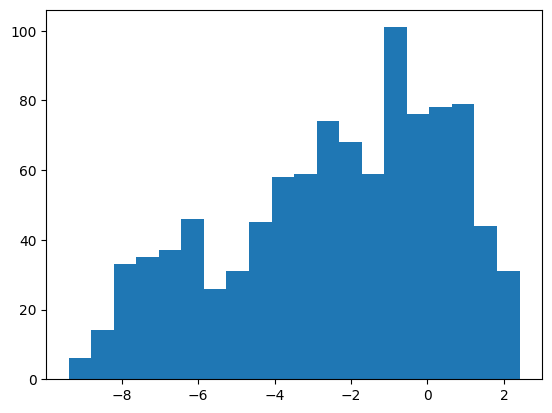

Accuracy: 0.6449999809265137


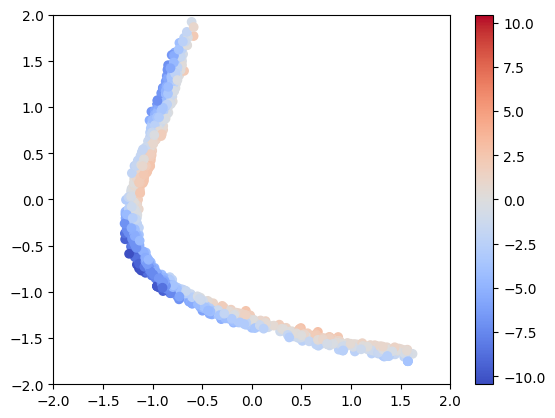

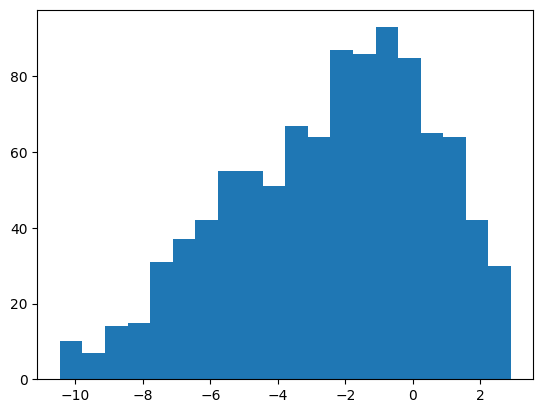

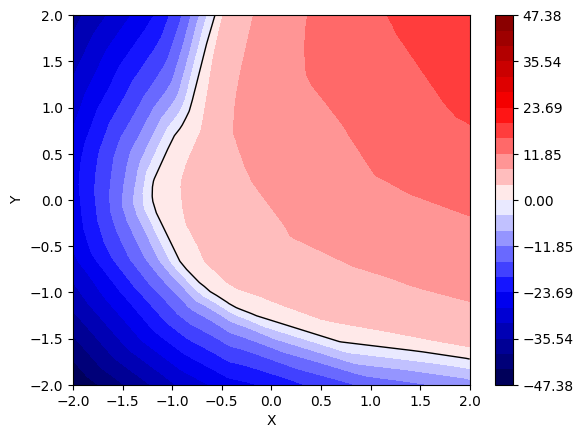

Iteration 6


Overall Training Progress: 100%|██████████| 50/50 [01:22<00:00,  1.65s/it, Training Accuracy=1, Validation1 Accuracy=0.981, Validation001 Accuracy=0.528, Validation002 Accuracy=0.531, Validation003 Accuracy=0.562, Validation004 Accuracy=0.579, Validation005 Accuracy=0.566, Validation010 Accuracy=0.645]


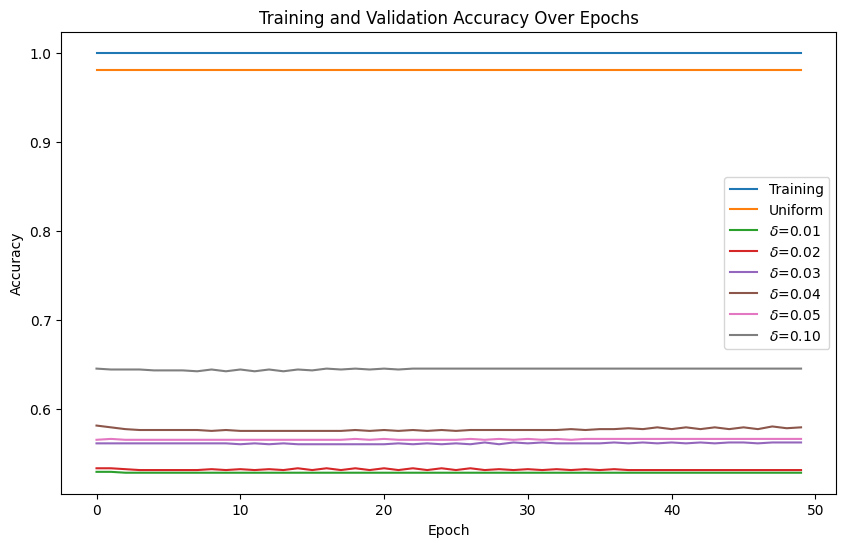

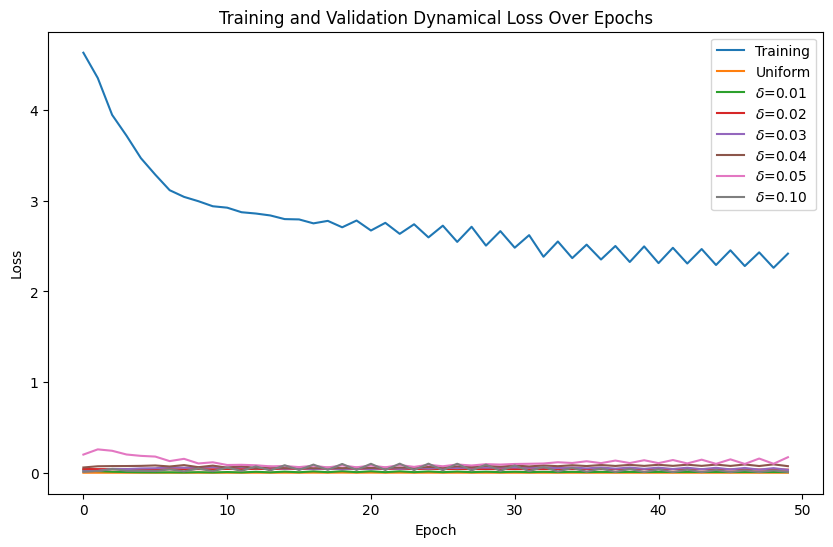

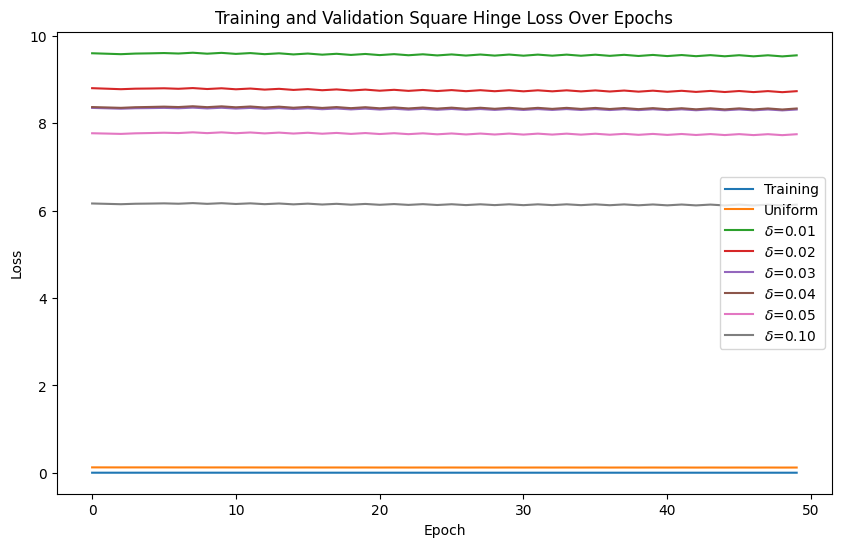

Accuracy: 0.9810000061988831


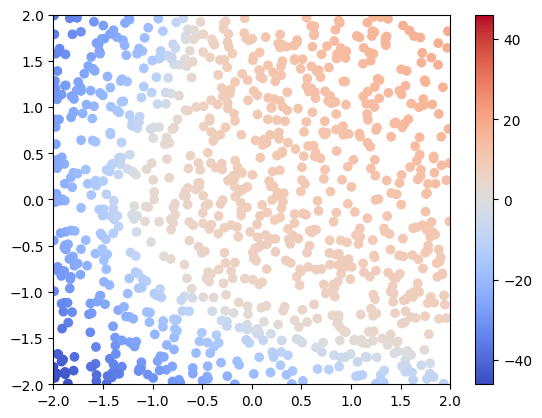

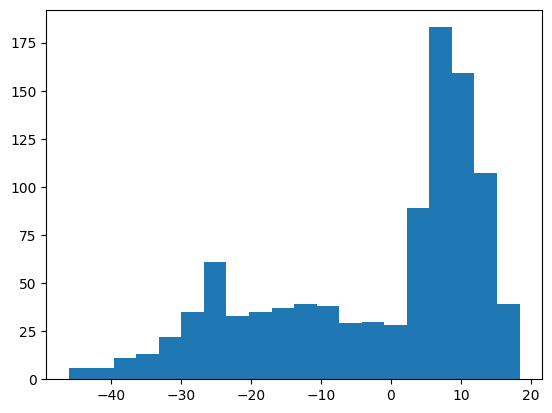

Accuracy: 0.527999997138977


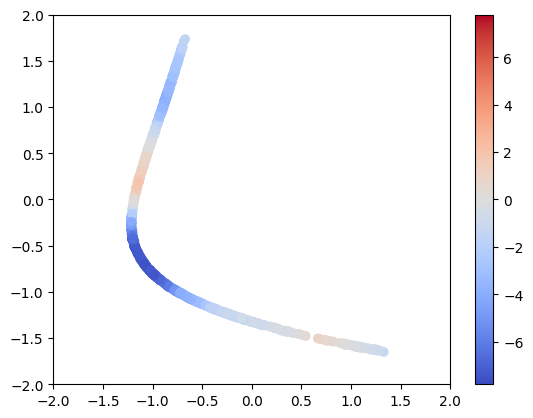

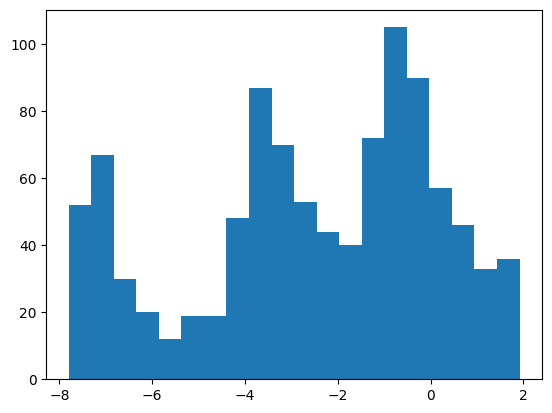

Accuracy: 0.531000018119812


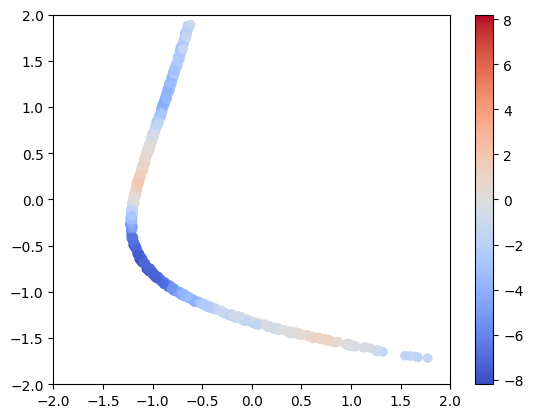

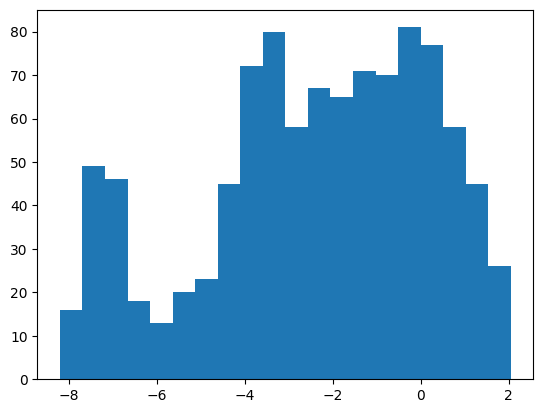

Accuracy: 0.5619999766349792


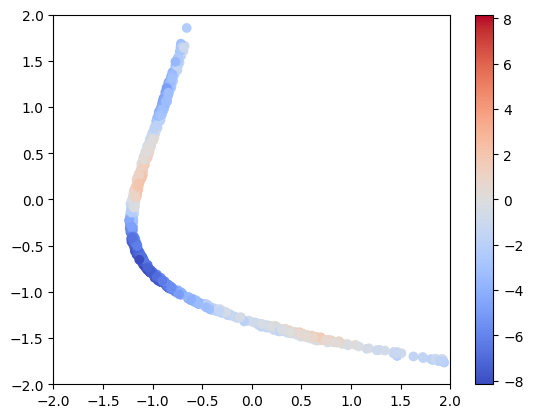

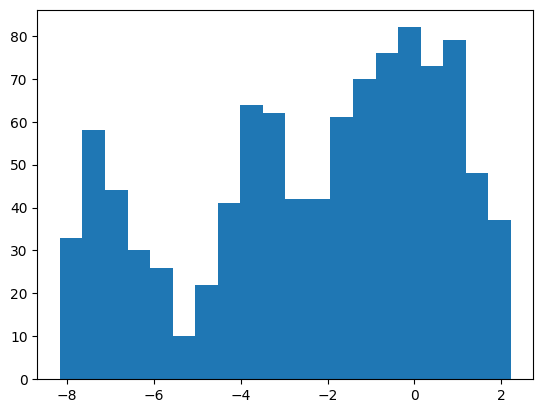

Accuracy: 0.5789999961853027


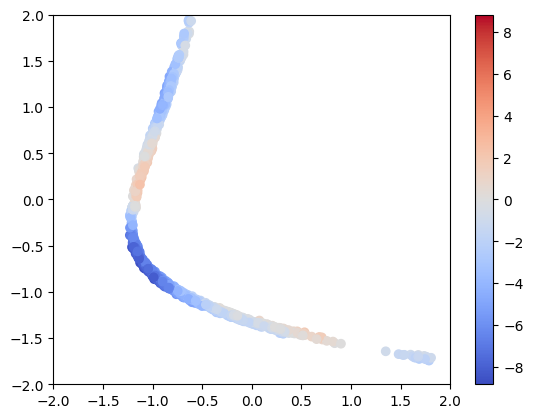

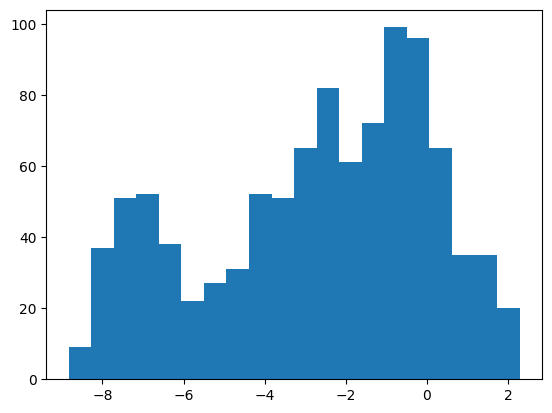

Accuracy: 0.5659999847412109


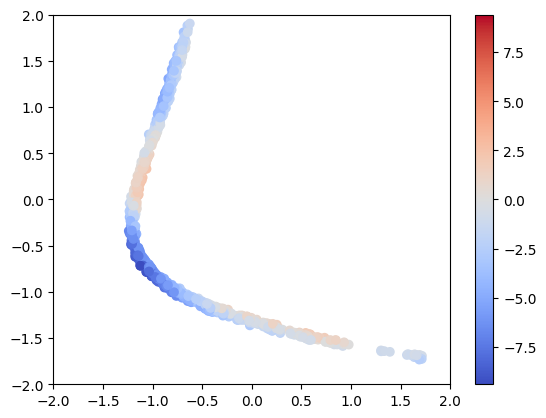

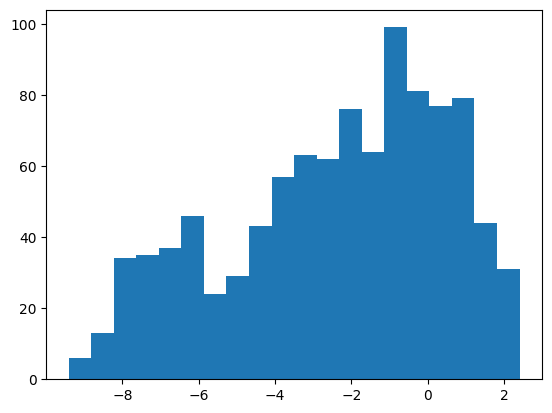

Accuracy: 0.6449999809265137


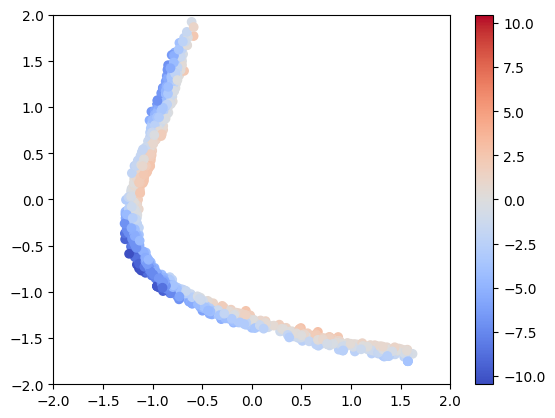

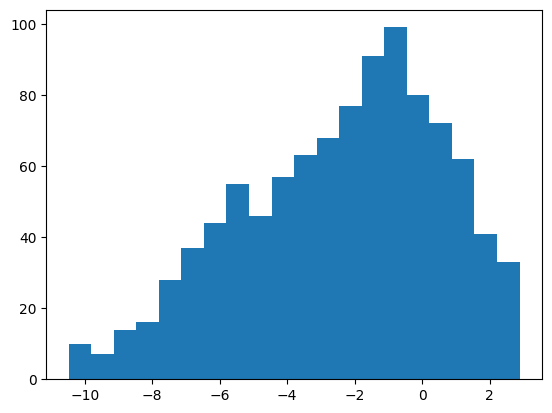

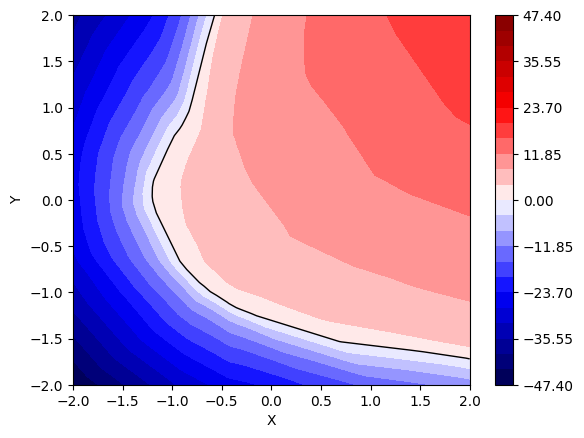

Iteration 7


Overall Training Progress: 100%|██████████| 50/50 [01:25<00:00,  1.70s/it, Training Accuracy=1, Validation1 Accuracy=0.984, Validation001 Accuracy=0.534, Validation002 Accuracy=0.541, Validation003 Accuracy=0.56, Validation004 Accuracy=0.6, Validation005 Accuracy=0.575, Validation010 Accuracy=0.648]   


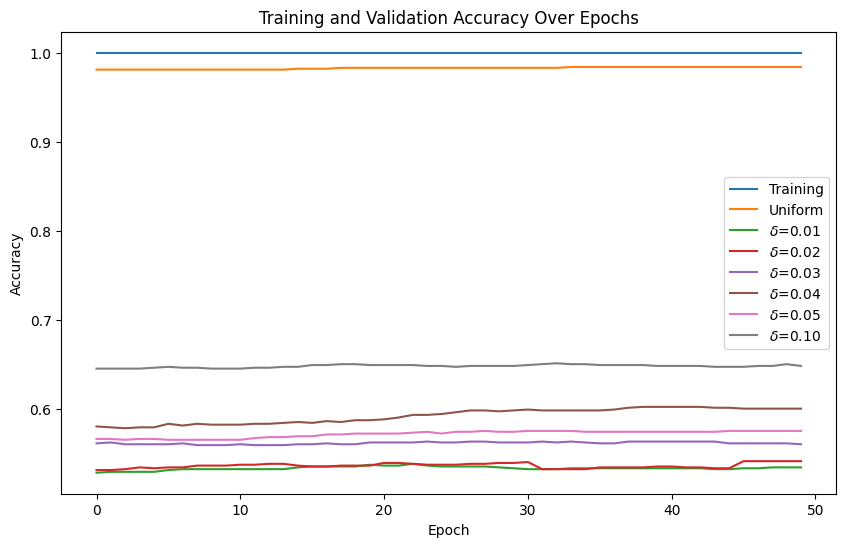

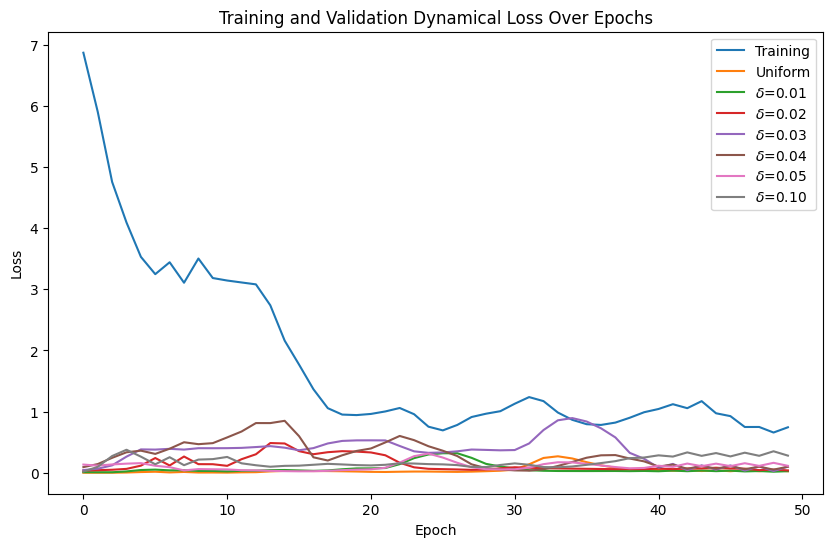

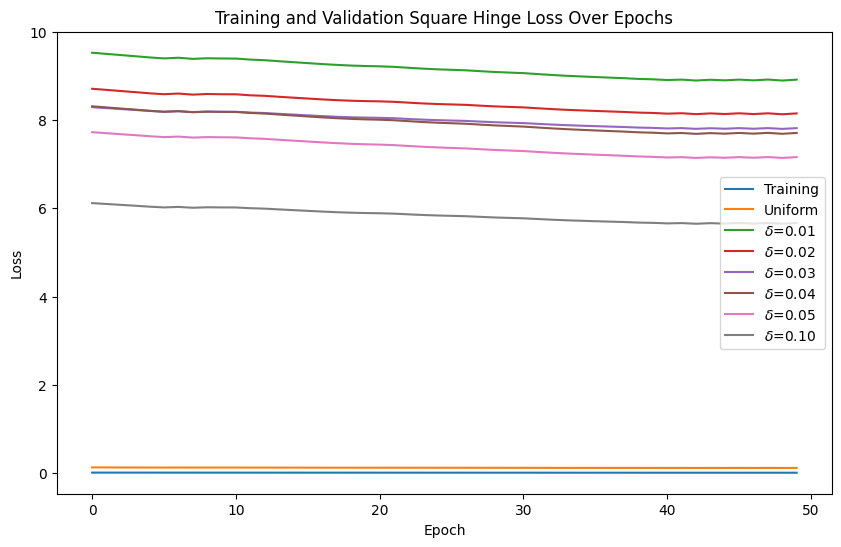

Accuracy: 0.984000027179718


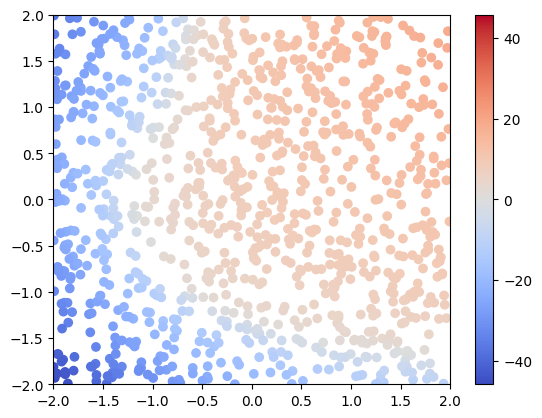

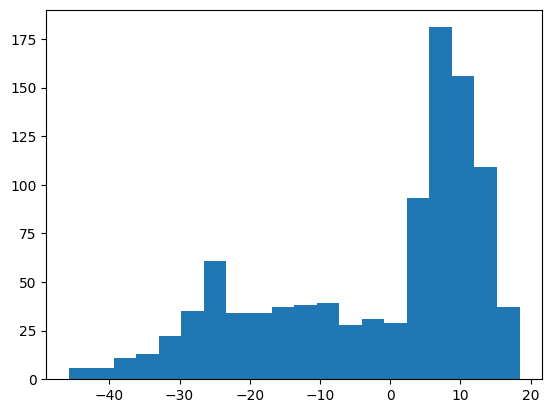

Accuracy: 0.5339999794960022


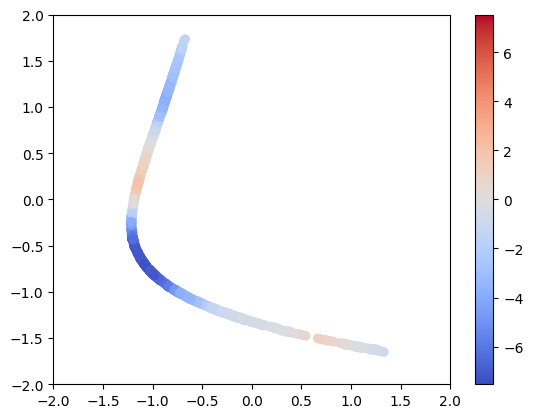

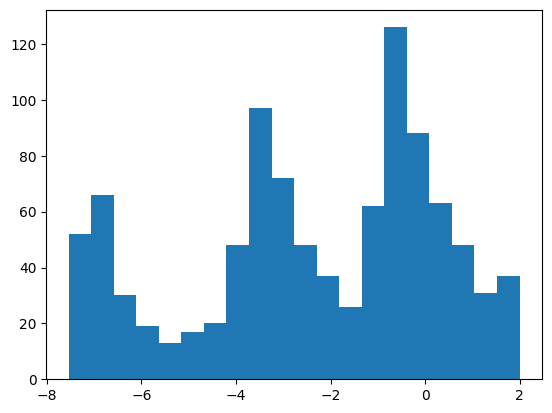

Accuracy: 0.5410000085830688


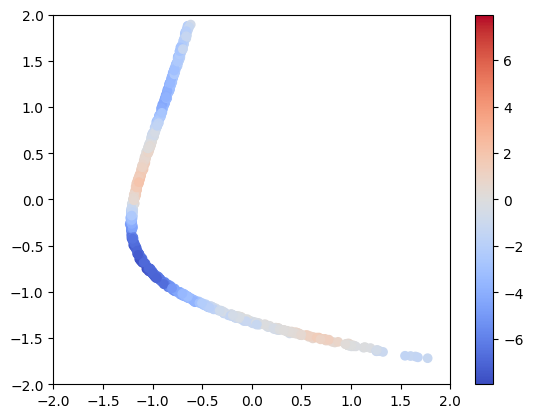

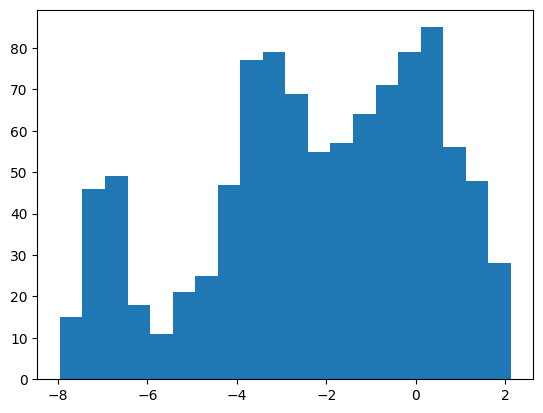

Accuracy: 0.5600000023841858


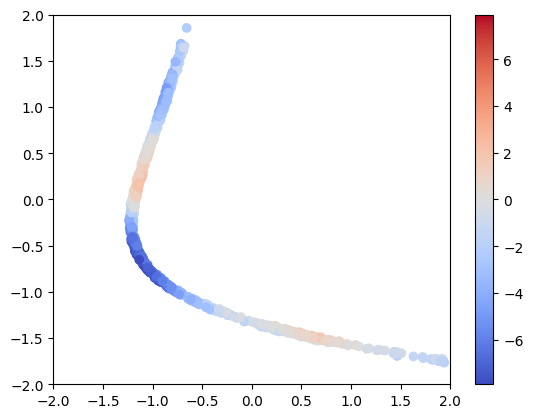

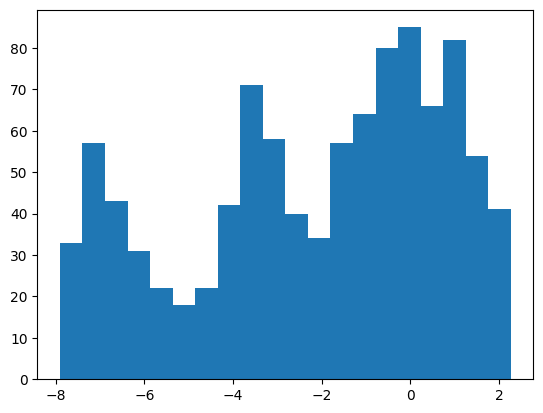

Accuracy: 0.6000000238418579


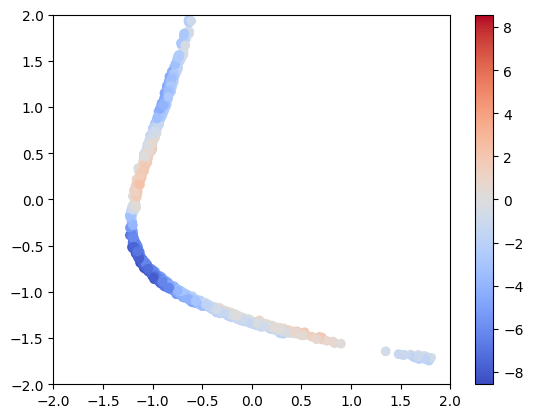

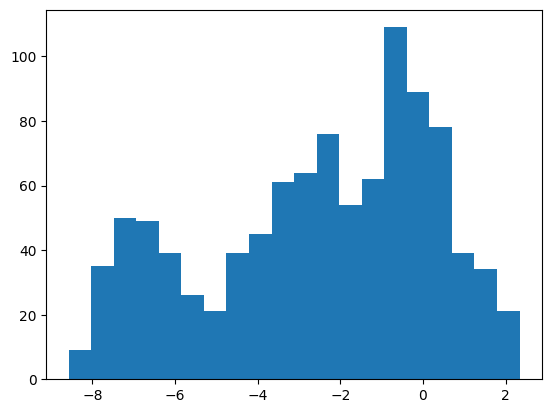

Accuracy: 0.574999988079071


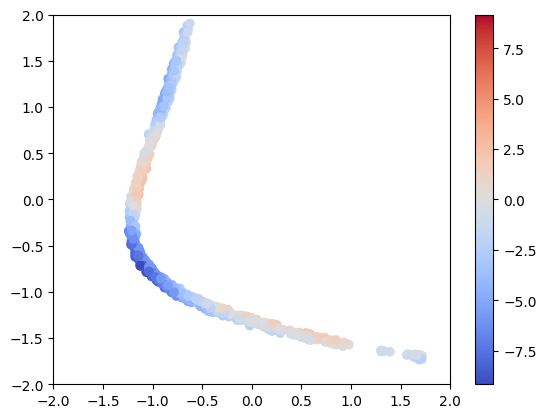

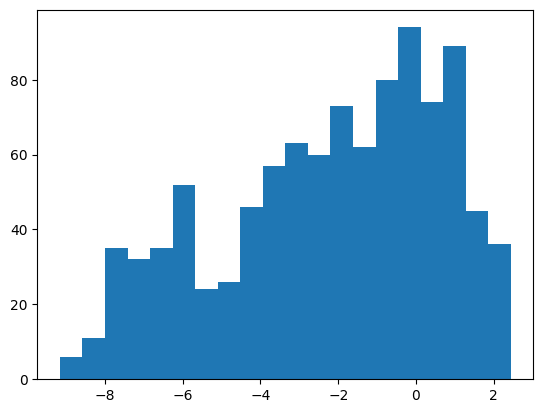

Accuracy: 0.6480000019073486


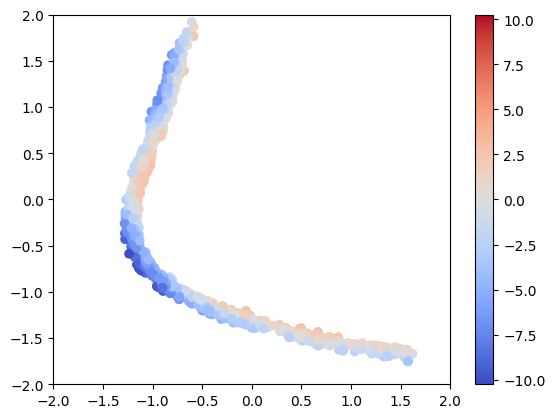

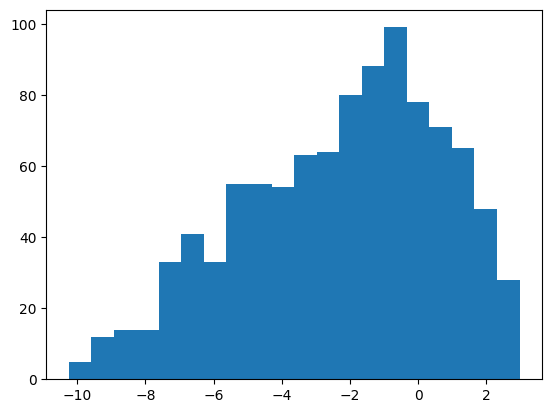

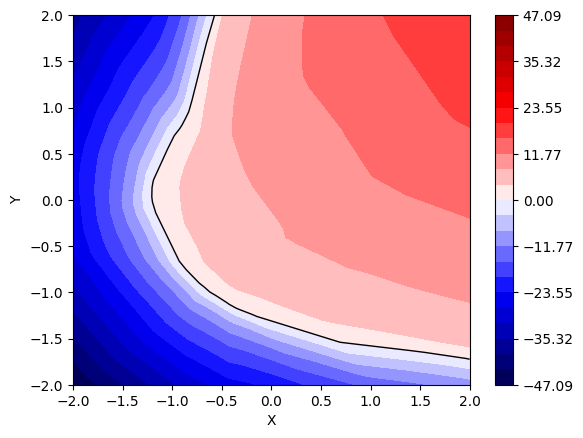

Iteration 8


KeyboardInterrupt: 

In [153]:
dataset_train_copy = deepcopy(dataset_train)
net_5 = deepcopy(net_hinge_square)
train_model_dynamical_adaptive(net_5, dataset_train_copy, dataset_validation_uniform, dataset_validation_near_001, dataset_validation_near_002, dataset_validation_near_003,
                    dataset_validation_near_004, dataset_validation_near_005, dataset_validation_near_010, batchsize=len(dataset_train_copy), epochs=50, lr=0.00001, iterations=10)

In [ ]:
test_model(net_5, dataset_test_uniform)

In [ ]:
test_model(net_5, dataset_test_near_001)

In [ ]:
test_model(net_5, dataset_test_near_002)

In [ ]:
test_model(net_5, dataset_test_near_003)

In [ ]:
test_model(net_5, dataset_test_near_004)

In [ ]:
test_model(net_5, dataset_test_near_005)

In [ ]:
test_model(net_5, dataset_test_near_010)

In [ ]:
plot_contour(net_5)

In [ ]:
dataset_train_copy = deepcopy(dataset_train)
net_6 = deepcopy(net_hinge_square)
train_model_dynamical_adaptive(net_6, dataset_train_copy, dataset_validation_uniform, dataset_validation_near_001, dataset_validation_near_002, dataset_validation_near_003,
                    dataset_validation_near_004, dataset_validation_near_005, dataset_validation_near_010, batchsize=64, epochs=50, lr=0.00001, iterations=50)

In [ ]:
test_model(net_6, dataset_test_uniform)

In [ ]:
test_model(net_6, dataset_test_near_001)

In [ ]:
test_model(net_6, dataset_test_near_002)

In [ ]:
test_model(net_6, dataset_test_near_003)

In [ ]:
test_model(net_6, dataset_test_near_004)

In [ ]:
test_model(net_6, dataset_test_near_005)

In [ ]:
test_model(net_6, dataset_test_near_010)

In [ ]:
plot_contour(net_6)